# Employee dataset

This is an example of an data analyst project which case come from employees of a company. The user of this project is a Human Resource who want to get a comprehensive dashboard for presenting employees who will leave the company and do not leave the company based on the categories of several supporting variables.

first, input libraries

In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import skew, skewtest, pearsonr, spearmanr, normaltest, levene, norm, t, ttest_ind
import time

input and see the dataset

In [2]:
employee = pd.read_csv('employee.csv')
employee.head()

EmployeeNumber Attrition  Age     BusinessTravel  DailyRate  \
0               1       Yes   41      Travel_Rarely       1102   
1               2        No   49  Travel_Frequently        279   
2               3       Yes   37      Travel_Rarely       1373   
3               4        No   33  Travel_Frequently       1392   
4               5        No   27      Travel_Rarely        591   

               Department  DistanceFromHome  Education EducationField  \
0                   Sales                 1          2  Life Sciences   
1  Research & Development                 8          1  Life Sciences   
2  Research & Development                 2          2          Other   
3  Research & Development                 3          4  Life Sciences   
4  Research & Development                 2          1        Medical   

   EnvironmentSatisfaction  Gender  HourlyRate  JobInvolvement  JobLevel  \
0                        2  Female          94               3         2   
1                        3    Male          61               2         2   
2                        4    Male          92               2         1   
3                        4  Female          56               3         1   
4                        1    Male          40               3         1   

                 JobRole  JobSatisfaction MaritalStatus  MonthlyIncome  \
0        Sales Executive                4        Single           5993   
1     Research Scientist                2       Married           5130   
2  Laboratory Technician                3        Single           2090   
3     Research Scientist                3       Married           2909   
4  Laboratory Technician                2       Married           3468   

   MonthlyRate  NumCompaniesWorked Over18 OverTime  PercentSalaryHike  \
0        19479                   8      Y      Yes                 11   
1        24907                   1      Y       No                 23   
2         2396                   6      Y      Yes                 15   
3        23159                   1      Y      Yes                 11   
4        16632                   9      Y       No                 12   

   PerformanceRating  RelationshipSatisfaction  StandardHours  \
0                  3                         1             80   
1                  4                         4             80   
2                  3                         2             80   
3                  3                         3             80   
4                  3                         4             80   

   StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
0                 0                  8                      0   
1                 1                 10                      3   
2                 0                  7                      3   
3                 0                  8                      3   
4                 1                  6                      3   

   WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
0                1               6                   4   
1                3              10                   7   
2                3               0                   0   
3                3               8                   7   
4                3               2                   2   

   YearsSinceLastPromotion  YearsWithCurrManager  
0                        0                     5  
1                        1                     7  
2                        0                     0  
3                        3                     0  
4                        2                     2

# Analyze data

In [3]:
employee_num = employee.select_dtypes('number')
employee_num = employee_num.drop('EmployeeNumber', axis=1)
employee_num.head()

Age  DailyRate  DistanceFromHome  Education  EnvironmentSatisfaction  \
0   41       1102                 1          2                        2   
1   49        279                 8          1                        3   
2   37       1373                 2          2                        4   
3   33       1392                 3          4                        4   
4   27        591                 2          1                        1   

   HourlyRate  JobInvolvement  JobLevel  JobSatisfaction  MonthlyIncome  \
0          94               3         2                4           5993   
1          61               2         2                2           5130   
2          92               2         1                3           2090   
3          56               3         1                3           2909   
4          40               3         1                2           3468   

   MonthlyRate  NumCompaniesWorked  PercentSalaryHike  PerformanceRating  \
0        19479                   8                 11                  3   
1        24907                   1                 23                  4   
2         2396                   6                 15                  3   
3        23159                   1                 11                  3   
4        16632                   9                 12                  3   

   RelationshipSatisfaction  StandardHours  StockOptionLevel  \
0                         1             80                 0   
1                         4             80                 1   
2                         2             80                 0   
3                         3             80                 0   
4                         4             80                 1   

   TotalWorkingYears  TrainingTimesLastYear  WorkLifeBalance  YearsAtCompany  \
0                  8                      0                1               6   
1                 10                      3                3              10   
2                  7                      3                3               0   
3                  8                      3                3               8   
4                  6                      3                3               2   

   YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
0                   4                        0                     5  
1                   7                        1                     7  
2                   0                        0                     0  
3                   7                        3                     0  
4                   2                        2                     2

In [4]:
employee_num.info()
employee_num.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2940 entries, 0 to 2939
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Age                       2940 non-null   int64
 1   DailyRate                 2940 non-null   int64
 2   DistanceFromHome          2940 non-null   int64
 3   Education                 2940 non-null   int64
 4   EnvironmentSatisfaction   2940 non-null   int64
 5   HourlyRate                2940 non-null   int64
 6   JobInvolvement            2940 non-null   int64
 7   JobLevel                  2940 non-null   int64
 8   JobSatisfaction           2940 non-null   int64
 9   MonthlyIncome             2940 non-null   int64
 10  MonthlyRate               2940 non-null   int64
 11  NumCompaniesWorked        2940 non-null   int64
 12  PercentSalaryHike         2940 non-null   int64
 13  PerformanceRating         2940 non-null   int64
 14  RelationshipSatisfaction  2940 non-null 

Age    DailyRate  DistanceFromHome    Education  \
count  2940.000000  2940.000000       2940.000000  2940.000000   
mean     36.923810   802.485714          9.192517     2.912925   
std       9.133819   403.440447          8.105485     1.023991   
min      18.000000   102.000000          1.000000     1.000000   
25%      30.000000   465.000000          2.000000     2.000000   
50%      36.000000   802.000000          7.000000     3.000000   
75%      43.000000  1157.000000         14.000000     4.000000   
max      60.000000  1499.000000         29.000000     5.000000   

       EnvironmentSatisfaction   HourlyRate  JobInvolvement     JobLevel  \
count              2940.000000  2940.000000     2940.000000  2940.000000   
mean                  2.721769    65.891156        2.729932     2.063946   
std                   1.092896    20.325969        0.711440     1.106752   
min                   1.000000    30.000000        1.000000     1.000000   
25%                   2.000000    48.000000        2.000000     1.000000   
50%                   3.000000    66.000000        3.000000     2.000000   
75%                   4.000000    84.000000        3.000000     3.000000   
max                   4.000000   100.000000        4.000000     5.000000   

       JobSatisfaction  MonthlyIncome   MonthlyRate  NumCompaniesWorked  \
count      2940.000000    2940.000000   2940.000000         2940.000000   
mean          2.728571    6502.931293  14313.103401            2.693197   
std           1.102658    4707.155770   7116.575021            2.497584   
min           1.000000    1009.000000   2094.000000            0.000000   
25%           2.000000    2911.000000   8045.000000            1.000000   
50%           3.000000    4919.000000  14235.500000            2.000000   
75%           4.000000    8380.000000  20462.000000            4.000000   
max           4.000000   19999.000000  26999.000000            9.000000   

       PercentSalaryHike  PerformanceRating  RelationshipSatisfaction  \
count        2940.000000        2940.000000               2940.000000   
mean           15.209524           3.153741                  2.712245   
std             3.659315           0.360762                  1.081025   
min            11.000000           3.000000                  1.000000   
25%            12.000000           3.000000                  2.000000   
50%            14.000000           3.000000                  3.000000   
75%            18.000000           3.000000                  4.000000   
max            25.000000           4.000000                  4.000000   

       StandardHours  StockOptionLevel  TotalWorkingYears  \
count         2940.0       2940.000000        2940.000000   
mean            80.0          0.793878          11.279592   
std              0.0          0.851932           7.779458   
min             80.0          0.000000           0.000000   
25%             80.0          0.000000           6.000000   
50%             80.0          1.000000          10.000000   
75%             80.0          1.000000          15.000000   
max             80.0          3.000000          40.000000   

       TrainingTimesLastYear  WorkLifeBalance  YearsAtCompany  \
count            2940.000000      2940.000000     2940.000000   
mean                2.799320         2.761224        7.008163   
std                 1.289051         0.706356        6.125483   
min                 0.000000         1.000000        0.000000   
25%                 2.000000         2.000000        3.000000   
50%                 3.000000         3.000000        5.000000   
75%                 3.000000         3.000000        9.000000   
max                 6.000000         4.000000       40.000000   

       YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
count         2940.000000              2940.000000           2940.000000  
mean             4.229252                 2.187755              4.123129  
std              3.622521               

we can see the describe of employee (count, mean, std, etc) in the company for the numeric category (Age, Daily Rate, etc).

# Dashboard

In [5]:
 def whisk(x):
    q1 = np.nanpercentile(x, 25)
    q3 = np.nanpercentile(x, 75)
    iqr = q3 - q1
    lower_fence = q1 - 1.5 * iqr
    upper_fence = q3 + 1.5 * iqr
    
    non_outlier = []
    for num in x:
        if num >= lower_fence:
            if num <= upper_fence:
                non_outlier.append(num)
    lower_whisker = np.min(non_outlier)
    upper_whisker = np.max(non_outlier)
    
    outlier = []
    for num in x:
        if num < lower_fence:
            outlier.append(num)
        if num > upper_fence:
            outlier.append(num)
    
    outlier_count = len(outlier)
    
    print('lower_whisker: {}'.format(lower_whisker))
    print('upper_whisker: {}'.format(upper_whisker))
    print('outlier: {}'.format(outlier))
    print('outlier counts: {}'.format(outlier_count))

1
Age


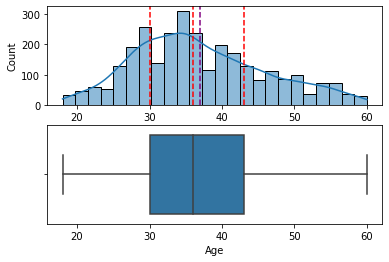

count    2940.000000
mean       36.923810
std         9.133819
min        18.000000
25%        30.000000
50%        36.000000
75%        43.000000
max        60.000000
Name: Age, dtype: float64
lower_whisker: 18
upper_whisker: 60
outlier: []
outlier counts: 0
Data skewed dengan hasil skew = 0.4128644615478507
**************************************************
   
2
DailyRate


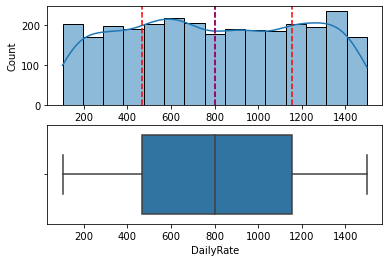

count    2940.000000
mean      802.485714
std       403.440447
min       102.000000
25%       465.000000
50%       802.000000
75%      1157.000000
max      1499.000000
Name: DailyRate, dtype: float64
lower_whisker: 102
upper_whisker: 1499
outlier: []
outlier counts: 0
Data tidak skewed
**************************************************
   
3
DistanceFromHome


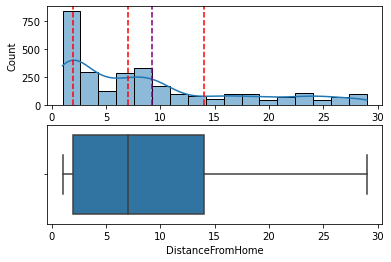

count    2940.000000
mean        9.192517
std         8.105485
min         1.000000
25%         2.000000
50%         7.000000
75%        14.000000
max        29.000000
Name: DistanceFromHome, dtype: float64
lower_whisker: 1
upper_whisker: 29
outlier: []
outlier counts: 0
Data skewed dengan hasil skew = 0.9571400469829039
**************************************************
   
4
Education


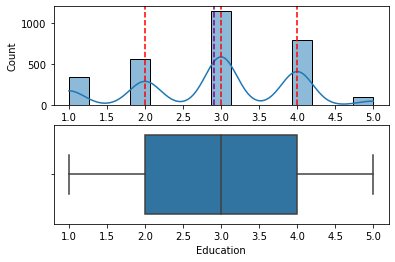

count    2940.000000
mean        2.912925
std         1.023991
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max         5.000000
Name: Education, dtype: float64
lower_whisker: 1
upper_whisker: 5
outlier: []
outlier counts: 0
Data skewed dengan hasil skew = -0.2893854052028824
**************************************************
   
5
EnvironmentSatisfaction


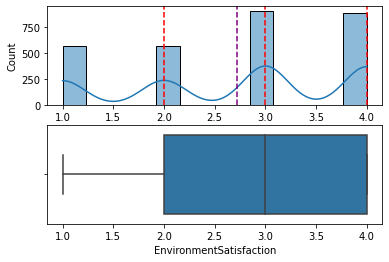

count    2940.000000
mean        2.721769
std         1.092896
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max         4.000000
Name: EnvironmentSatisfaction, dtype: float64
lower_whisker: 1
upper_whisker: 4
outlier: []
outlier counts: 0
Data skewed dengan hasil skew = -0.3213261358382832
**************************************************
   
6
HourlyRate


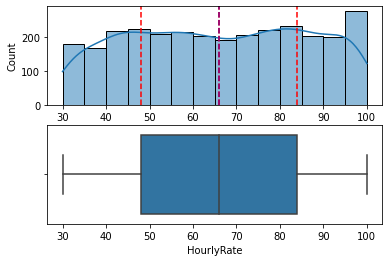

count    2940.000000
mean       65.891156
std        20.325969
min        30.000000
25%        48.000000
50%        66.000000
75%        84.000000
max       100.000000
Name: HourlyRate, dtype: float64
lower_whisker: 30
upper_whisker: 100
outlier: []
outlier counts: 0
Data tidak skewed
**************************************************
   
7
JobInvolvement


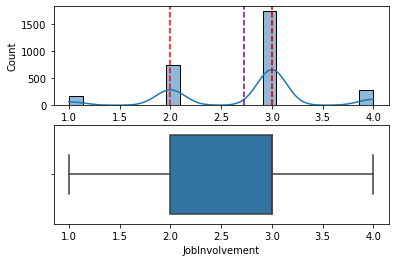

count    2940.000000
mean        2.729932
std         0.711440
min         1.000000
25%         2.000000
50%         3.000000
75%         3.000000
max         4.000000
Name: JobInvolvement, dtype: float64
lower_whisker: 1
upper_whisker: 4
outlier: []
outlier counts: 0
Data skewed dengan hasil skew = -0.49791062862696706
**************************************************
   
8
JobLevel


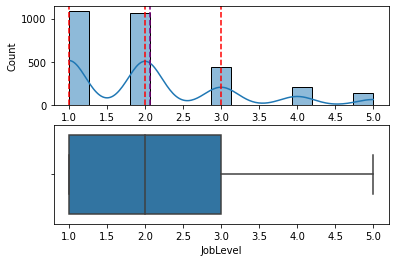

count    2940.000000
mean        2.063946
std         1.106752
min         1.000000
25%         1.000000
50%         2.000000
75%         3.000000
max         5.000000
Name: JobLevel, dtype: float64
lower_whisker: 1
upper_whisker: 5
outlier: []
outlier counts: 0
Data skewed dengan hasil skew = 1.0243546583925869
**************************************************
   
9
JobSatisfaction


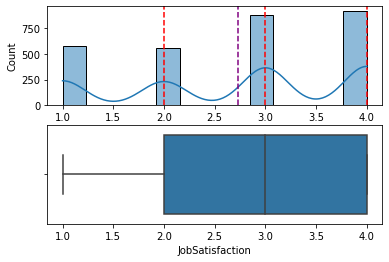

count    2940.000000
mean        2.728571
std         1.102658
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max         4.000000
Name: JobSatisfaction, dtype: float64
lower_whisker: 1
upper_whisker: 4
outlier: []
outlier counts: 0
Data skewed dengan hasil skew = -0.3293354633089524
**************************************************
   
10
MonthlyIncome


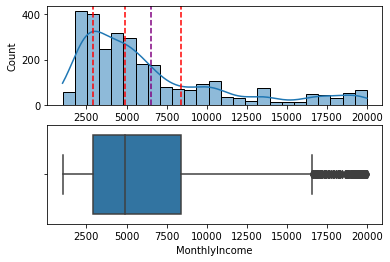

count     2940.000000
mean      6502.931293
std       4707.155770
min       1009.000000
25%       2911.000000
50%       4919.000000
75%       8380.000000
max      19999.000000
Name: MonthlyIncome, dtype: float64
lower_whisker: 1009
upper_whisker: 16555
outlier: [19094, 18947, 19545, 18740, 18844, 18172, 17328, 16959, 19537, 17181, 19926, 19033, 18722, 19999, 16792, 19232, 19517, 19068, 19202, 19436, 16872, 19045, 19144, 17584, 18665, 17068, 19272, 18300, 16659, 19406, 19197, 19566, 18041, 17046, 17861, 16835, 16595, 19502, 18200, 16627, 19513, 19141, 19189, 16856, 19859, 18430, 17639, 16752, 19246, 17159, 17924, 17099, 17444, 17399, 19419, 18303, 19973, 19845, 17650, 19237, 19627, 16756, 17665, 16885, 17465, 19626, 19943, 18606, 17048, 17856, 19081, 17779, 19740, 18711, 18265, 18213, 18824, 18789, 19847, 19190, 18061, 17123, 16880, 17861, 19187, 19717, 16799, 17328, 19701, 17169, 16598, 17007, 16606, 19586, 19331, 19613, 17567, 19049, 19658, 17426, 17603, 16704, 19833, 19038, 19328, 19

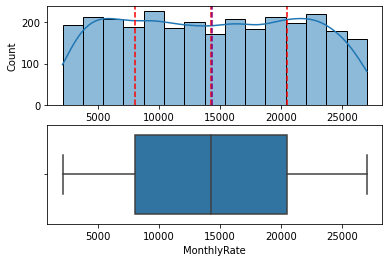

count     2940.000000
mean     14313.103401
std       7116.575021
min       2094.000000
25%       8045.000000
50%      14235.500000
75%      20462.000000
max      26999.000000
Name: MonthlyRate, dtype: float64
lower_whisker: 2094
upper_whisker: 26999
outlier: []
outlier counts: 0
Data tidak skewed
**************************************************
   
12
NumCompaniesWorked


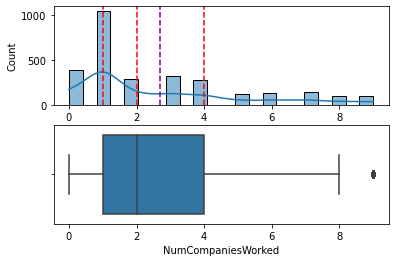

count    2940.000000
mean        2.693197
std         2.497584
min         0.000000
25%         1.000000
50%         2.000000
75%         4.000000
max         9.000000
Name: NumCompaniesWorked, dtype: float64
lower_whisker: 0
upper_whisker: 8
outlier: [9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9]
outlier counts: 104
Data skewed dengan hasil skew = 1.0254233954371303
**************************************************
   
13
PercentSalaryHike


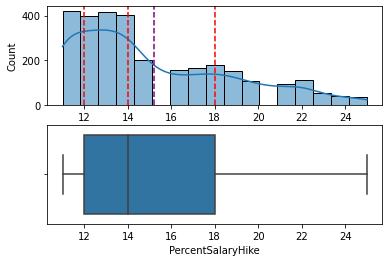

count    2940.000000
mean       15.209524
std         3.659315
min        11.000000
25%        12.000000
50%        14.000000
75%        18.000000
max        25.000000
Name: PercentSalaryHike, dtype: float64
lower_whisker: 11
upper_whisker: 25
outlier: []
outlier counts: 0
Data skewed dengan hasil skew = 0.8202898522796265
**************************************************
   
14
PerformanceRating


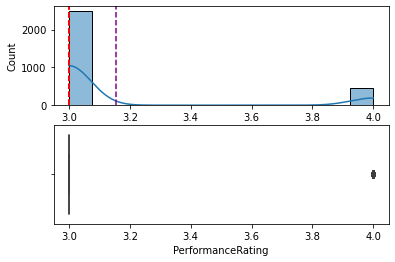

count    2940.000000
mean        3.153741
std         0.360762
min         3.000000
25%         3.000000
50%         3.000000
75%         3.000000
max         4.000000
Name: PerformanceRating, dtype: float64
lower_whisker: 3
upper_whisker: 3
outlier: [4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4

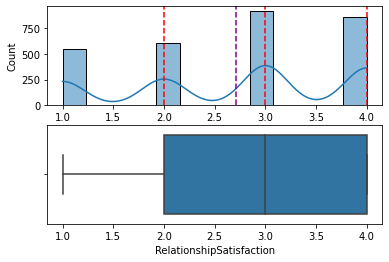

count    2940.000000
mean        2.712245
std         1.081025
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max         4.000000
Name: RelationshipSatisfaction, dtype: float64
lower_whisker: 1
upper_whisker: 4
outlier: []
outlier counts: 0
Data skewed dengan hasil skew = -0.3025184698222079
**************************************************
   
16
StandardHours


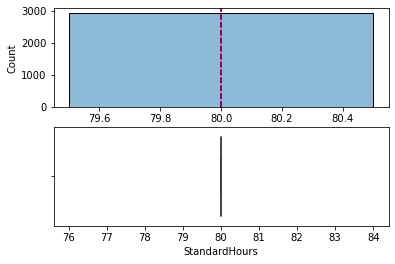

count    2940.0
mean       80.0
std         0.0
min        80.0
25%        80.0
50%        80.0
75%        80.0
max        80.0
Name: StandardHours, dtype: float64
lower_whisker: 80
upper_whisker: 80
outlier: []
outlier counts: 0
Data tidak skewed
**************************************************
   
17
StockOptionLevel


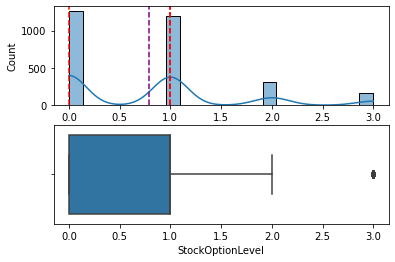

count    2940.000000
mean        0.793878
std         0.851932
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         3.000000
Name: StockOptionLevel, dtype: float64
lower_whisker: 0
upper_whisker: 2
outlier: [3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
outlier counts: 170
Data skewed dengan hasil skew = 0.9679912809556102
**************************************************
   
18
TotalWorkingYears


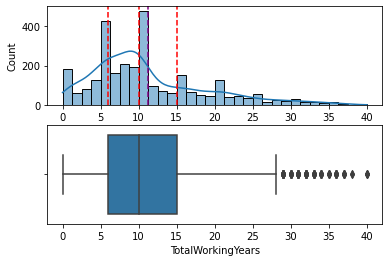

count    2940.000000
mean       11.279592
std         7.779458
min         0.000000
25%         6.000000
50%        10.000000
75%        15.000000
max        40.000000
Name: TotalWorkingYears, dtype: float64
lower_whisker: 0
upper_whisker: 28
outlier: [31, 29, 37, 38, 30, 40, 36, 34, 32, 33, 37, 30, 36, 31, 33, 32, 37, 31, 32, 32, 30, 34, 30, 40, 29, 35, 31, 33, 31, 29, 32, 30, 33, 30, 29, 31, 32, 33, 36, 34, 31, 36, 33, 31, 29, 33, 29, 32, 31, 35, 29, 32, 34, 36, 32, 30, 36, 29, 34, 37, 29, 29, 35, 31, 29, 37, 38, 30, 40, 36, 34, 32, 33, 37, 30, 36, 31, 33, 32, 37, 31, 32, 32, 30, 34, 30, 40, 29, 35, 31, 33, 31, 29, 32, 30, 33, 30, 29, 31, 32, 33, 36, 34, 31, 36, 33, 31, 29, 33, 29, 32, 31, 35, 29, 32, 34, 36, 32, 30, 36, 29, 34, 37, 29, 29, 35]
outlier counts: 126
Data skewed dengan hasil skew = 1.11603155825941
**************************************************
   
19
TrainingTimesLastYear


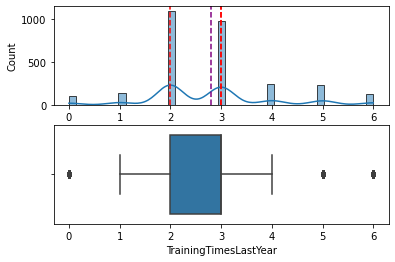

count    2940.000000
mean        2.799320
std         1.289051
min         0.000000
25%         2.000000
50%         3.000000
75%         3.000000
max         6.000000
Name: TrainingTimesLastYear, dtype: float64
lower_whisker: 1
upper_whisker: 4
outlier: [0, 5, 5, 5, 6, 5, 5, 5, 6, 6, 0, 0, 0, 5, 0, 5, 5, 5, 6, 6, 5, 0, 6, 5, 5, 0, 5, 5, 6, 5, 5, 5, 0, 5, 5, 5, 5, 6, 6, 5, 5, 5, 5, 0, 0, 5, 5, 5, 6, 6, 5, 0, 5, 0, 5, 5, 0, 6, 0, 5, 5, 6, 6, 5, 6, 5, 0, 5, 5, 5, 5, 0, 6, 5, 5, 5, 5, 6, 5, 5, 6, 5, 5, 5, 0, 5, 0, 5, 5, 6, 5, 6, 5, 0, 5, 5, 0, 6, 6, 5, 6, 0, 5, 0, 6, 6, 6, 6, 5, 5, 0, 5, 0, 0, 6, 0, 6, 5, 6, 5, 5, 0, 5, 6, 6, 5, 5, 0, 0, 6, 0, 0, 5, 0, 5, 6, 5, 5, 6, 6, 5, 5, 5, 5, 5, 6, 5, 6, 6, 0, 6, 6, 5, 5, 0, 0, 6, 6, 0, 5, 0, 0, 0, 0, 0, 5, 5, 6, 5, 5, 0, 5, 5, 0, 5, 5, 6, 5, 5, 5, 6, 5, 5, 5, 0, 0, 5, 5, 5, 5, 6, 0, 0, 6, 6, 6, 6, 5, 5, 5, 6, 5, 0, 5, 5, 6, 5, 6, 6, 5, 6, 6, 5, 0, 5, 5, 5, 5, 5, 0, 0, 0, 6, 5, 6, 6, 5, 6, 0, 6, 6, 5, 6, 6, 5, 5, 5, 0, 0, 5, 5, 5, 6, 5, 5, 5, 6, 6, 

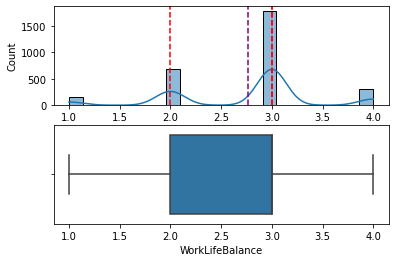

count    2940.000000
mean        2.761224
std         0.706356
min         1.000000
25%         2.000000
50%         3.000000
75%         3.000000
max         4.000000
Name: WorkLifeBalance, dtype: float64
lower_whisker: 1
upper_whisker: 4
outlier: []
outlier counts: 0
Data skewed dengan hasil skew = -0.5519163838185224
**************************************************
   
21
YearsAtCompany


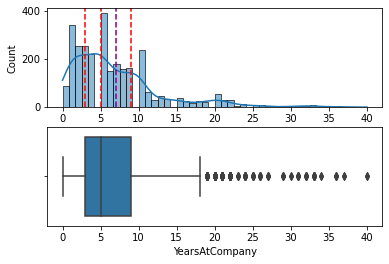

count    2940.000000
mean        7.008163
std         6.125483
min         0.000000
25%         3.000000
50%         5.000000
75%         9.000000
max        40.000000
Name: YearsAtCompany, dtype: float64
lower_whisker: 0
upper_whisker: 18
outlier: [25, 22, 22, 27, 21, 22, 37, 25, 20, 40, 20, 24, 20, 24, 33, 20, 19, 22, 33, 24, 19, 21, 20, 36, 20, 20, 22, 24, 21, 21, 25, 21, 29, 20, 27, 20, 31, 32, 20, 20, 21, 22, 22, 34, 24, 26, 31, 20, 31, 26, 19, 21, 21, 32, 21, 19, 20, 22, 20, 21, 26, 20, 22, 24, 33, 29, 25, 21, 19, 19, 20, 19, 33, 19, 19, 20, 20, 20, 20, 20, 32, 20, 21, 33, 36, 26, 30, 22, 23, 23, 21, 21, 22, 22, 19, 22, 19, 22, 20, 20, 20, 22, 20, 20, 25, 22, 22, 27, 21, 22, 37, 25, 20, 40, 20, 24, 20, 24, 33, 20, 19, 22, 33, 24, 19, 21, 20, 36, 20, 20, 22, 24, 21, 21, 25, 21, 29, 20, 27, 20, 31, 32, 20, 20, 21, 22, 22, 34, 24, 26, 31, 20, 31, 26, 19, 21, 21, 32, 21, 19, 20, 22, 20, 21, 26, 20, 22, 24, 33, 29, 25, 21, 19, 19, 20, 19, 33, 19, 19, 20, 20, 20, 20, 20, 32, 20, 21, 33

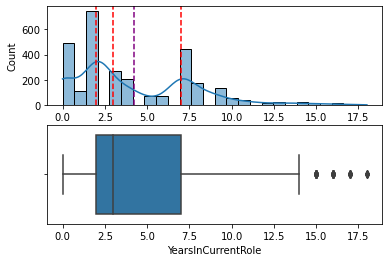

count    2940.000000
mean        4.229252
std         3.622521
min         0.000000
25%         2.000000
50%         3.000000
75%         7.000000
max        18.000000
Name: YearsInCurrentRole, dtype: float64
lower_whisker: 0
upper_whisker: 14
outlier: [15, 16, 18, 15, 18, 17, 16, 15, 16, 15, 16, 16, 15, 16, 17, 15, 15, 15, 17, 17, 16, 15, 16, 18, 15, 18, 17, 16, 15, 16, 15, 16, 16, 15, 16, 17, 15, 15, 15, 17, 17, 16]
outlier counts: 42
Data skewed dengan hasil skew = 0.9164268059808774
**************************************************
   
23
YearsSinceLastPromotion


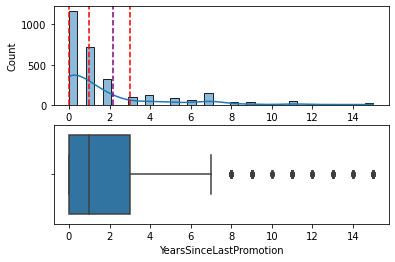

count    2940.000000
mean        2.187755
std         3.221882
min         0.000000
25%         0.000000
50%         1.000000
75%         3.000000
max        15.000000
Name: YearsSinceLastPromotion, dtype: float64
lower_whisker: 0
upper_whisker: 7
outlier: [8, 15, 8, 8, 9, 13, 12, 10, 11, 9, 12, 15, 15, 15, 9, 11, 11, 9, 12, 11, 15, 11, 10, 9, 11, 9, 8, 11, 11, 8, 13, 9, 9, 12, 10, 11, 15, 13, 9, 11, 10, 8, 8, 11, 9, 11, 12, 11, 14, 13, 14, 8, 11, 15, 10, 11, 11, 15, 11, 13, 11, 13, 15, 8, 13, 15, 11, 14, 15, 15, 9, 11, 9, 8, 9, 15, 11, 12, 9, 8, 10, 14, 8, 13, 13, 12, 14, 8, 8, 8, 14, 14, 8, 12, 13, 14, 14, 12, 11, 8, 11, 9, 12, 8, 9, 11, 9, 8, 15, 8, 8, 9, 13, 12, 10, 11, 9, 12, 15, 15, 15, 9, 11, 11, 9, 12, 11, 15, 11, 10, 9, 11, 9, 8, 11, 11, 8, 13, 9, 9, 12, 10, 11, 15, 13, 9, 11, 10, 8, 8, 11, 9, 11, 12, 11, 14, 13, 14, 8, 11, 15, 10, 11, 11, 15, 11, 13, 11, 13, 15, 8, 13, 15, 11, 14, 15, 15, 9, 11, 9, 8, 9, 15, 11, 12, 9, 8, 10, 14, 8, 13, 13, 12, 14, 8, 8, 8, 14, 14, 8, 12, 13,

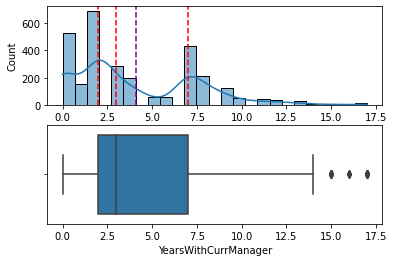

count    2940.000000
mean        4.123129
std         3.567529
min         0.000000
25%         2.000000
50%         3.000000
75%         7.000000
max        17.000000
Name: YearsWithCurrManager, dtype: float64
lower_whisker: 0
upper_whisker: 14
outlier: [17, 15, 15, 15, 15, 17, 16, 17, 15, 17, 17, 17, 17, 16, 17, 15, 15, 15, 15, 17, 16, 17, 15, 17, 17, 17, 17, 16]
outlier counts: 28
Data skewed dengan hasil skew = 0.832600290620938
**************************************************
   


In [6]:
a = 1

for x in employee_num.columns :
    print(a)
    print(x)
    
    fig, axs= plt.subplots(2,1)
    sns.histplot(data = employee_num, x=x, kde=True, ax = axs[0])
    axs[0].axvline(np.percentile(employee_num[x], 25), color='red', linestyle='--')
    axs[0].axvline(np.percentile(employee_num[x], 50), color='red', linestyle='--')
    axs[0].axvline(np.percentile(employee_num[x], 75), color='red', linestyle='--')
    axs[0].axvline(np.mean(employee_num[x]), color='purple', linestyle='--')
    
    sns.boxplot(data = employee_num, x=x, ax= axs[1])
    
    plt.show()
    
    print(employee_num[x].describe())
    whisk(employee_num[x])
    
    skw = skew(employee_num[x])
    stat, p_value = skewtest(employee_num[x])
    if p_value < 0.05:
        print ('Data skewed dengan hasil skew = {}'.format(skw))
    else:
        print ('Data tidak skewed')
    
    print('*'*50)
    print('   ')
    a += 1

we can see the plot and description of the dataset for each numeric column.

In [7]:
employee_obj = employee.select_dtypes('object')
employee_obj = employee_obj.drop('Over18', axis=1)
employee_obj.head()

Attrition     BusinessTravel              Department EducationField  Gender  \
0       Yes      Travel_Rarely                   Sales  Life Sciences  Female   
1        No  Travel_Frequently  Research & Development  Life Sciences    Male   
2       Yes      Travel_Rarely  Research & Development          Other    Male   
3        No  Travel_Frequently  Research & Development  Life Sciences  Female   
4        No      Travel_Rarely  Research & Development        Medical    Male   

                 JobRole MaritalStatus OverTime  
0        Sales Executive        Single      Yes  
1     Research Scientist       Married       No  
2  Laboratory Technician        Single      Yes  
3     Research Scientist       Married      Yes  
4  Laboratory Technician       Married       No

1
Attrition


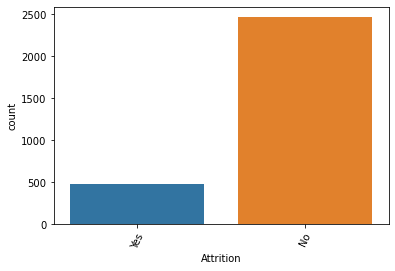

No     2466
Yes     474
Name: Attrition, dtype: int64
No     0.838776
Yes    0.161224
Name: Attrition, dtype: float64
unique values:['Yes' 'No']
unique values counts:2.
2
BusinessTravel


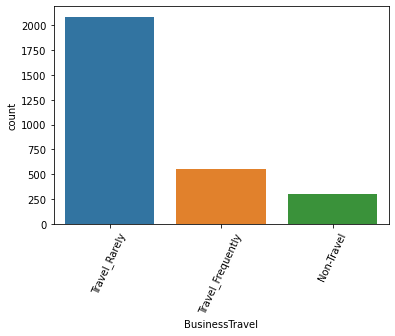

Travel_Rarely        2086
Travel_Frequently     554
Non-Travel            300
Name: BusinessTravel, dtype: int64
Travel_Rarely        0.709524
Travel_Frequently    0.188435
Non-Travel           0.102041
Name: BusinessTravel, dtype: float64
unique values:['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
unique values counts:3.
3
Department


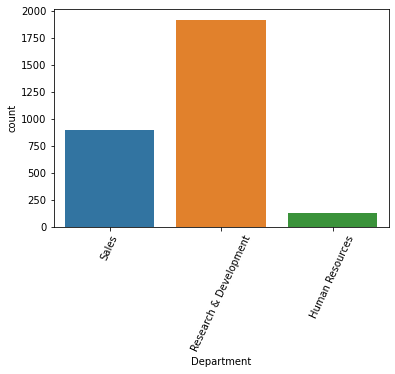

Research & Development    1922
Sales                      892
Human Resources            126
Name: Department, dtype: int64
Research & Development    0.653741
Sales                     0.303401
Human Resources           0.042857
Name: Department, dtype: float64
unique values:['Sales' 'Research & Development' 'Human Resources']
unique values counts:3.
4
EducationField


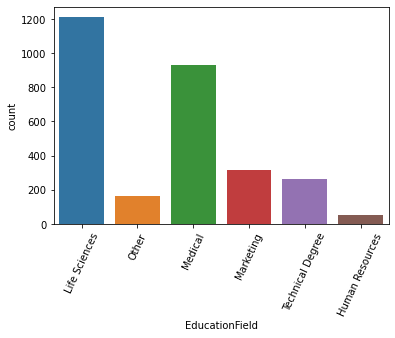

Life Sciences       1212
Medical              928
Marketing            318
Technical Degree     264
Other                164
Human Resources       54
Name: EducationField, dtype: int64
Life Sciences       0.412245
Medical             0.315646
Marketing           0.108163
Technical Degree    0.089796
Other               0.055782
Human Resources     0.018367
Name: EducationField, dtype: float64
unique values:['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']
unique values counts:6.
5
Gender


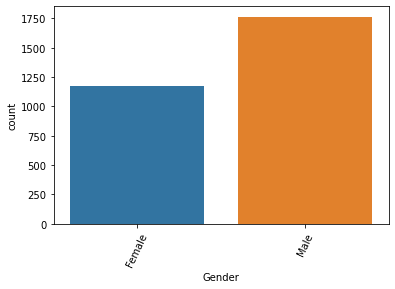

Male      1764
Female    1176
Name: Gender, dtype: int64
Male      0.6
Female    0.4
Name: Gender, dtype: float64
unique values:['Female' 'Male']
unique values counts:2.
6
JobRole


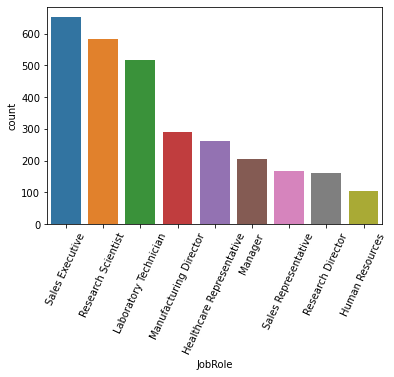

Sales Executive              652
Research Scientist           584
Laboratory Technician        518
Manufacturing Director       290
Healthcare Representative    262
Manager                      204
Sales Representative         166
Research Director            160
Human Resources              104
Name: JobRole, dtype: int64
Sales Executive              0.221769
Research Scientist           0.198639
Laboratory Technician        0.176190
Manufacturing Director       0.098639
Healthcare Representative    0.089116
Manager                      0.069388
Sales Representative         0.056463
Research Director            0.054422
Human Resources              0.035374
Name: JobRole, dtype: float64
unique values:['Sales Executive' 'Research Scientist' 'Laboratory Technician'
 'Manufacturing Director' 'Healthcare Representative' 'Manager'
 'Sales Representative' 'Research Director' 'Human Resources']
unique values counts:9.
7
MaritalStatus


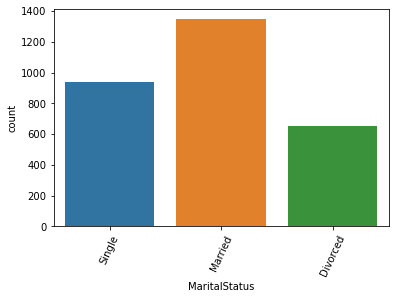

Married     1346
Single       940
Divorced     654
Name: MaritalStatus, dtype: int64
Married     0.457823
Single      0.319728
Divorced    0.222449
Name: MaritalStatus, dtype: float64
unique values:['Single' 'Married' 'Divorced']
unique values counts:3.
8
OverTime


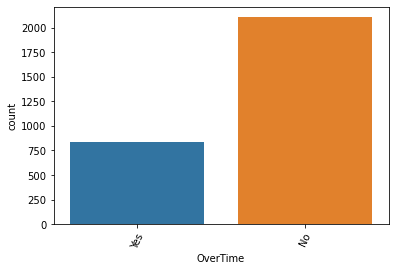

No     2108
Yes     832
Name: OverTime, dtype: int64
No     0.717007
Yes    0.282993
Name: OverTime, dtype: float64
unique values:['Yes' 'No']
unique values counts:2.


In [8]:
a = 1
for y in employee_obj.columns:
    print(a)
    print(y)
    sns.countplot(data = employee_obj, x = y)
    plt.xticks(rotation=65)
    plt.show()
    print(employee_obj[y].value_counts())
    print(employee_obj[y].value_counts(normalize=True))
    print('unique values:{}'.format(employee_obj[y].unique()))
    print('unique values counts:{}.'.format(len(employee_obj[y].unique())))
    a += 1

we can see the plot and description of the dataset for each object column.

(3) Lakukan EDA multivariat untuk tiap pasangan kolom numerik-numerik pada employee.csv yang mencakup:<p>
    a. regplot antar kolom numerik<p>
        b. lakukan normal test pada kedua variabel <p>
        c. apabila kedua variabel berasal dari populasi normal hitung koefisien korelasi pearson bersama p-value nya <p>
        d. apabila kedua variabel tidak berasal dari populasi normal hitung koefisien korelasi spearman bersama p-value nya

In [9]:
employee_num.head()

Age  DailyRate  DistanceFromHome  Education  EnvironmentSatisfaction  \
0   41       1102                 1          2                        2   
1   49        279                 8          1                        3   
2   37       1373                 2          2                        4   
3   33       1392                 3          4                        4   
4   27        591                 2          1                        1   

   HourlyRate  JobInvolvement  JobLevel  JobSatisfaction  MonthlyIncome  \
0          94               3         2                4           5993   
1          61               2         2                2           5130   
2          92               2         1                3           2090   
3          56               3         1                3           2909   
4          40               3         1                2           3468   

   MonthlyRate  NumCompaniesWorked  PercentSalaryHike  PerformanceRating  \
0        19479                   8                 11                  3   
1        24907                   1                 23                  4   
2         2396                   6                 15                  3   
3        23159                   1                 11                  3   
4        16632                   9                 12                  3   

   RelationshipSatisfaction  StandardHours  StockOptionLevel  \
0                         1             80                 0   
1                         4             80                 1   
2                         2             80                 0   
3                         3             80                 0   
4                         4             80                 1   

   TotalWorkingYears  TrainingTimesLastYear  WorkLifeBalance  YearsAtCompany  \
0                  8                      0                1               6   
1                 10                      3                3              10   
2                  7                      3                3               0   
3                  8                      3                3               8   
4                  6                      3                3               2   

   YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
0                   4                        0                     5  
1                   7                        1                     7  
2                   0                        0                     0  
3                   7                        3                     0  
4                   2                        2                     2

1
Age - DailyRate


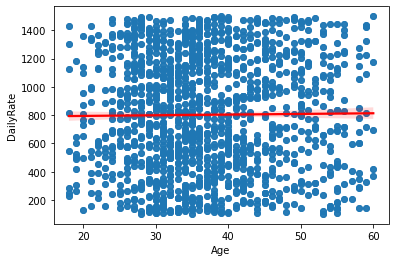

SpearmanrResult(correlation=0.007289728044117844, pvalue=0.69276975518985)
**************************************************
2
Age - DistanceFromHome


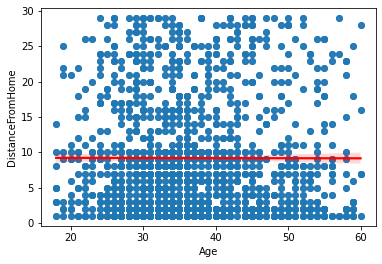

SpearmanrResult(correlation=-0.019290910985248558, pvalue=0.2957273838455554)
**************************************************
3
Age - Education


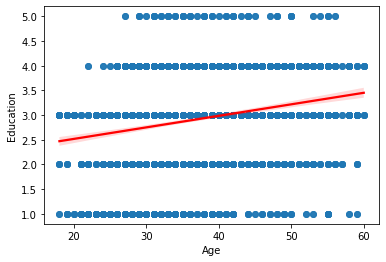

SpearmanrResult(correlation=0.20493668426294695, pvalue=3.0166162648148966e-29)
**************************************************
4
Age - EnvironmentSatisfaction


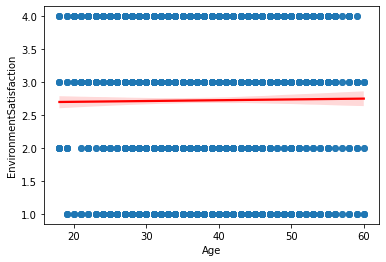

SpearmanrResult(correlation=0.00982011553441057, pvalue=0.5945525694494938)
**************************************************
5
Age - HourlyRate


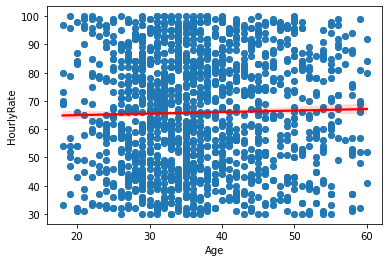

SpearmanrResult(correlation=0.02885848516353823, pvalue=0.11771933282331203)
**************************************************
6
Age - JobInvolvement


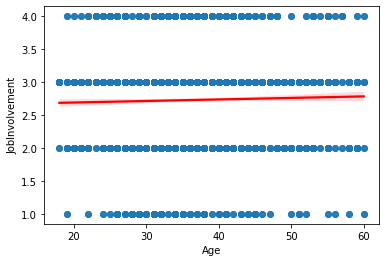

SpearmanrResult(correlation=0.034456224000108115, pvalue=0.06175684283247481)
**************************************************
7
Age - JobLevel


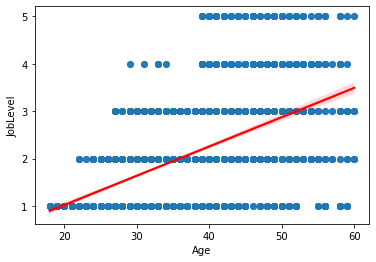

SpearmanrResult(correlation=0.48961781089554174, pvalue=4.197797534699224e-177)
**************************************************
8
Age - JobSatisfaction


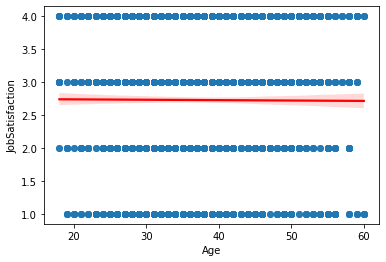

SpearmanrResult(correlation=-0.005184852121396131, pvalue=0.7786995243634464)
**************************************************
9
Age - MonthlyIncome


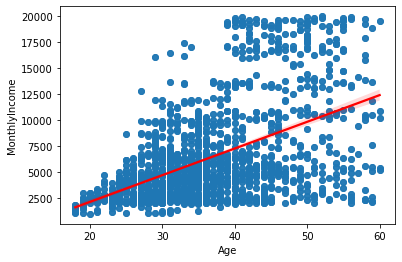

SpearmanrResult(correlation=0.471902130232714, pvalue=5.958563375943626e-163)
**************************************************
10
Age - MonthlyRate


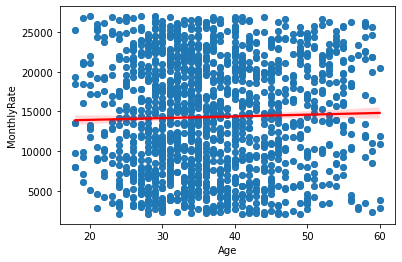

SpearmanrResult(correlation=0.01745100080296337, pvalue=0.34420278907629775)
**************************************************
11
Age - NumCompaniesWorked


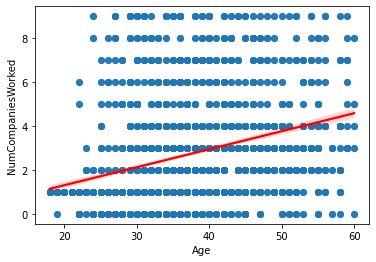

SpearmanrResult(correlation=0.35321263079158877, pvalue=4.019902478455891e-87)
**************************************************
12
Age - PercentSalaryHike


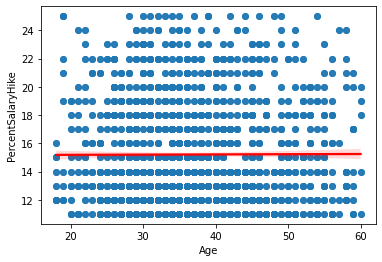

SpearmanrResult(correlation=0.007708837983941598, pvalue=0.6760821832195099)
**************************************************
13
Age - PerformanceRating


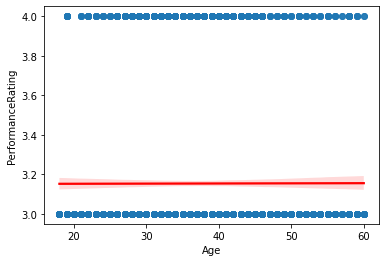

SpearmanrResult(correlation=9.338863125535507e-05, pvalue=0.9959614900327622)
**************************************************
14
Age - RelationshipSatisfaction


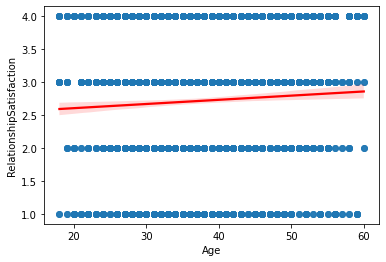

SpearmanrResult(correlation=0.046063319903500696, pvalue=0.012493201128485756)
**************************************************
15
Age - StandardHours


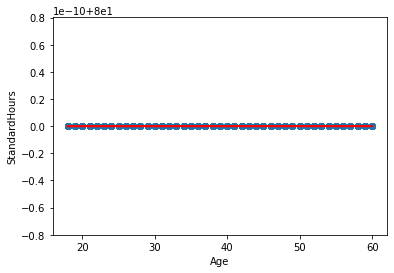

C:\Users\user\anaconda3\lib\site-packages\scipy\stats\stats.py:4484: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(SpearmanRConstantInputWarning())


SpearmanrResult(correlation=nan, pvalue=nan)
**************************************************
16
Age - StockOptionLevel


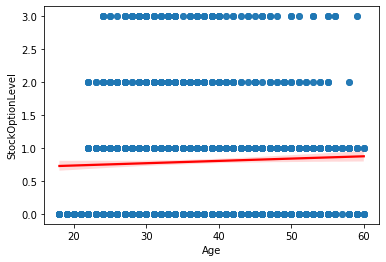

SpearmanrResult(correlation=0.056633063475323084, pvalue=0.0021269781245761977)
**************************************************
17
Age - TotalWorkingYears


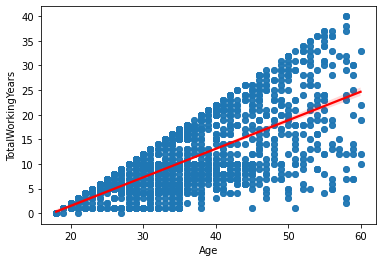

SpearmanrResult(correlation=0.656895823213162, pvalue=0.0)
**************************************************
18
Age - TrainingTimesLastYear


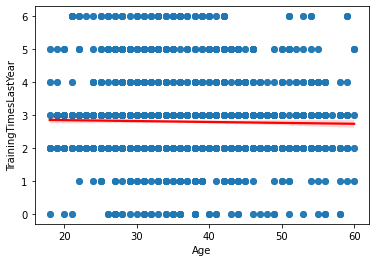

SpearmanrResult(correlation=0.00031580491694933107, pvalue=0.9863438997746217)
**************************************************
19
Age - WorkLifeBalance


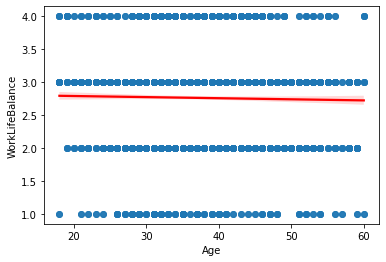

SpearmanrResult(correlation=-0.003706791003682171, pvalue=0.8407736582563284)
**************************************************
20
Age - YearsAtCompany


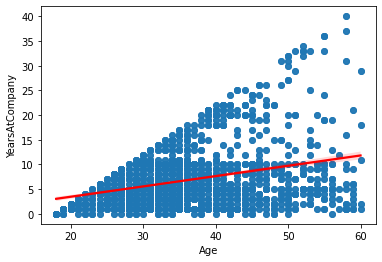

SpearmanrResult(correlation=0.2516859699509598, pvalue=1.034692983288091e-43)
**************************************************
21
Age - YearsInCurrentRole


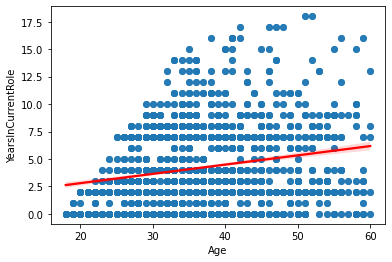

SpearmanrResult(correlation=0.19797756100400973, pvalue=2.2846795631417662e-27)
**************************************************
22
Age - YearsSinceLastPromotion


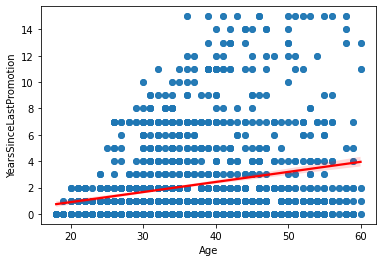

SpearmanrResult(correlation=0.1736472238168011, pvalue=2.4568908440880162e-21)
**************************************************
23
Age - YearsWithCurrManager


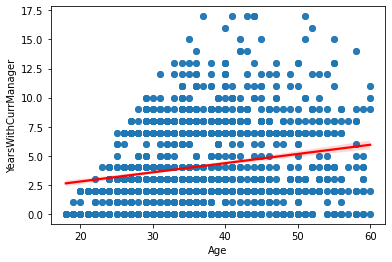

SpearmanrResult(correlation=0.19481758412797953, pvalue=1.5464671218207155e-26)
**************************************************
24
DailyRate - DistanceFromHome


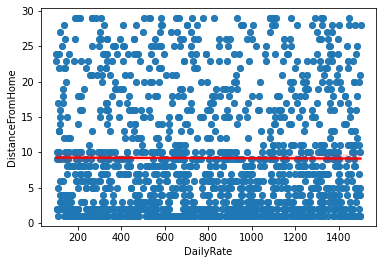

SpearmanrResult(correlation=-0.0027536667797074072, pvalue=0.8813599442132525)
**************************************************
25
DailyRate - Education


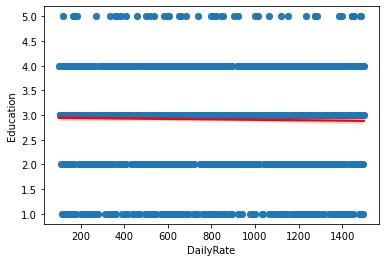

SpearmanrResult(correlation=-0.013607132107227618, pvalue=0.4608042806386452)
**************************************************
26
DailyRate - EnvironmentSatisfaction


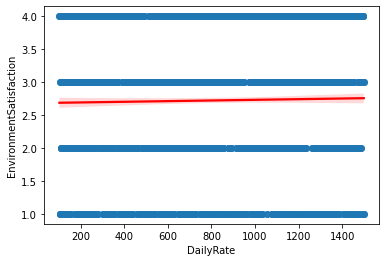

SpearmanrResult(correlation=0.01896119181352265, pvalue=0.30406061698263015)
**************************************************
27
DailyRate - HourlyRate


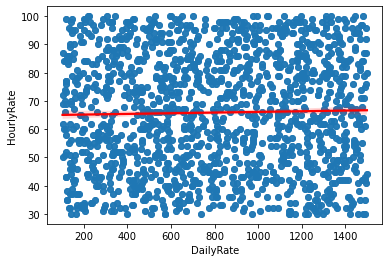

SpearmanrResult(correlation=0.023511433281152457, pvalue=0.2024984962077429)
**************************************************
28
DailyRate - JobInvolvement


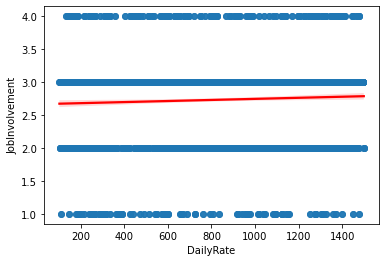

SpearmanrResult(correlation=0.04246878184735499, pvalue=0.021290546226160847)
**************************************************
29
DailyRate - JobLevel


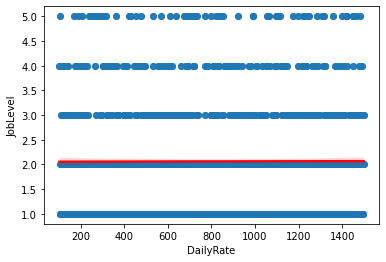

SpearmanrResult(correlation=0.003816355156729909, pvalue=0.8361330391549409)
**************************************************
30
DailyRate - JobSatisfaction


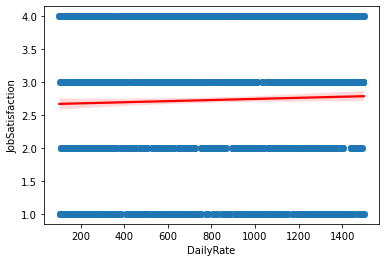

SpearmanrResult(correlation=0.027828761662227978, pvalue=0.13140740114615457)
**************************************************
31
DailyRate - MonthlyIncome


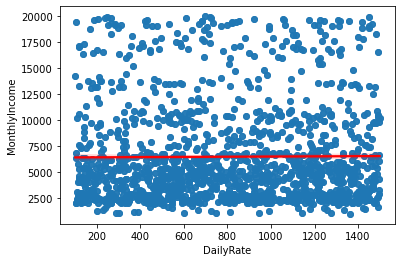

SpearmanrResult(correlation=0.016259651841387765, pvalue=0.37814984297348164)
**************************************************
32
DailyRate - MonthlyRate


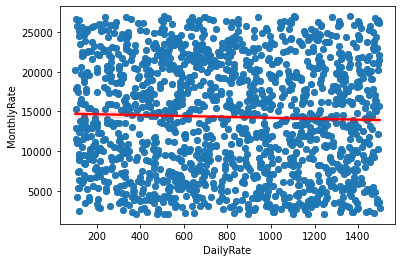

SpearmanrResult(correlation=-0.03235951997245843, pvalue=0.07937849838748814)
**************************************************
33
DailyRate - NumCompaniesWorked


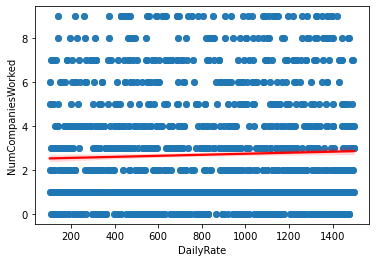

SpearmanrResult(correlation=0.036548345445756136, pvalue=0.047531293163970534)
**************************************************
34
DailyRate - PercentSalaryHike


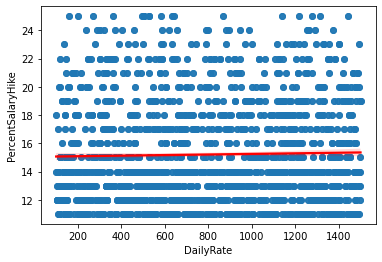

SpearmanrResult(correlation=0.02507040343270031, pvalue=0.17414751306837023)
**************************************************
35
DailyRate - PerformanceRating


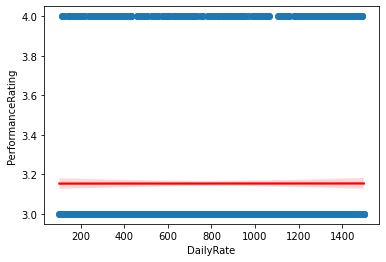

SpearmanrResult(correlation=0.0006244328586809105, pvalue=0.9730019812965637)
**************************************************
36
DailyRate - RelationshipSatisfaction


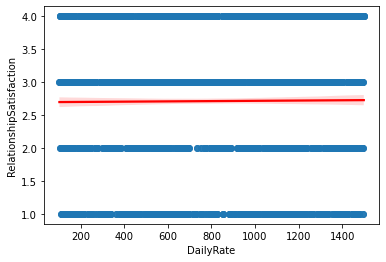

SpearmanrResult(correlation=0.00968452835360801, pvalue=0.5996518466374775)
**************************************************
37
DailyRate - StandardHours


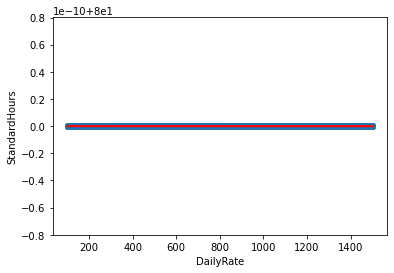

C:\Users\user\anaconda3\lib\site-packages\scipy\stats\stats.py:4484: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(SpearmanRConstantInputWarning())


SpearmanrResult(correlation=nan, pvalue=nan)
**************************************************
38
DailyRate - StockOptionLevel


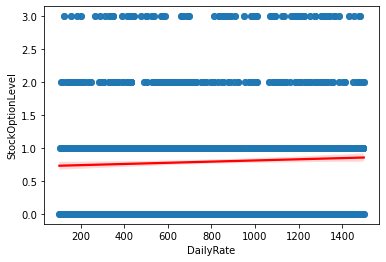

SpearmanrResult(correlation=0.03851393353444212, pvalue=0.03678158362557222)
**************************************************
39
DailyRate - TotalWorkingYears


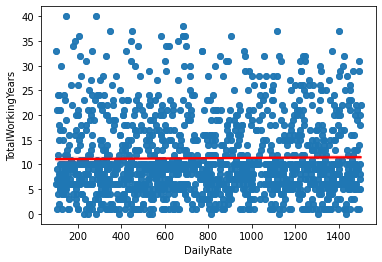

SpearmanrResult(correlation=0.020950699420673024, pvalue=0.25611333476124437)
**************************************************
40
DailyRate - TrainingTimesLastYear


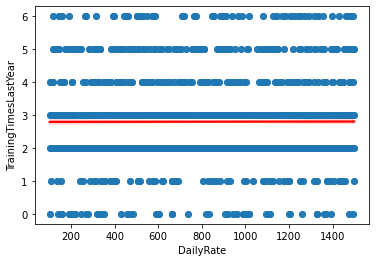

SpearmanrResult(correlation=-0.011338974540025925, pvalue=0.5388337537260395)
**************************************************
41
DailyRate - WorkLifeBalance


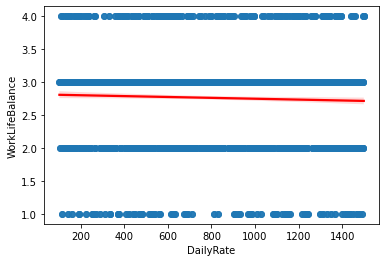

SpearmanrResult(correlation=-0.040352314887821934, pvalue=0.028674375718448306)
**************************************************
42
DailyRate - YearsAtCompany


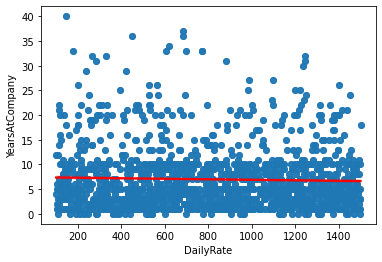

SpearmanrResult(correlation=-0.009778343947306216, pvalue=0.5961214390317586)
**************************************************
43
DailyRate - YearsInCurrentRole


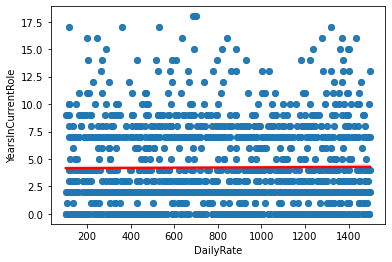

SpearmanrResult(correlation=0.007207538803194541, pvalue=0.6960601233788736)
**************************************************
44
DailyRate - YearsSinceLastPromotion


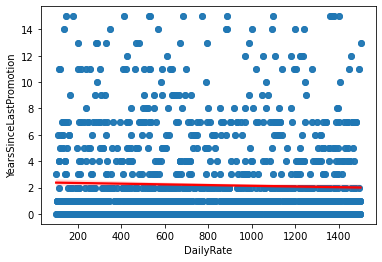

SpearmanrResult(correlation=-0.037631293170119644, pvalue=0.041321436013887984)
**************************************************
45
DailyRate - YearsWithCurrManager


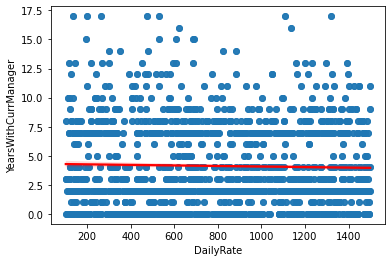

SpearmanrResult(correlation=-0.004716518904715812, pvalue=0.7982360441112056)
**************************************************
46
DistanceFromHome - Education


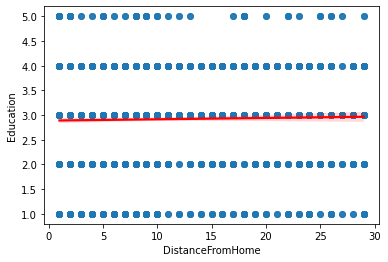

SpearmanrResult(correlation=0.015708004968988647, pvalue=0.3945437973287914)
**************************************************
47
DistanceFromHome - EnvironmentSatisfaction


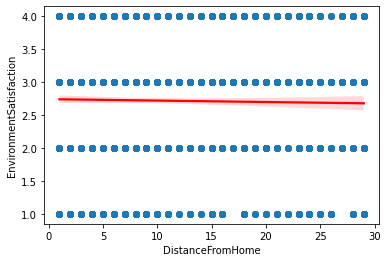

SpearmanrResult(correlation=-0.010400913109934545, pvalue=0.5729370067043138)
**************************************************
48
DistanceFromHome - HourlyRate


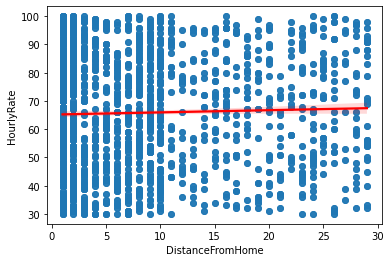

SpearmanrResult(correlation=0.02044590781925942, pvalue=0.26775056163439825)
**************************************************
49
DistanceFromHome - JobInvolvement


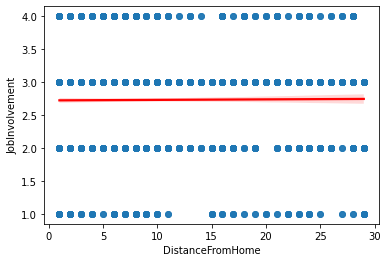

SpearmanrResult(correlation=0.03443007005503541, pvalue=0.06195484919342413)
**************************************************
50
DistanceFromHome - JobLevel


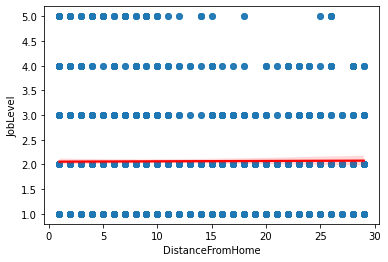

SpearmanrResult(correlation=0.02214760710484909, pvalue=0.2299378561882599)
**************************************************
51
DistanceFromHome - JobSatisfaction


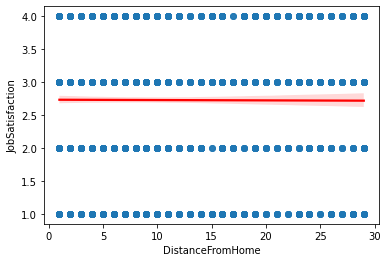

SpearmanrResult(correlation=-0.013078054042407583, pvalue=0.47842131740786964)
**************************************************
52
DistanceFromHome - MonthlyIncome


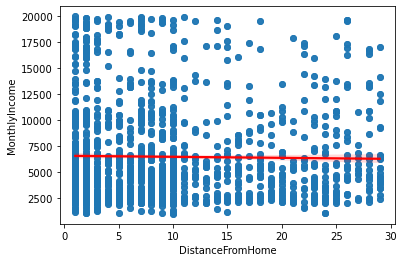

SpearmanrResult(correlation=0.002512448420823388, pvalue=0.8916855663272149)
**************************************************
53
DistanceFromHome - MonthlyRate


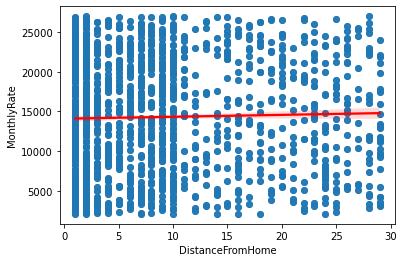

SpearmanrResult(correlation=0.03961780522063657, pvalue=0.03170762387551838)
**************************************************
54
DistanceFromHome - NumCompaniesWorked


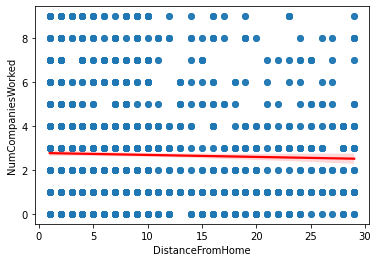

SpearmanrResult(correlation=-0.00959187700056381, pvalue=0.6031476986453711)
**************************************************
55
DistanceFromHome - PercentSalaryHike


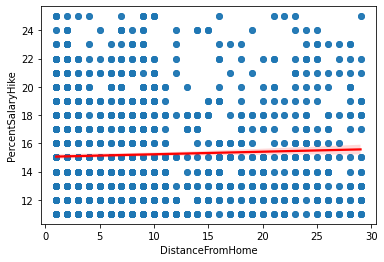

SpearmanrResult(correlation=0.029666427948417493, pvalue=0.10778349200812928)
**************************************************
56
DistanceFromHome - PerformanceRating


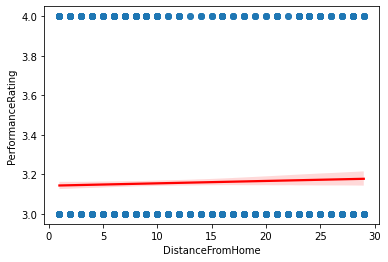

SpearmanrResult(correlation=0.011319673780960831, pvalue=0.5395250544794351)
**************************************************
57
DistanceFromHome - RelationshipSatisfaction


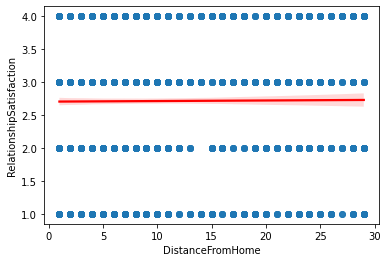

SpearmanrResult(correlation=0.005851811211412193, pvalue=0.7511196748937004)
**************************************************
58
DistanceFromHome - StandardHours


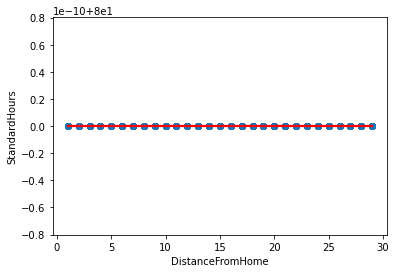

C:\Users\user\anaconda3\lib\site-packages\scipy\stats\stats.py:4484: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(SpearmanRConstantInputWarning())


SpearmanrResult(correlation=nan, pvalue=nan)
**************************************************
59
DistanceFromHome - StockOptionLevel


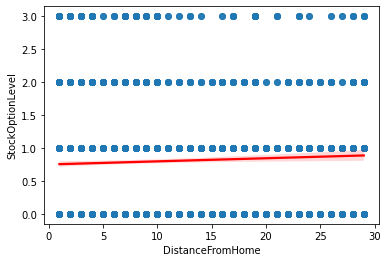

SpearmanrResult(correlation=0.03019029429227645, pvalue=0.1017040373103863)
**************************************************
60
DistanceFromHome - TotalWorkingYears


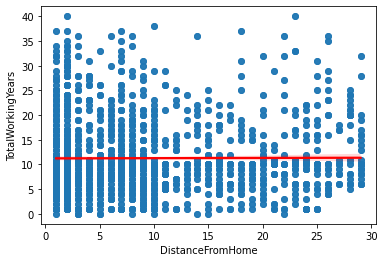

SpearmanrResult(correlation=-0.0029123746354370135, pvalue=0.874577141824263)
**************************************************
61
DistanceFromHome - TrainingTimesLastYear


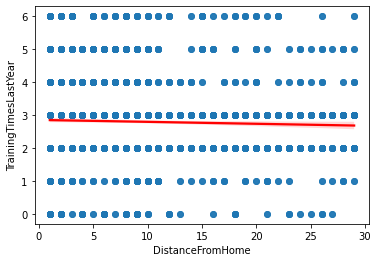

SpearmanrResult(correlation=-0.024848360913254746, pvalue=0.17799406943715154)
**************************************************
62
DistanceFromHome - WorkLifeBalance


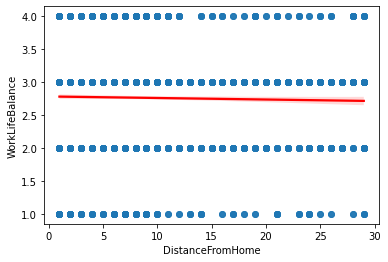

SpearmanrResult(correlation=-0.020401886909142356, pvalue=0.2687823488602647)
**************************************************
63
DistanceFromHome - YearsAtCompany


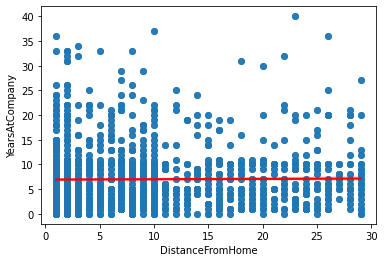

SpearmanrResult(correlation=0.01051309493489628, pvalue=0.5688052718091519)
**************************************************
64
DistanceFromHome - YearsInCurrentRole


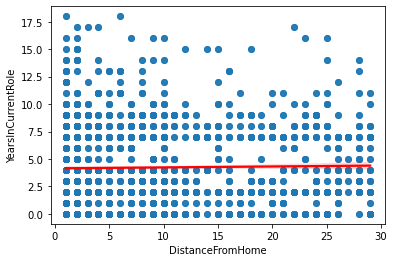

SpearmanrResult(correlation=0.01370809637131024, pvalue=0.4574840829846717)
**************************************************
65
DistanceFromHome - YearsSinceLastPromotion


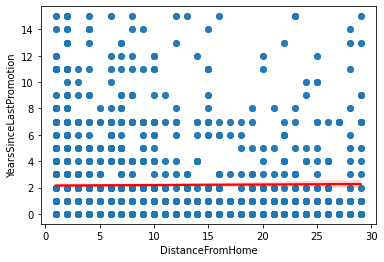

SpearmanrResult(correlation=-0.004685210833973205, pvalue=0.799546723793586)
**************************************************
66
DistanceFromHome - YearsWithCurrManager


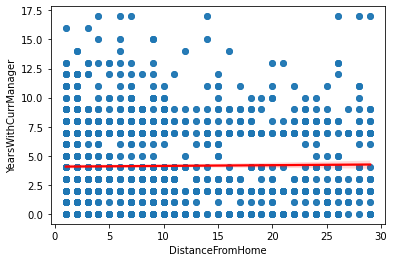

SpearmanrResult(correlation=0.004447867974834503, pvalue=0.8095009460299484)
**************************************************
67
Education - EnvironmentSatisfaction


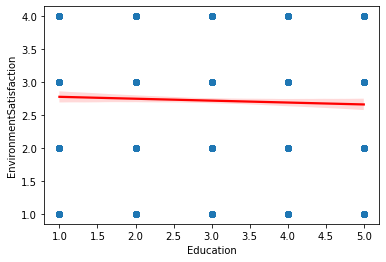

SpearmanrResult(correlation=-0.027624689628706536, pvalue=0.13426105317751916)
**************************************************
68
Education - HourlyRate


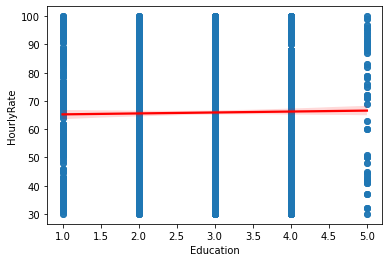

SpearmanrResult(correlation=0.014431900253602338, pvalue=0.43407877358670977)
**************************************************
69
Education - JobInvolvement


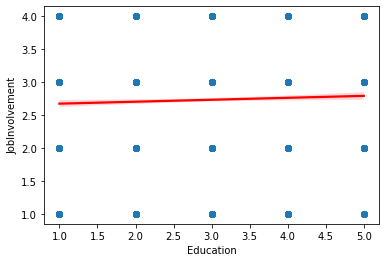

SpearmanrResult(correlation=0.037230796703121516, pvalue=0.04353287713536371)
**************************************************
70
Education - JobLevel


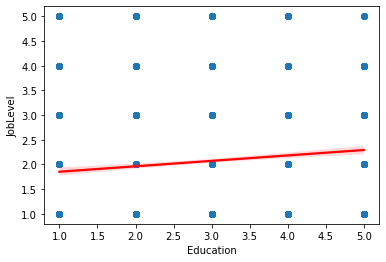

SpearmanrResult(correlation=0.10741916381028464, pvalue=5.255257573793144e-09)
**************************************************
71
Education - JobSatisfaction


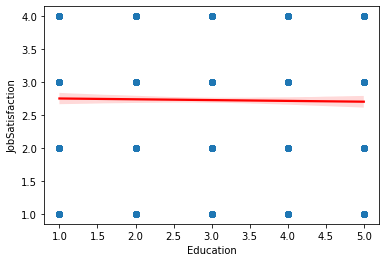

SpearmanrResult(correlation=-0.005175468670271538, pvalue=0.7790896311104079)
**************************************************
72
Education - MonthlyIncome


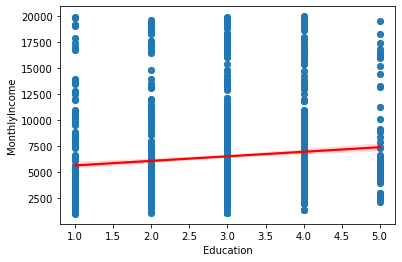

SpearmanrResult(correlation=0.12002849135771107, pvalue=6.620800098369639e-11)
**************************************************
73
Education - MonthlyRate


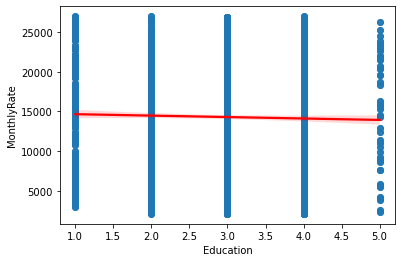

SpearmanrResult(correlation=-0.021213827767731237, pvalue=0.25018857618035595)
**************************************************
74
Education - NumCompaniesWorked


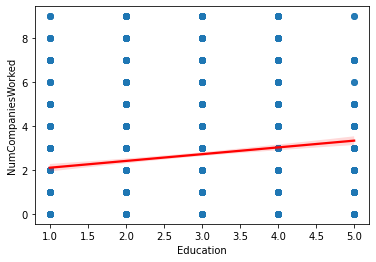

SpearmanrResult(correlation=0.13510337535063993, pvalue=1.892507969764383e-13)
**************************************************
75
Education - PercentSalaryHike


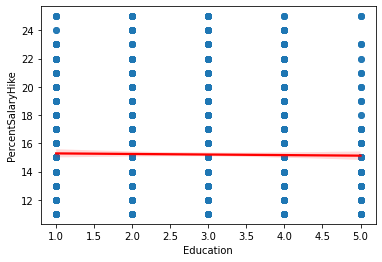

SpearmanrResult(correlation=0.004299935630355092, pvalue=0.8157209986324607)
**************************************************
76
Education - PerformanceRating


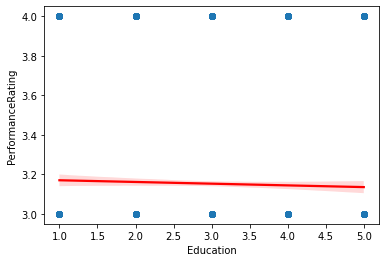

SpearmanrResult(correlation=-0.02508066939246116, pvalue=0.17397118324828875)
**************************************************
77
Education - RelationshipSatisfaction


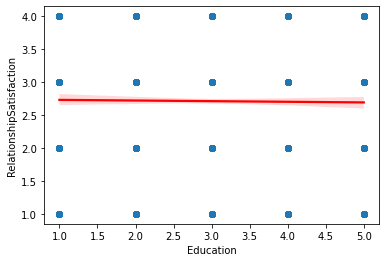

SpearmanrResult(correlation=-0.013172612473768717, pvalue=0.47524600090809654)
**************************************************
78
Education - StandardHours


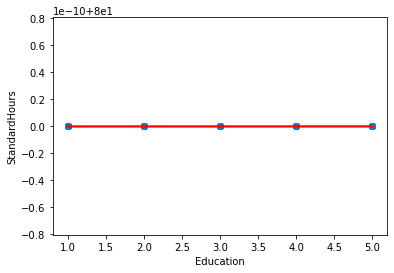

C:\Users\user\anaconda3\lib\site-packages\scipy\stats\stats.py:4484: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(SpearmanRConstantInputWarning())


SpearmanrResult(correlation=nan, pvalue=nan)
**************************************************
79
Education - StockOptionLevel


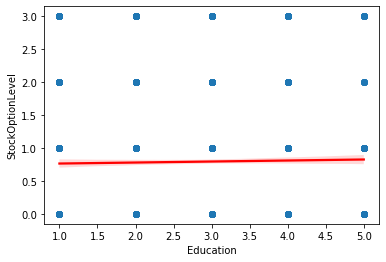

SpearmanrResult(correlation=0.013793504009850155, pvalue=0.45468597547850687)
**************************************************
80
Education - TotalWorkingYears


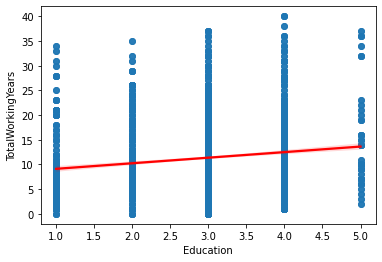

SpearmanrResult(correlation=0.1621767933147504, pvalue=8.877627565672107e-19)
**************************************************
81
Education - TrainingTimesLastYear


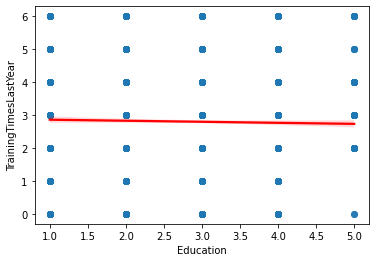

SpearmanrResult(correlation=-0.023748617030788007, pvalue=0.19798071025146818)
**************************************************
82
Education - WorkLifeBalance


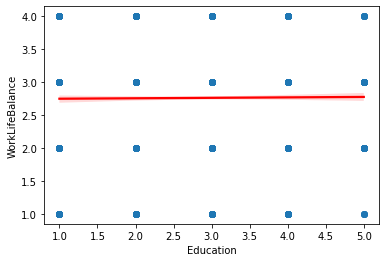

SpearmanrResult(correlation=0.017350435054979265, pvalue=0.3469909058501387)
**************************************************
83
Education - YearsAtCompany


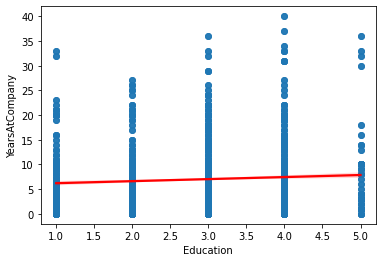

SpearmanrResult(correlation=0.06419612923203707, pvalue=0.0004959391931211807)
**************************************************
84
Education - YearsInCurrentRole


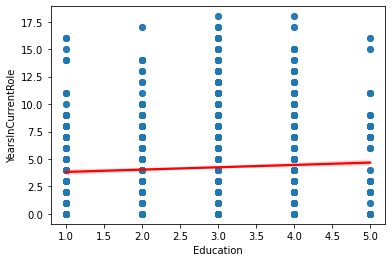

SpearmanrResult(correlation=0.05456721092891851, pvalue=0.0030796121094043907)
**************************************************
85
Education - YearsSinceLastPromotion


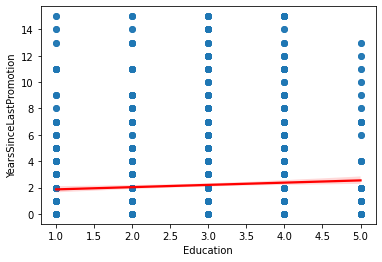

SpearmanrResult(correlation=0.032203024480317644, pvalue=0.08084308347347924)
**************************************************
86
Education - YearsWithCurrManager


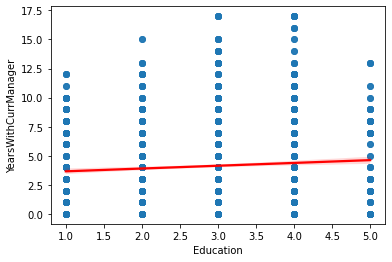

SpearmanrResult(correlation=0.05129186624592803, pvalue=0.005406100714906023)
**************************************************
87
EnvironmentSatisfaction - HourlyRate


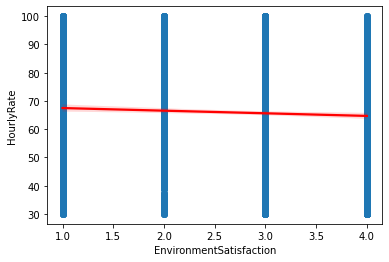

SpearmanrResult(correlation=-0.052380363461633404, pvalue=0.004498665185749437)
**************************************************
88
EnvironmentSatisfaction - JobInvolvement


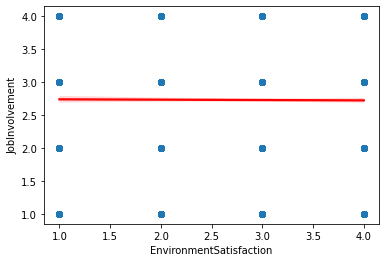

SpearmanrResult(correlation=-0.015301118806672672, pvalue=0.4069067075488896)
**************************************************
89
EnvironmentSatisfaction - JobLevel


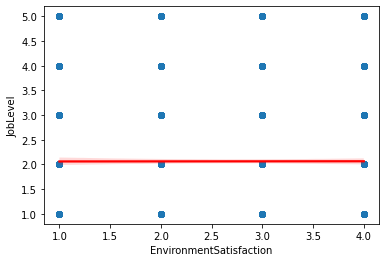

SpearmanrResult(correlation=-0.00019243168604686338, pvalue=0.9916785747183845)
**************************************************
90
EnvironmentSatisfaction - JobSatisfaction


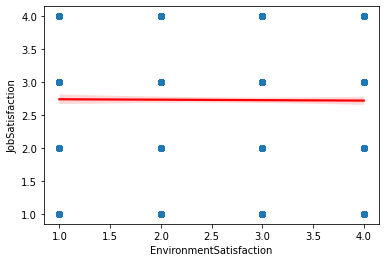

SpearmanrResult(correlation=-0.0029927822722807585, pvalue=0.871144187623942)
**************************************************
91
EnvironmentSatisfaction - MonthlyIncome


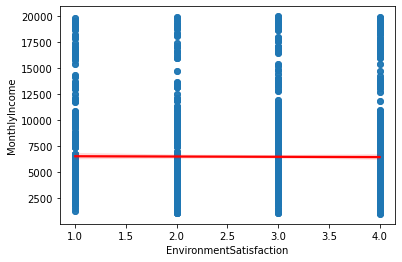

SpearmanrResult(correlation=-0.015163077434038212, pvalue=0.41115290112456326)
**************************************************
92
EnvironmentSatisfaction - MonthlyRate


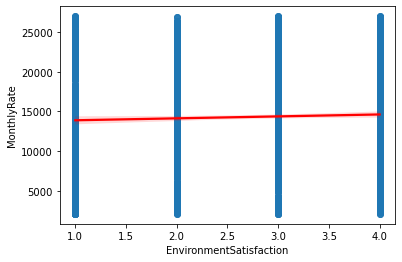

SpearmanrResult(correlation=0.03747650942841222, pvalue=0.04216457249066054)
**************************************************
93
EnvironmentSatisfaction - NumCompaniesWorked


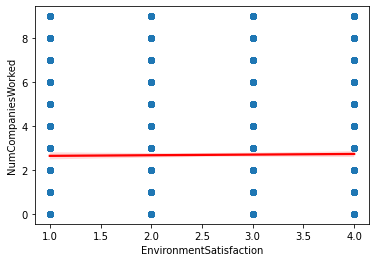

SpearmanrResult(correlation=0.006151418148874666, pvalue=0.7388307967093195)
**************************************************
94
EnvironmentSatisfaction - PercentSalaryHike


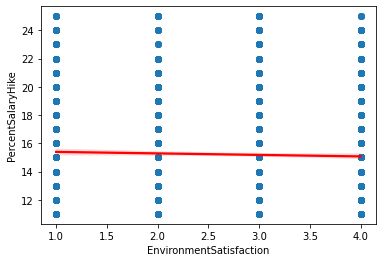

SpearmanrResult(correlation=-0.03048942614514931, pvalue=0.09835696241840987)
**************************************************
95
EnvironmentSatisfaction - PerformanceRating


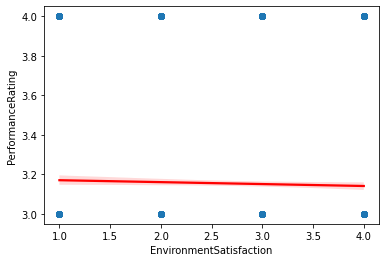

SpearmanrResult(correlation=-0.02915981685959382, pvalue=0.11393279885852876)
**************************************************
96
EnvironmentSatisfaction - RelationshipSatisfaction


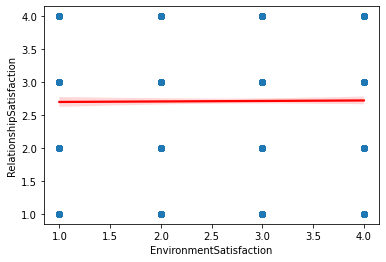

SpearmanrResult(correlation=0.00535345814527739, pvalue=0.7716994979495687)
**************************************************
97
EnvironmentSatisfaction - StandardHours


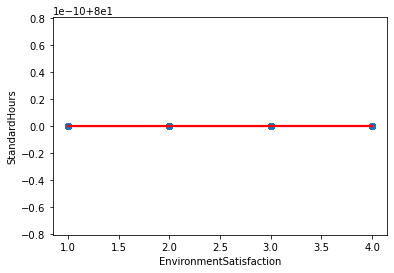

C:\Users\user\anaconda3\lib\site-packages\scipy\stats\stats.py:4484: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(SpearmanRConstantInputWarning())


SpearmanrResult(correlation=nan, pvalue=nan)
**************************************************
98
EnvironmentSatisfaction - StockOptionLevel


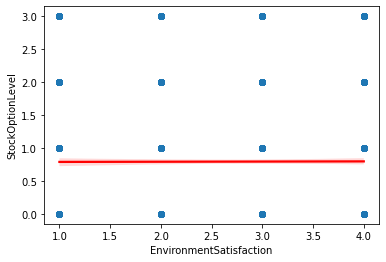

SpearmanrResult(correlation=0.00982616968176533, pvalue=0.594325342552996)
**************************************************
99
EnvironmentSatisfaction - TotalWorkingYears


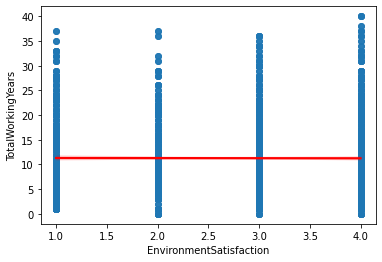

SpearmanrResult(correlation=-0.013881976000972665, pvalue=0.4517976641340412)
**************************************************
100
EnvironmentSatisfaction - TrainingTimesLastYear


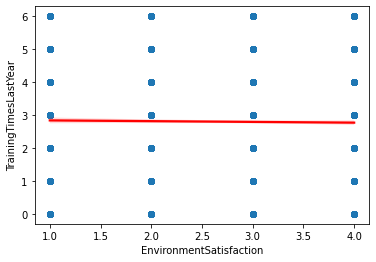

SpearmanrResult(correlation=-0.011658937697201636, pvalue=0.5274386011274335)
**************************************************
101
EnvironmentSatisfaction - WorkLifeBalance


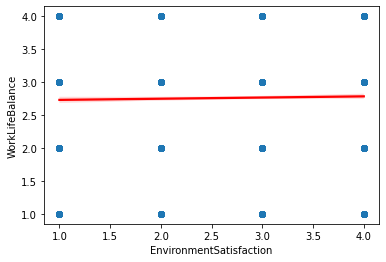

SpearmanrResult(correlation=0.02716897161742007, pvalue=0.1408063112320118)
**************************************************
102
EnvironmentSatisfaction - YearsAtCompany


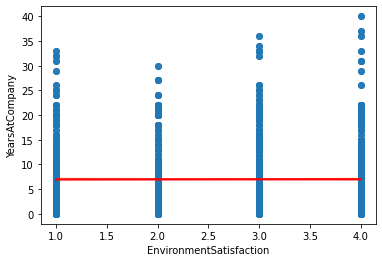

SpearmanrResult(correlation=0.008424504271928212, pvalue=0.6479547285367864)
**************************************************
103
EnvironmentSatisfaction - YearsInCurrentRole


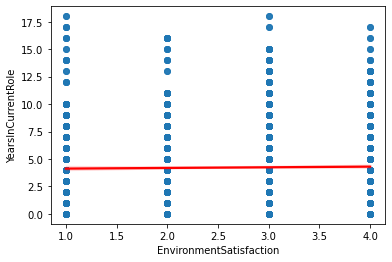

SpearmanrResult(correlation=0.020140165818025985, pvalue=0.27497302994730266)
**************************************************
104
EnvironmentSatisfaction - YearsSinceLastPromotion


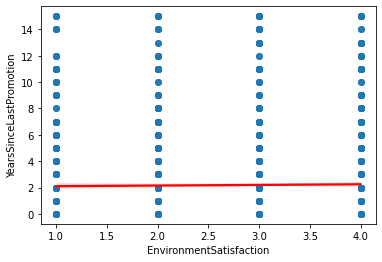

SpearmanrResult(correlation=0.02608167444694365, pvalue=0.15741077265090153)
**************************************************
105
EnvironmentSatisfaction - YearsWithCurrManager


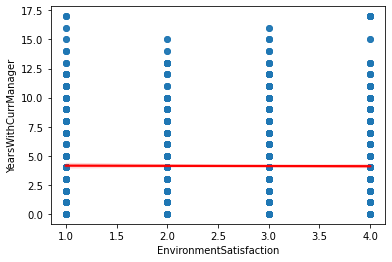

SpearmanrResult(correlation=-0.00173182420503788, pvalue=0.9252182190851089)
**************************************************
106
HourlyRate - JobInvolvement


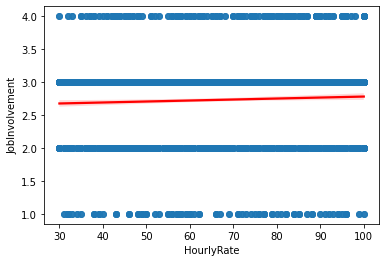

SpearmanrResult(correlation=0.04388431316126556, pvalue=0.017330523876155874)
**************************************************
107
HourlyRate - JobLevel


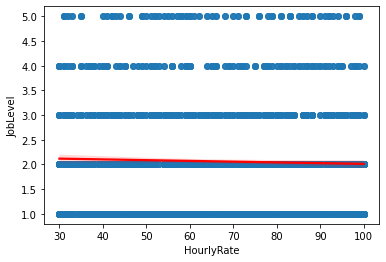

SpearmanrResult(correlation=-0.03387611132032741, pvalue=0.06627360724869032)
**************************************************
108
HourlyRate - JobSatisfaction


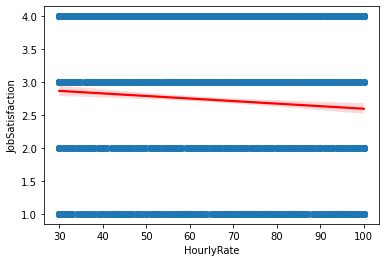

SpearmanrResult(correlation=-0.06834017259535337, pvalue=0.00020866778428645362)
**************************************************
109
HourlyRate - MonthlyIncome


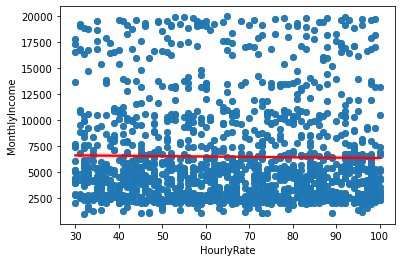

SpearmanrResult(correlation=-0.019761721893346577, pvalue=0.28409551304373915)
**************************************************
110
HourlyRate - MonthlyRate


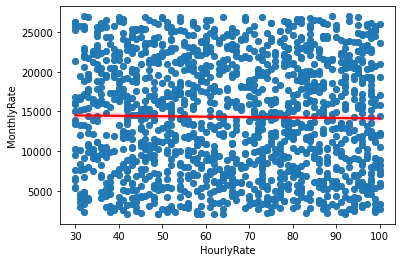

SpearmanrResult(correlation=-0.01488849975334271, pvalue=0.41967674523835063)
**************************************************
111
HourlyRate - NumCompaniesWorked


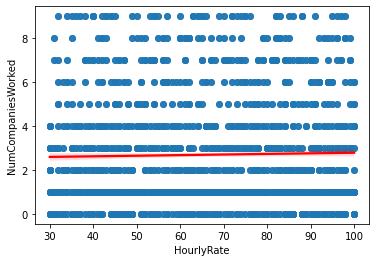

SpearmanrResult(correlation=0.019209250371218078, pvalue=0.29777687430286376)
**************************************************
112
HourlyRate - PercentSalaryHike


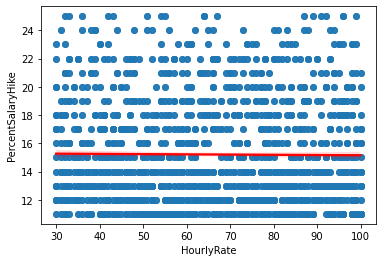

SpearmanrResult(correlation=-0.009875548312616741, pvalue=0.592473525749713)
**************************************************
113
HourlyRate - PerformanceRating


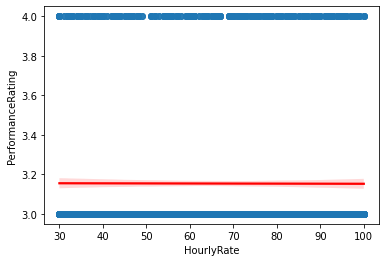

SpearmanrResult(correlation=-0.0021846441869309992, pvalue=0.9057467360636069)
**************************************************
114
HourlyRate - RelationshipSatisfaction


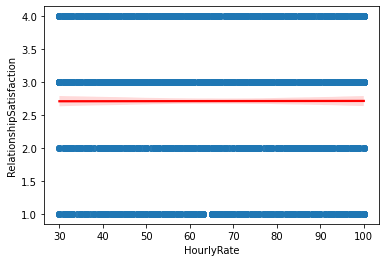

SpearmanrResult(correlation=0.0002585028152691532, pvalue=0.9888215888652153)
**************************************************
115
HourlyRate - StandardHours


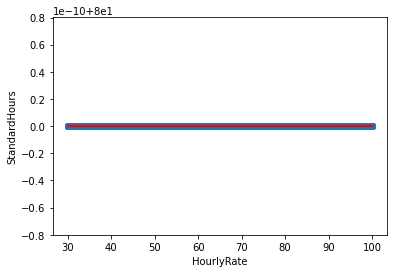

C:\Users\user\anaconda3\lib\site-packages\scipy\stats\stats.py:4484: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(SpearmanRConstantInputWarning())


SpearmanrResult(correlation=nan, pvalue=nan)
**************************************************
116
HourlyRate - StockOptionLevel


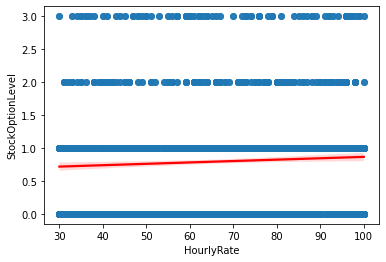

SpearmanrResult(correlation=0.05054307799880207, pvalue=0.0061229852793851635)
**************************************************
117
HourlyRate - TotalWorkingYears


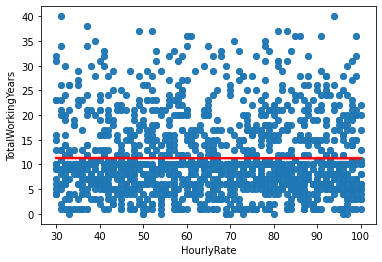

SpearmanrResult(correlation=-0.012071632754873675, pvalue=0.5129245058357815)
**************************************************
118
HourlyRate - TrainingTimesLastYear


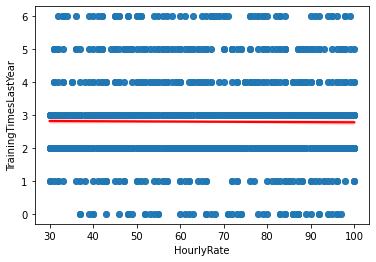

SpearmanrResult(correlation=0.0002918715012365139, pvalue=0.9873787435688544)
**************************************************
119
HourlyRate - WorkLifeBalance


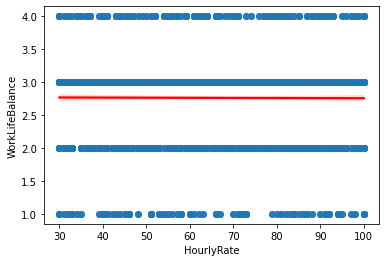

SpearmanrResult(correlation=-0.010003125737300443, pvalue=0.5877013564934224)
**************************************************
120
HourlyRate - YearsAtCompany


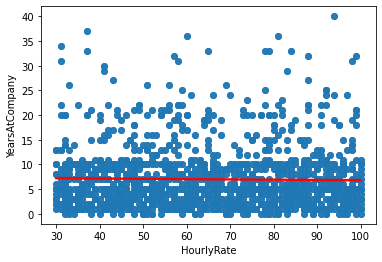

SpearmanrResult(correlation=-0.029032327714145, pvalue=0.11552296222310568)
**************************************************
121
HourlyRate - YearsInCurrentRole


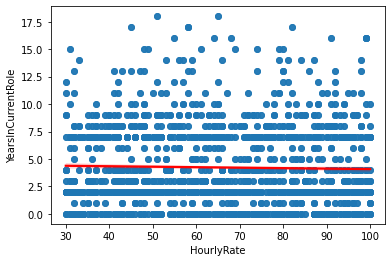

SpearmanrResult(correlation=-0.034016047545751514, pvalue=0.06515989606578516)
**************************************************
122
HourlyRate - YearsSinceLastPromotion


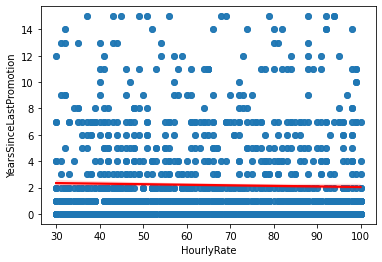

SpearmanrResult(correlation=-0.05241240222245271, pvalue=0.004474180411428229)
**************************************************
123
HourlyRate - YearsWithCurrManager


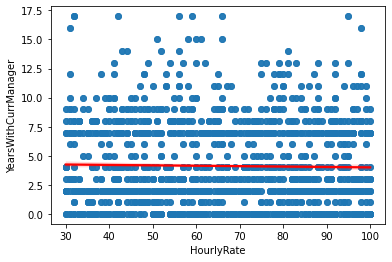

SpearmanrResult(correlation=-0.013811415507819945, pvalue=0.454100387558076)
**************************************************
124
JobInvolvement - JobLevel


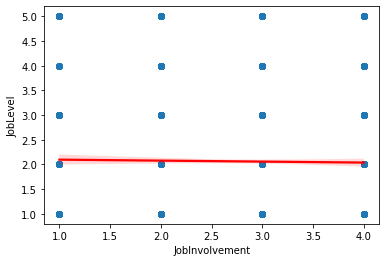

SpearmanrResult(correlation=-0.018423513048661837, pvalue=0.31798105174387753)
**************************************************
125
JobInvolvement - JobSatisfaction


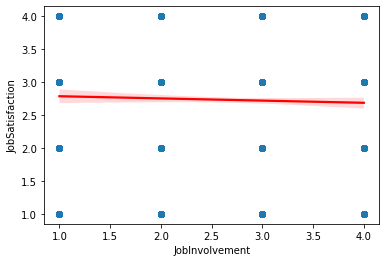

SpearmanrResult(correlation=-0.012148211843354711, pvalue=0.51025435281498)
**************************************************
126
JobInvolvement - MonthlyIncome


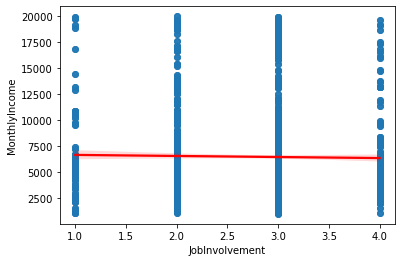

SpearmanrResult(correlation=-0.02455235242334959, pvalue=0.18321980602520765)
**************************************************
127
JobInvolvement - MonthlyRate


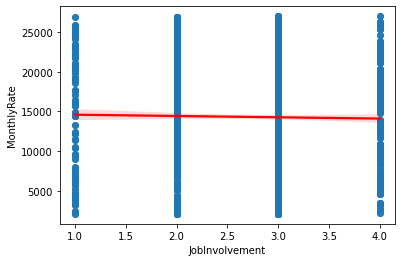

SpearmanrResult(correlation=-0.018117451571128398, pvalue=0.3260884787401799)
**************************************************
128
JobInvolvement - NumCompaniesWorked


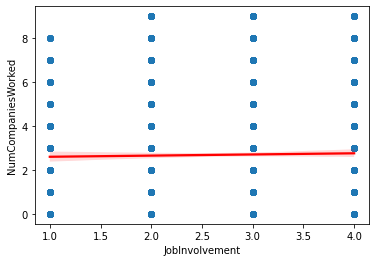

SpearmanrResult(correlation=0.01544815884569218, pvalue=0.4024125941105542)
**************************************************
129
JobInvolvement - PercentSalaryHike


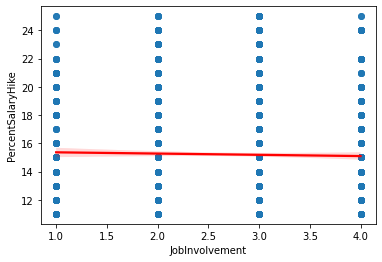

SpearmanrResult(correlation=-0.016998736601856794, pvalue=0.35685407977380335)
**************************************************
130
JobInvolvement - PerformanceRating


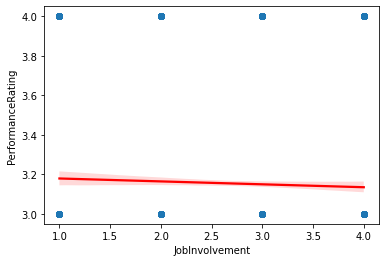

SpearmanrResult(correlation=-0.024732711659198204, pvalue=0.18002238686258107)
**************************************************
131
JobInvolvement - RelationshipSatisfaction


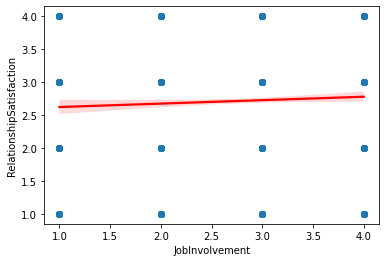

SpearmanrResult(correlation=0.03785729689995369, pvalue=0.0401160121325708)
**************************************************
132
JobInvolvement - StandardHours


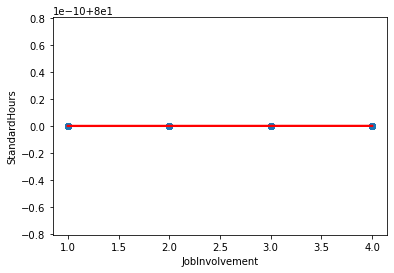

C:\Users\user\anaconda3\lib\site-packages\scipy\stats\stats.py:4484: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(SpearmanRConstantInputWarning())


SpearmanrResult(correlation=nan, pvalue=nan)
**************************************************
133
JobInvolvement - StockOptionLevel


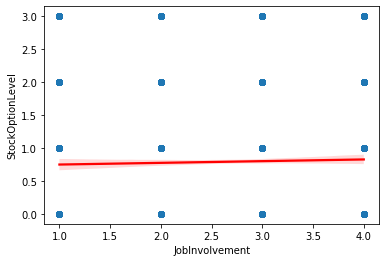

SpearmanrResult(correlation=0.034464289821546826, pvalue=0.061695883817084345)
**************************************************
134
JobInvolvement - TotalWorkingYears


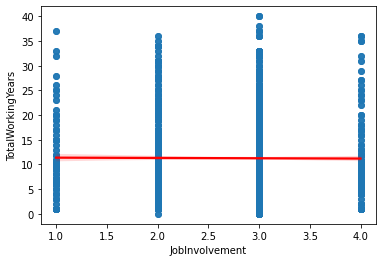

SpearmanrResult(correlation=0.0064441040693092545, pvalue=0.7268898115366755)
**************************************************
135
JobInvolvement - TrainingTimesLastYear


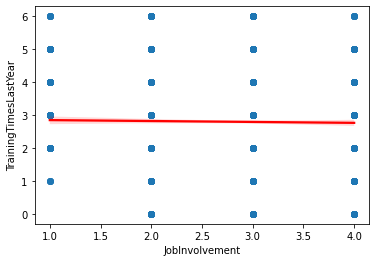

SpearmanrResult(correlation=0.00201391500312109, pvalue=0.9130821662806448)
**************************************************
136
JobInvolvement - WorkLifeBalance


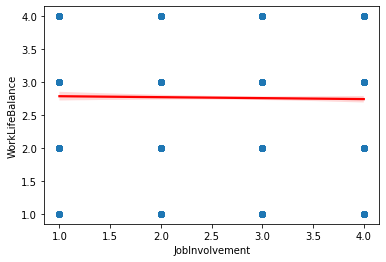

SpearmanrResult(correlation=-0.01988863432386915, pvalue=0.28101370842294715)
**************************************************
137
JobInvolvement - YearsAtCompany


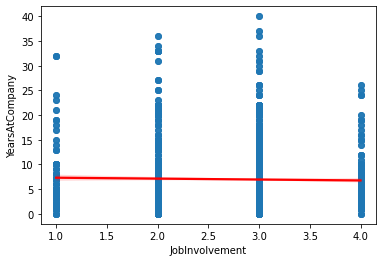

SpearmanrResult(correlation=0.013836362338992164, pvalue=0.45328549926641026)
**************************************************
138
JobInvolvement - YearsInCurrentRole


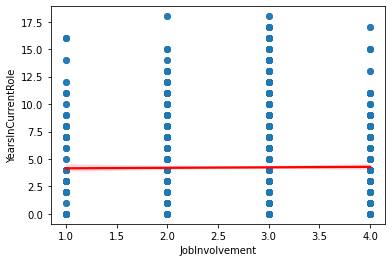

SpearmanrResult(correlation=0.015547840471072221, pvalue=0.3993829258421928)
**************************************************
139
JobInvolvement - YearsSinceLastPromotion


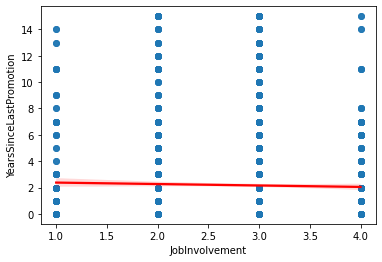

SpearmanrResult(correlation=-0.008306724699700384, pvalue=0.6525507203113239)
**************************************************
140
JobInvolvement - YearsWithCurrManager


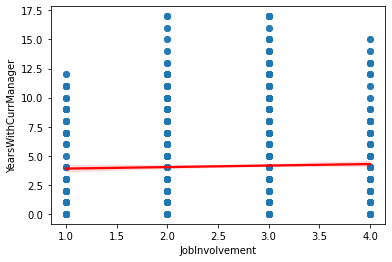

SpearmanrResult(correlation=0.03739701447374156, pvalue=0.04260322179672565)
**************************************************
141
JobLevel - JobSatisfaction


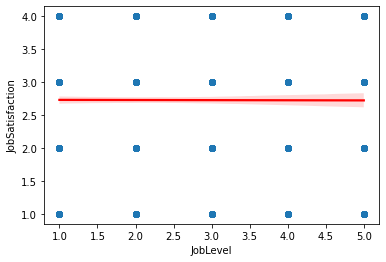

SpearmanrResult(correlation=-0.0008519729910609089, pvalue=0.9631700952437976)
**************************************************
142
JobLevel - MonthlyIncome


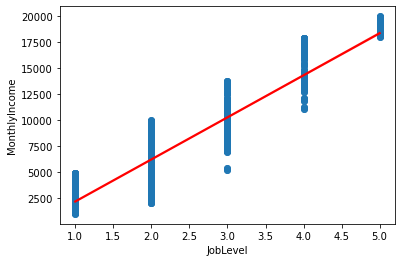

SpearmanrResult(correlation=0.9204286748392108, pvalue=0.0)
**************************************************
143
JobLevel - MonthlyRate


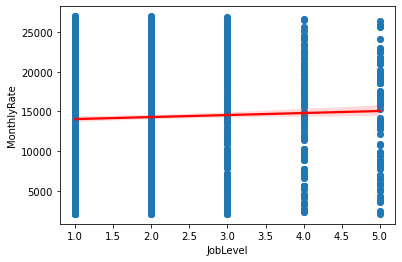

SpearmanrResult(correlation=0.0527918878356706, pvalue=0.00419321162928771)
**************************************************
144
JobLevel - NumCompaniesWorked


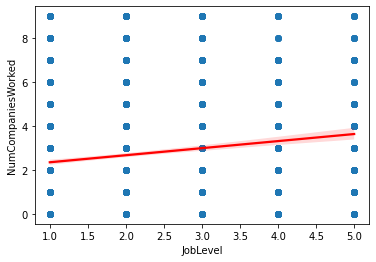

SpearmanrResult(correlation=0.17827015359880186, pvalue=2.0329394945697016e-22)
**************************************************
145
JobLevel - PercentSalaryHike


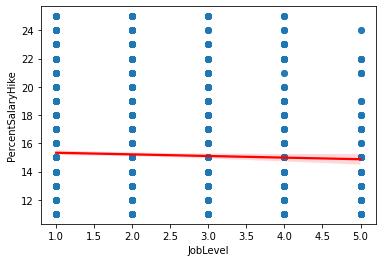

SpearmanrResult(correlation=-0.03245275225875634, pvalue=0.07851626968916613)
**************************************************
146
JobLevel - PerformanceRating


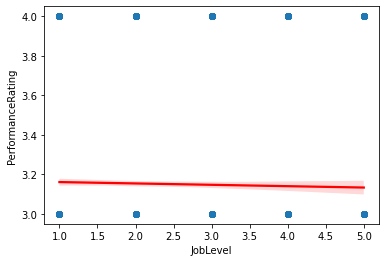

SpearmanrResult(correlation=-0.018608301437276042, pvalue=0.3131505607201813)
**************************************************
147
JobLevel - RelationshipSatisfaction


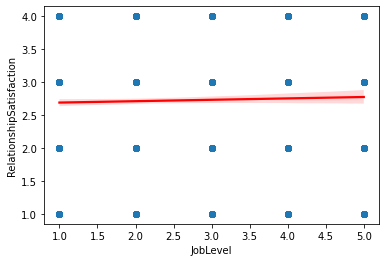

SpearmanrResult(correlation=0.011311233123622897, pvalue=0.5398275153503107)
**************************************************
148
JobLevel - StandardHours


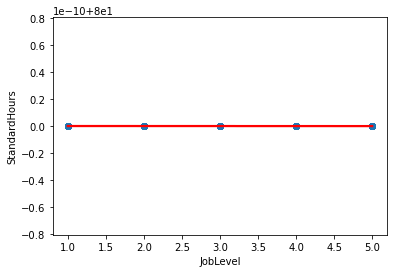

C:\Users\user\anaconda3\lib\site-packages\scipy\stats\stats.py:4484: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(SpearmanRConstantInputWarning())


SpearmanrResult(correlation=nan, pvalue=nan)
**************************************************
149
JobLevel - StockOptionLevel


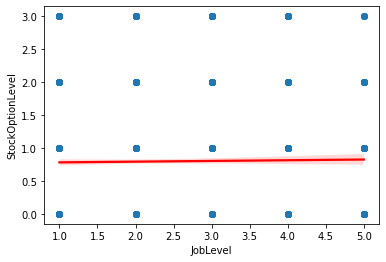

SpearmanrResult(correlation=0.04778616993274847, pvalue=0.00955782242284405)
**************************************************
150
JobLevel - TotalWorkingYears


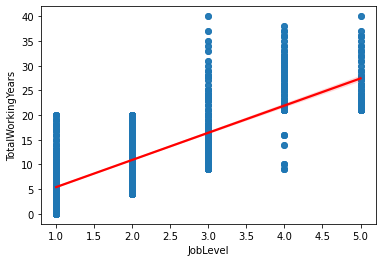

SpearmanrResult(correlation=0.734677590631887, pvalue=0.0)
**************************************************
151
JobLevel - TrainingTimesLastYear


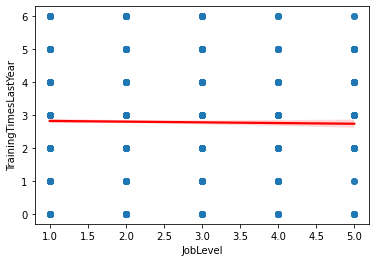

SpearmanrResult(correlation=-0.019728587905149263, pvalue=0.28490385316283634)
**************************************************
152
JobLevel - WorkLifeBalance


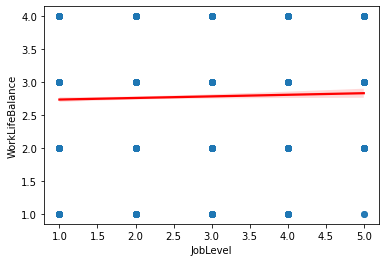

SpearmanrResult(correlation=0.04046578053521546, pvalue=0.02822881726783319)
**************************************************
153
JobLevel - YearsAtCompany


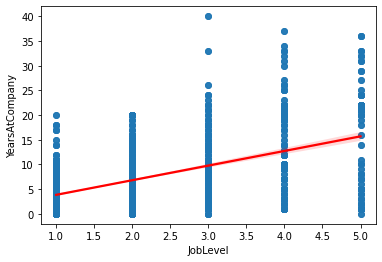

SpearmanrResult(correlation=0.4722827148585965, pvalue=3.01851203297873e-163)
**************************************************
154
JobLevel - YearsInCurrentRole


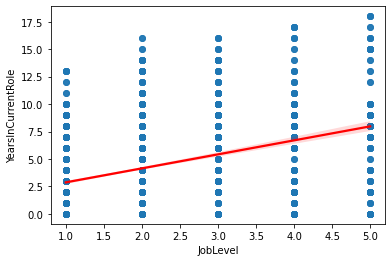

SpearmanrResult(correlation=0.39108540191924773, pvalue=4.7298174683569544e-108)
**************************************************
155
JobLevel - YearsSinceLastPromotion


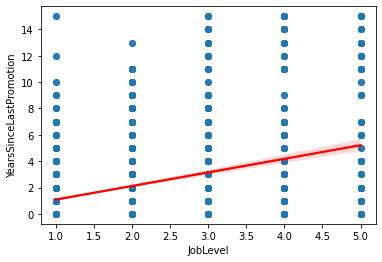

SpearmanrResult(correlation=0.2690960789349891, pvalue=6.029623561293247e-50)
**************************************************
156
JobLevel - YearsWithCurrManager


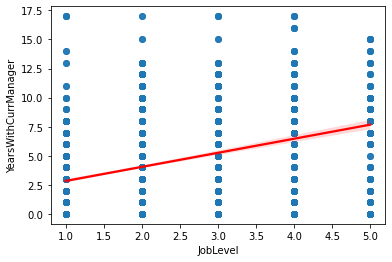

SpearmanrResult(correlation=0.3708892876663952, pvalue=1.5285968401630335e-96)
**************************************************
157
JobSatisfaction - MonthlyIncome


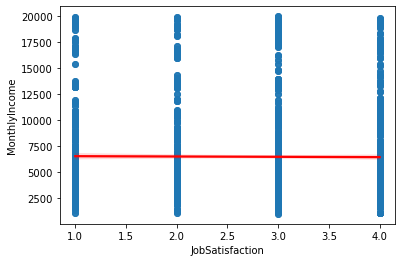

SpearmanrResult(correlation=0.004880777922211002, pvalue=0.7913689030608411)
**************************************************
158
JobSatisfaction - MonthlyRate


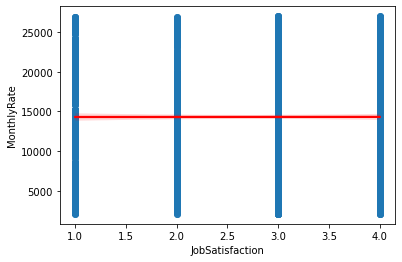

SpearmanrResult(correlation=-0.002701728793920637, pvalue=0.8835815674250264)
**************************************************
159
JobSatisfaction - NumCompaniesWorked


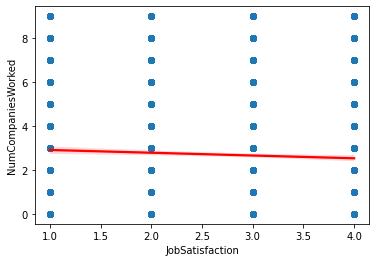

SpearmanrResult(correlation=-0.05151588893809878, pvalue=0.005206855075971512)
**************************************************
160
JobSatisfaction - PercentSalaryHike


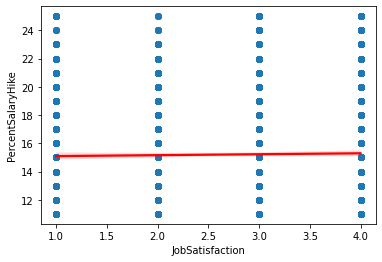

SpearmanrResult(correlation=0.023969545746785788, pvalue=0.19383924705379801)
**************************************************
161
JobSatisfaction - PerformanceRating


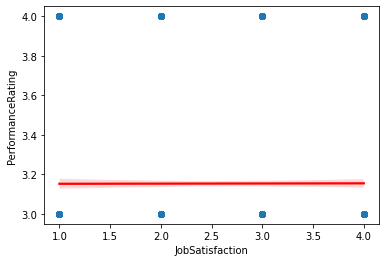

SpearmanrResult(correlation=0.006978501891054847, pvalue=0.7052594459620878)
**************************************************
162
JobSatisfaction - RelationshipSatisfaction


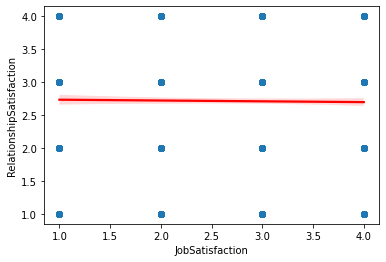

SpearmanrResult(correlation=-0.014678553829698009, pvalue=0.42626368019833094)
**************************************************
163
JobSatisfaction - StandardHours


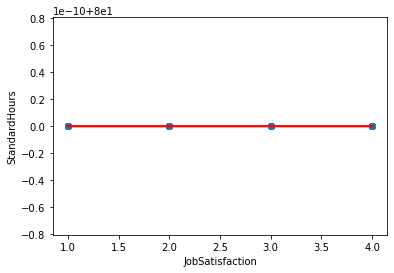

C:\Users\user\anaconda3\lib\site-packages\scipy\stats\stats.py:4484: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(SpearmanRConstantInputWarning())


SpearmanrResult(correlation=nan, pvalue=nan)
**************************************************
164
JobSatisfaction - StockOptionLevel


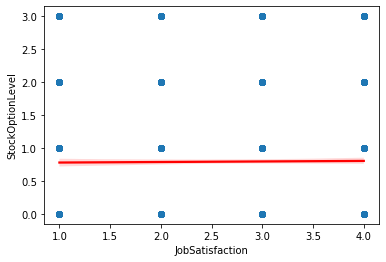

SpearmanrResult(correlation=0.012785495876862606, pvalue=0.48831853113696744)
**************************************************
165
JobSatisfaction - TotalWorkingYears


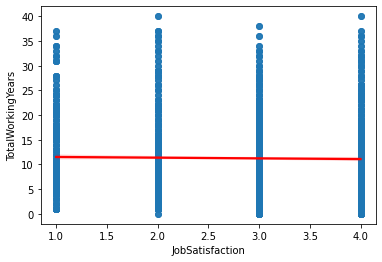

SpearmanrResult(correlation=-0.015874716751321474, pvalue=0.38954468936584286)
**************************************************
166
JobSatisfaction - TrainingTimesLastYear


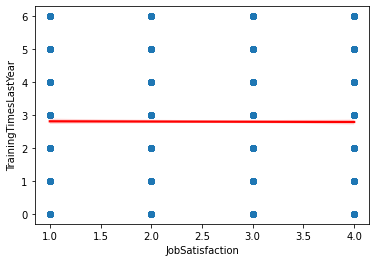

SpearmanrResult(correlation=-0.011680993270126437, pvalue=0.5266576650722188)
**************************************************
167
JobSatisfaction - WorkLifeBalance


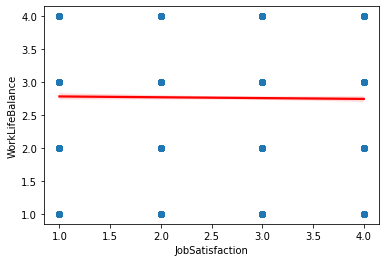

SpearmanrResult(correlation=-0.02978086277400973, pvalue=0.10643150631594465)
**************************************************
168
JobSatisfaction - YearsAtCompany


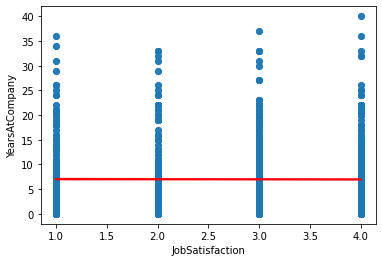

SpearmanrResult(correlation=0.012280405536957235, pvalue=0.5056621896510757)
**************************************************
169
JobSatisfaction - YearsInCurrentRole


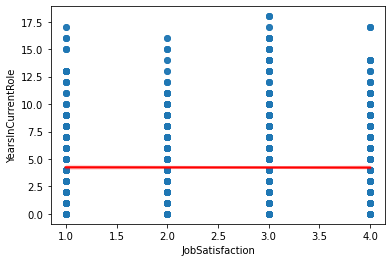

SpearmanrResult(correlation=0.0005310846240571082, pvalue=0.9770367796345009)
**************************************************
170
JobSatisfaction - YearsSinceLastPromotion


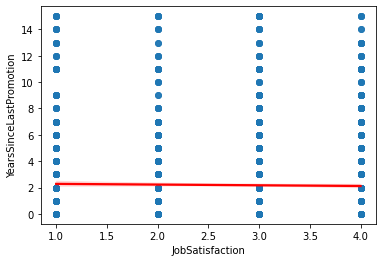

SpearmanrResult(correlation=0.007497130621585798, pvalue=0.6844924241366399)
**************************************************
171
JobSatisfaction - YearsWithCurrManager


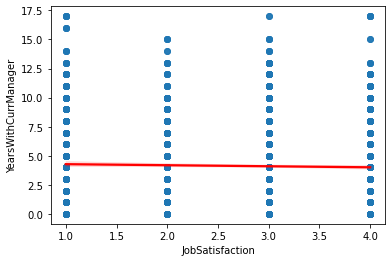

SpearmanrResult(correlation=-0.01677217932332992, pvalue=0.3633002958895457)
**************************************************
172
MonthlyIncome - MonthlyRate


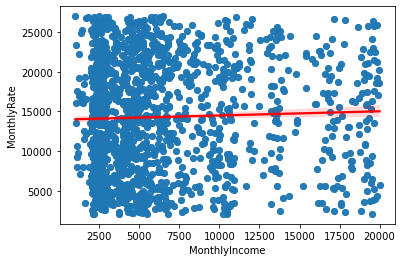

SpearmanrResult(correlation=0.05427676599185804, pvalue=0.003241039440395583)
**************************************************
173
MonthlyIncome - NumCompaniesWorked


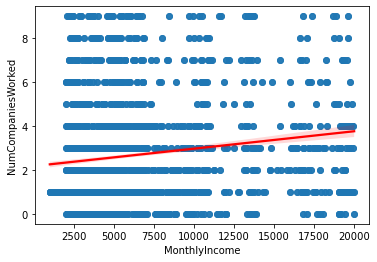

SpearmanrResult(correlation=0.1903072165077433, pvalue=2.2398528305530998e-25)
**************************************************
174
MonthlyIncome - PercentSalaryHike


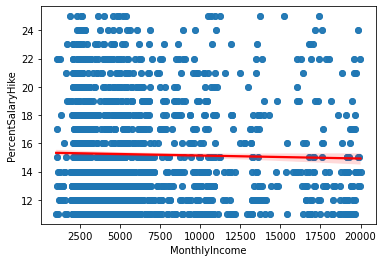

SpearmanrResult(correlation=-0.033767076407092166, pvalue=0.06715220802737629)
**************************************************
175
MonthlyIncome - PerformanceRating


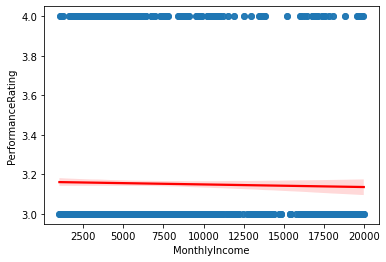

SpearmanrResult(correlation=-0.02699947515703544, pvalue=0.1433023186592473)
**************************************************
176
MonthlyIncome - RelationshipSatisfaction


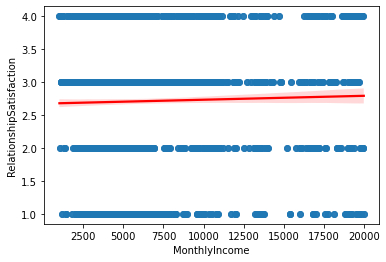

SpearmanrResult(correlation=0.003885241102559699, pvalue=0.8332182617251317)
**************************************************
177
MonthlyIncome - StandardHours


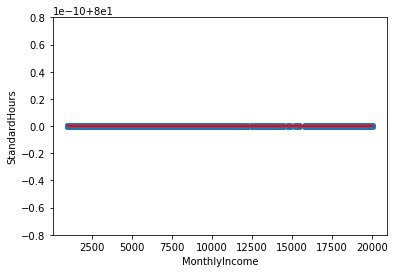

C:\Users\user\anaconda3\lib\site-packages\scipy\stats\stats.py:4484: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(SpearmanRConstantInputWarning())


SpearmanrResult(correlation=nan, pvalue=nan)
**************************************************
178
MonthlyIncome - StockOptionLevel


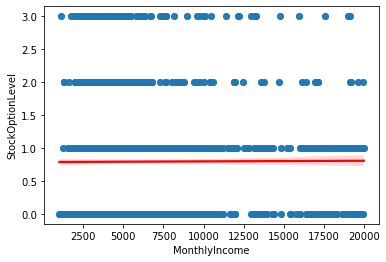

SpearmanrResult(correlation=0.045851880515603, pvalue=0.012903542489035401)
**************************************************
179
MonthlyIncome - TotalWorkingYears


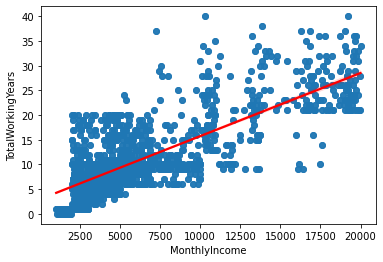

SpearmanrResult(correlation=0.7100243140565019, pvalue=0.0)
**************************************************
180
MonthlyIncome - TrainingTimesLastYear


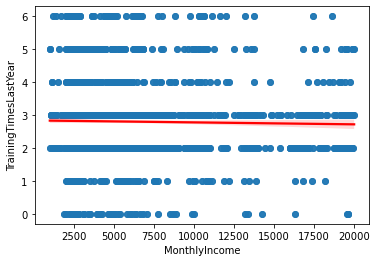

SpearmanrResult(correlation=-0.0348467617273593, pvalue=0.058861922919908286)
**************************************************
181
MonthlyIncome - WorkLifeBalance


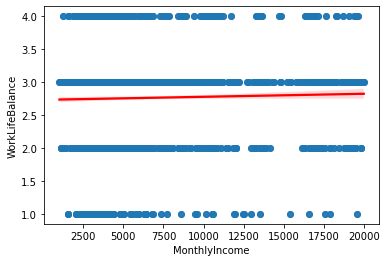

SpearmanrResult(correlation=0.0307591463106208, pvalue=0.09541491476262494)
**************************************************
182
MonthlyIncome - YearsAtCompany


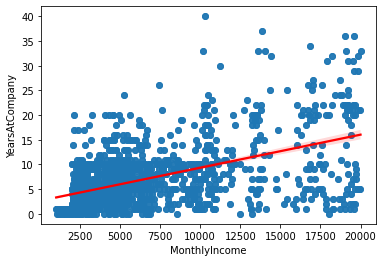

SpearmanrResult(correlation=0.464315235267433, pvalue=3.850189312796975e-157)
**************************************************
183
MonthlyIncome - YearsInCurrentRole


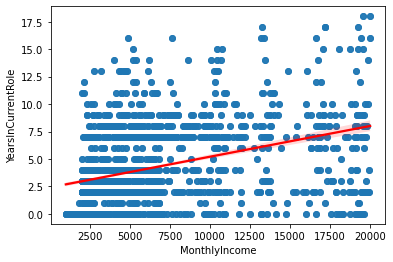

SpearmanrResult(correlation=0.3947118335315311, pvalue=3.318618057018454e-110)
**************************************************
184
MonthlyIncome - YearsSinceLastPromotion


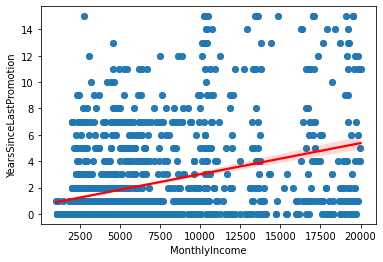

SpearmanrResult(correlation=0.26459933156915305, pvalue=2.729067337921672e-48)
**************************************************
185
MonthlyIncome - YearsWithCurrManager


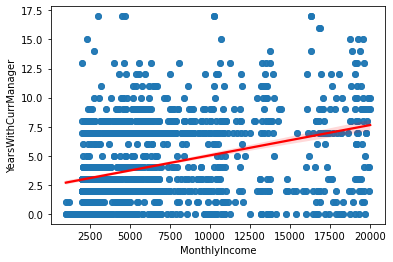

SpearmanrResult(correlation=0.36538567815872924, pvalue=1.517989298831766e-93)
**************************************************
186
MonthlyRate - NumCompaniesWorked


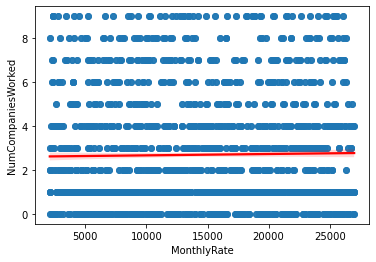

SpearmanrResult(correlation=0.019553298431607576, pvalue=0.28920608962541805)
**************************************************
187
MonthlyRate - PercentSalaryHike


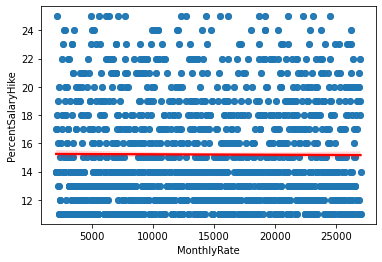

SpearmanrResult(correlation=-0.005470536871346097, pvalue=0.766849600459623)
**************************************************
188
MonthlyRate - PerformanceRating


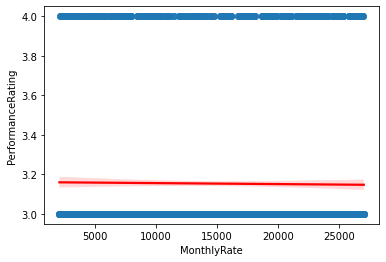

SpearmanrResult(correlation=-0.009697588341252499, pvalue=0.5991598150898105)
**************************************************
189
MonthlyRate - RelationshipSatisfaction


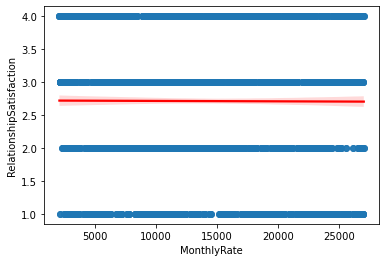

SpearmanrResult(correlation=-0.00037281483161375536, pvalue=0.9838789751686758)
**************************************************
190
MonthlyRate - StandardHours


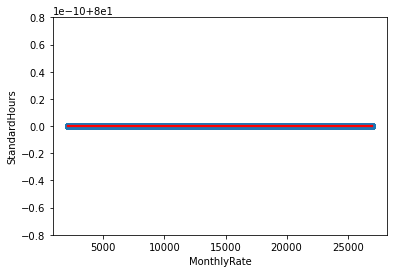

C:\Users\user\anaconda3\lib\site-packages\scipy\stats\stats.py:4484: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(SpearmanRConstantInputWarning())


SpearmanrResult(correlation=nan, pvalue=nan)
**************************************************
191
MonthlyRate - StockOptionLevel


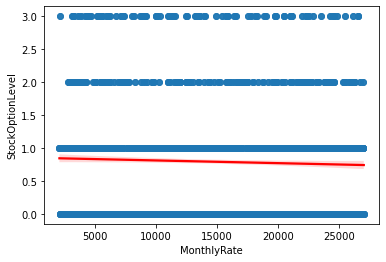

SpearmanrResult(correlation=-0.03727429363312767, pvalue=0.043287959540540544)
**************************************************
192
MonthlyRate - TotalWorkingYears


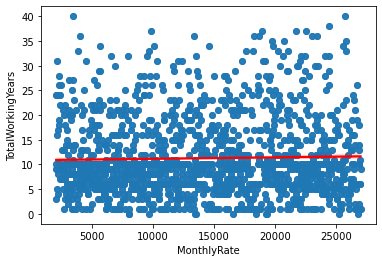

SpearmanrResult(correlation=0.013359823113769242, pvalue=0.46899361582996857)
**************************************************
193
MonthlyRate - TrainingTimesLastYear


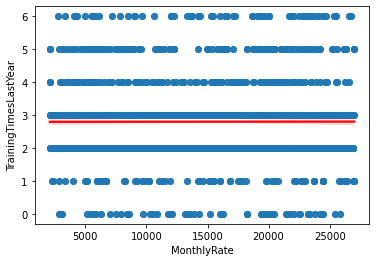

SpearmanrResult(correlation=-0.010017947191819141, pvalue=0.5871480984095045)
**************************************************
194
MonthlyRate - WorkLifeBalance


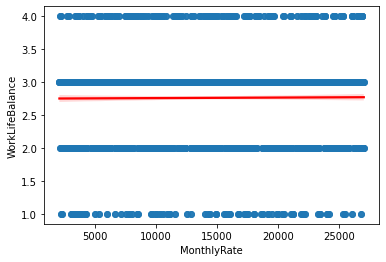

SpearmanrResult(correlation=0.006316263475298493, pvalue=0.7320974896919721)
**************************************************
195
MonthlyRate - YearsAtCompany


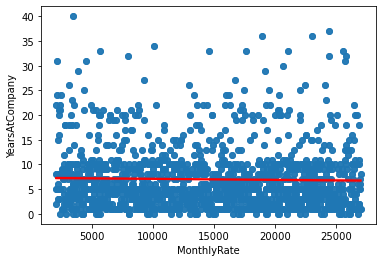

SpearmanrResult(correlation=-0.029861868063787118, pvalue=0.10548262101619223)
**************************************************
196
MonthlyRate - YearsInCurrentRole


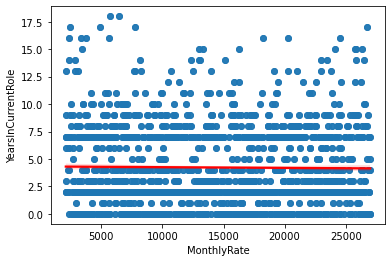

SpearmanrResult(correlation=-0.006865497271888684, pvalue=0.7098143217261388)
**************************************************
197
MonthlyRate - YearsSinceLastPromotion


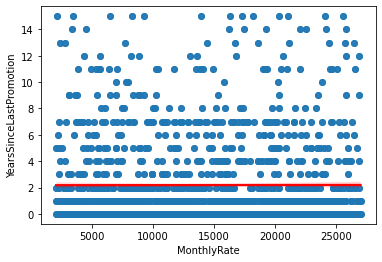

SpearmanrResult(correlation=-0.016285473404381207, pvalue=0.3773928884338066)
**************************************************
198
MonthlyRate - YearsWithCurrManager


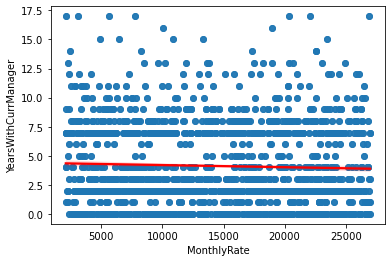

SpearmanrResult(correlation=-0.035059141800175796, pvalue=0.05733548447341179)
**************************************************
199
NumCompaniesWorked - PercentSalaryHike


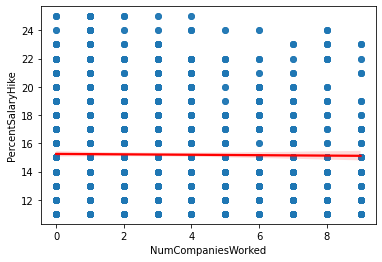

SpearmanrResult(correlation=4.628802332206085e-05, pvalue=0.9979983083291115)
**************************************************
200
NumCompaniesWorked - PerformanceRating


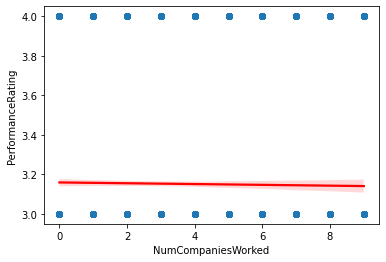

SpearmanrResult(correlation=-0.008298387395543835, pvalue=0.6528765612497115)
**************************************************
201
NumCompaniesWorked - RelationshipSatisfaction


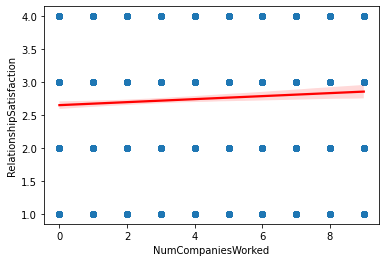

SpearmanrResult(correlation=0.040296365120478156, pvalue=0.02889629943523729)
**************************************************
202
NumCompaniesWorked - StandardHours


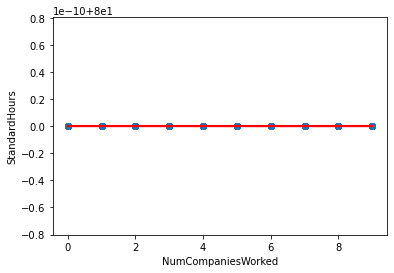

C:\Users\user\anaconda3\lib\site-packages\scipy\stats\stats.py:4484: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(SpearmanRConstantInputWarning())


SpearmanrResult(correlation=nan, pvalue=nan)
**************************************************
203
NumCompaniesWorked - StockOptionLevel


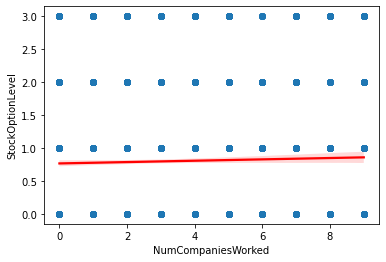

SpearmanrResult(correlation=0.032276911488446795, pvalue=0.08014889148913501)
**************************************************
204
NumCompaniesWorked - TotalWorkingYears


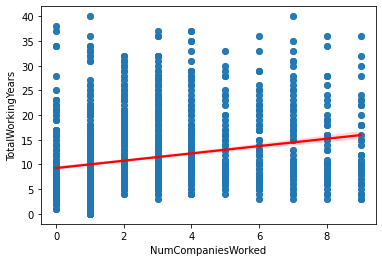

SpearmanrResult(correlation=0.3151955817929021, pvalue=8.166701759311491e-69)
**************************************************
205
NumCompaniesWorked - TrainingTimesLastYear


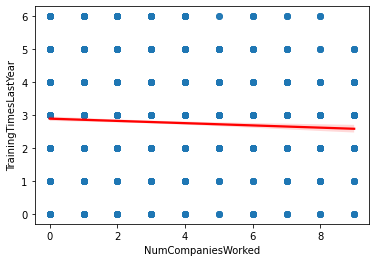

SpearmanrResult(correlation=-0.04733649411650567, pvalue=0.010257792317261543)
**************************************************
206
NumCompaniesWorked - WorkLifeBalance


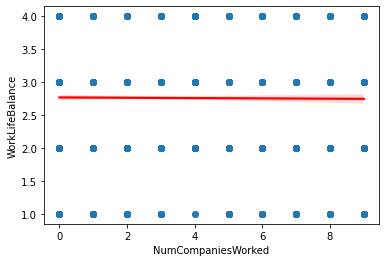

SpearmanrResult(correlation=0.009102503597596123, pvalue=0.6217623644831094)
**************************************************
207
NumCompaniesWorked - YearsAtCompany


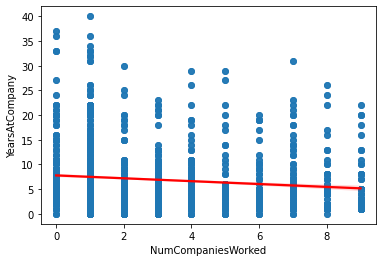

SpearmanrResult(correlation=-0.17106983096725337, pvalue=9.570186381845014e-21)
**************************************************
208
NumCompaniesWorked - YearsInCurrentRole


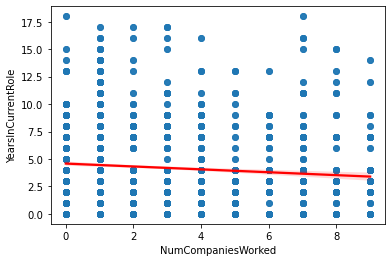

SpearmanrResult(correlation=-0.12767297617411805, pvalue=3.7007719252785116e-12)
**************************************************
209
NumCompaniesWorked - YearsSinceLastPromotion


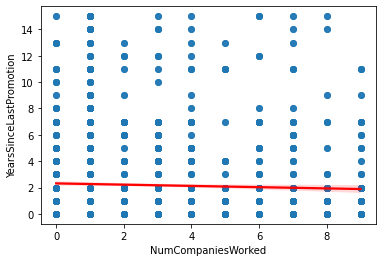

SpearmanrResult(correlation=-0.06695017895522498, pvalue=0.00028048252442536894)
**************************************************
210
NumCompaniesWorked - YearsWithCurrManager


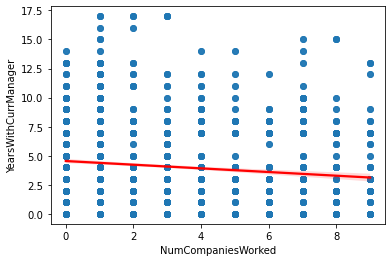

SpearmanrResult(correlation=-0.14412897573695665, pvalue=4.073812684781121e-15)
**************************************************
211
PercentSalaryHike - PerformanceRating


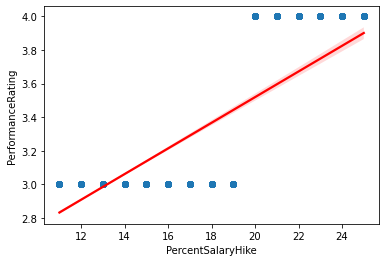

SpearmanrResult(correlation=0.6285191214366401, pvalue=6e-323)
**************************************************
212
PercentSalaryHike - RelationshipSatisfaction


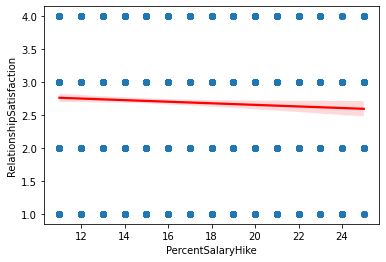

SpearmanrResult(correlation=-0.03491457267409509, pvalue=0.05837092241326124)
**************************************************
213
PercentSalaryHike - StandardHours


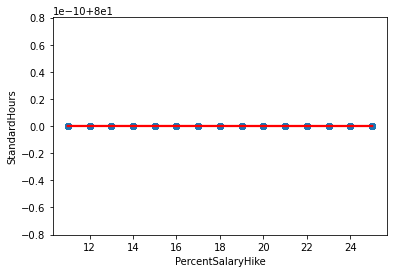

C:\Users\user\anaconda3\lib\site-packages\scipy\stats\stats.py:4484: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(SpearmanRConstantInputWarning())


SpearmanrResult(correlation=nan, pvalue=nan)
**************************************************
214
PercentSalaryHike - StockOptionLevel


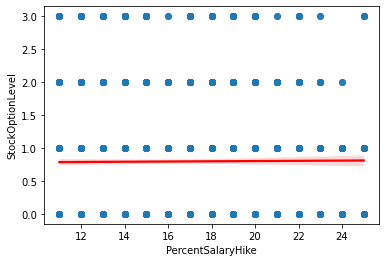

SpearmanrResult(correlation=0.02344587564437186, pvalue=0.20376035573627294)
**************************************************
215
PercentSalaryHike - TotalWorkingYears


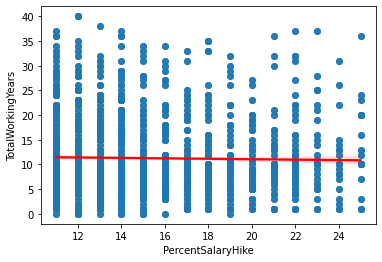

SpearmanrResult(correlation=-0.02552760406262122, pvalue=0.16642317350093055)
**************************************************
216
PercentSalaryHike - TrainingTimesLastYear


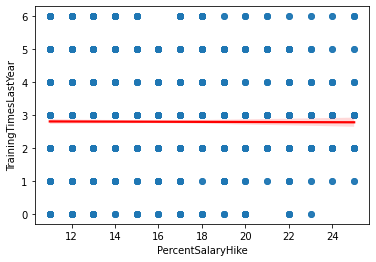

SpearmanrResult(correlation=-0.004106181723038015, pvalue=0.8238852207801378)
**************************************************
217
PercentSalaryHike - WorkLifeBalance


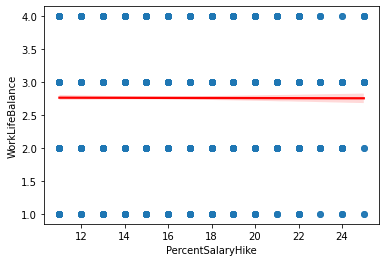

SpearmanrResult(correlation=0.0009304377038703606, pvalue=0.9597808991466596)
**************************************************
218
PercentSalaryHike - YearsAtCompany


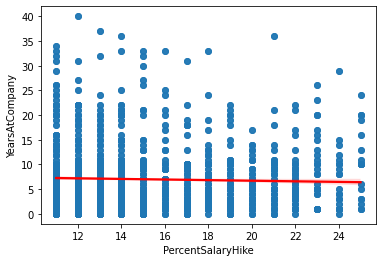

SpearmanrResult(correlation=-0.054116760663330064, pvalue=0.003333225714160845)
**************************************************
219
PercentSalaryHike - YearsInCurrentRole


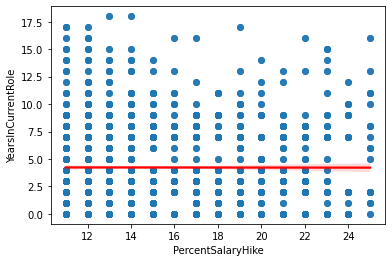

SpearmanrResult(correlation=-0.02552848046478877, pvalue=0.16640861818829197)
**************************************************
220
PercentSalaryHike - YearsSinceLastPromotion


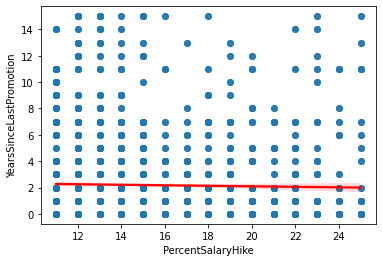

SpearmanrResult(correlation=-0.05536241929008845, pvalue=0.002674424996568049)
**************************************************
221
PercentSalaryHike - YearsWithCurrManager


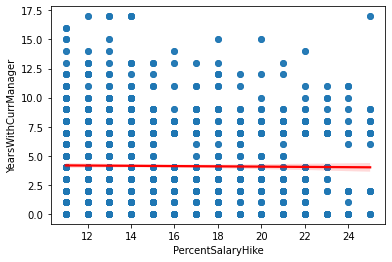

SpearmanrResult(correlation=-0.026048832231173737, pvalue=0.15793445549180873)
**************************************************
222
PerformanceRating - RelationshipSatisfaction


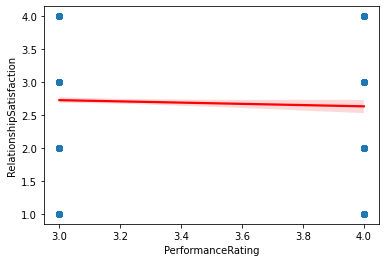

SpearmanrResult(correlation=-0.032988778872362866, pvalue=0.07370569886115454)
**************************************************
223
PerformanceRating - StandardHours


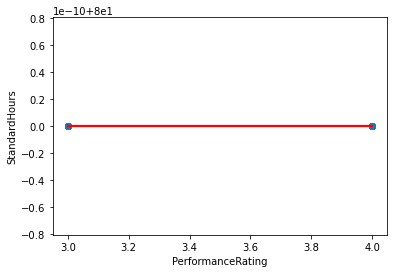

C:\Users\user\anaconda3\lib\site-packages\scipy\stats\stats.py:4484: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(SpearmanRConstantInputWarning())


SpearmanrResult(correlation=nan, pvalue=nan)
**************************************************
224
PerformanceRating - StockOptionLevel


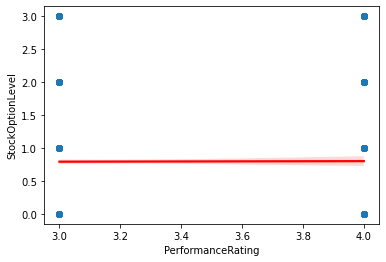

SpearmanrResult(correlation=0.011028055378024097, pvalue=0.5500237500793256)
**************************************************
225
PerformanceRating - TotalWorkingYears


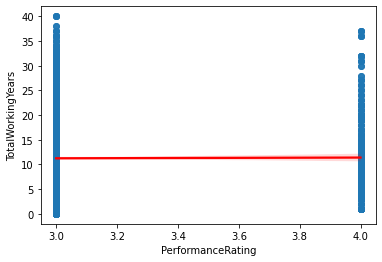

SpearmanrResult(correlation=0.011678101476226638, pvalue=0.5267600230799638)
**************************************************
226
PerformanceRating - TrainingTimesLastYear


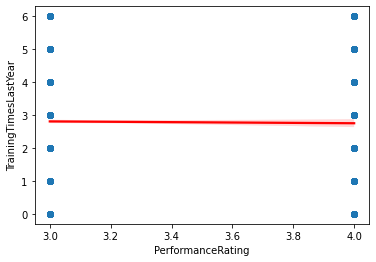

SpearmanrResult(correlation=-0.01667579207770579, pvalue=0.36606473924148053)
**************************************************
227
PerformanceRating - WorkLifeBalance


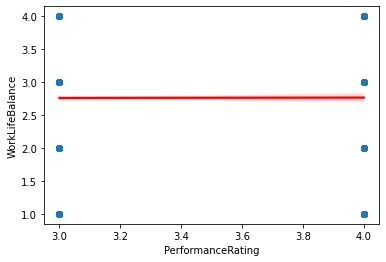

SpearmanrResult(correlation=0.006808391339126777, pvalue=0.7121200500679798)
**************************************************
228
PerformanceRating - YearsAtCompany


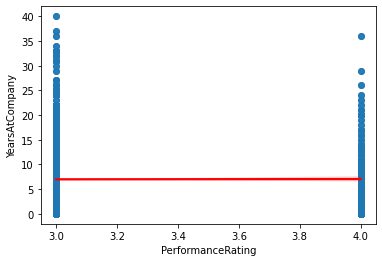

SpearmanrResult(correlation=0.01722425211316946, pvalue=0.35050950281113313)
**************************************************
229
PerformanceRating - YearsInCurrentRole


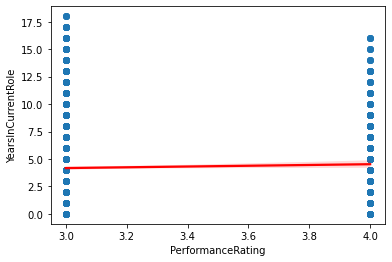

SpearmanrResult(correlation=0.032719266637528006, pvalue=0.07609344033234935)
**************************************************
230
PerformanceRating - YearsSinceLastPromotion


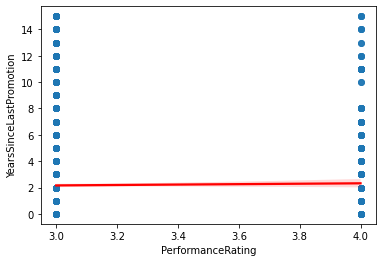

SpearmanrResult(correlation=-0.006578150349915516, pvalue=0.7214428562185642)
**************************************************
231
PerformanceRating - YearsWithCurrManager


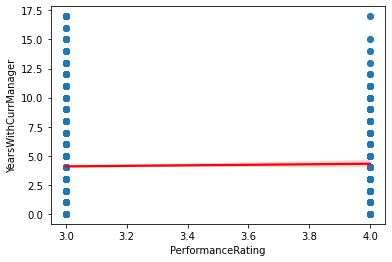

SpearmanrResult(correlation=0.025560015069465876, pvalue=0.1658855268540802)
**************************************************
232
RelationshipSatisfaction - StandardHours


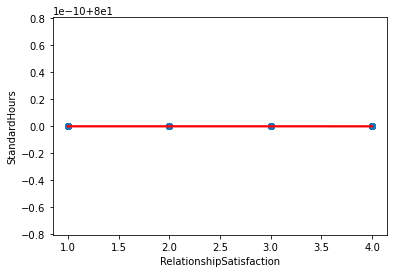

C:\Users\user\anaconda3\lib\site-packages\scipy\stats\stats.py:4484: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(SpearmanRConstantInputWarning())


SpearmanrResult(correlation=nan, pvalue=nan)
**************************************************
233
RelationshipSatisfaction - StockOptionLevel


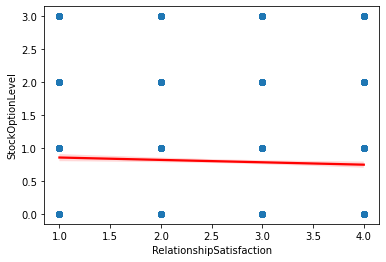

SpearmanrResult(correlation=-0.056249005170487004, pvalue=0.0022805088343899695)
**************************************************
234
RelationshipSatisfaction - TotalWorkingYears


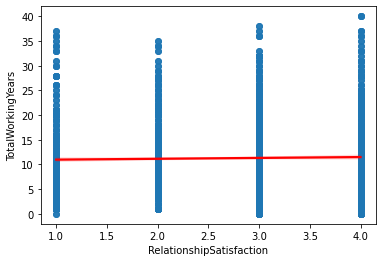

SpearmanrResult(correlation=0.003971274386427152, pvalue=0.8295811472379229)
**************************************************
235
RelationshipSatisfaction - TrainingTimesLastYear


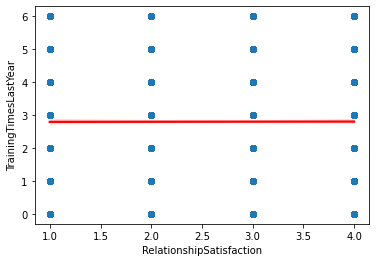

SpearmanrResult(correlation=0.005424103758106907, pvalue=0.7687719766451616)
**************************************************
236
RelationshipSatisfaction - WorkLifeBalance


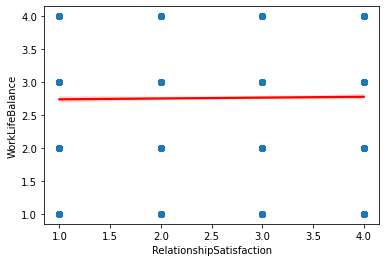

SpearmanrResult(correlation=0.01768411712636692, pvalue=0.3377949339927315)
**************************************************
237
RelationshipSatisfaction - YearsAtCompany


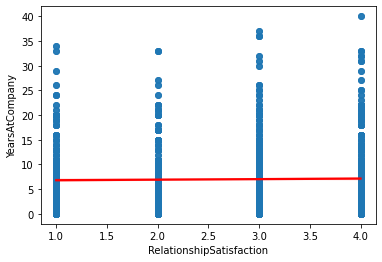

SpearmanrResult(correlation=-0.0012671613024981805, pvalue=0.9452455051675732)
**************************************************
238
RelationshipSatisfaction - YearsInCurrentRole


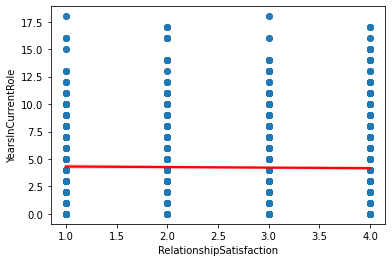

SpearmanrResult(correlation=-0.021399768792590906, pvalue=0.24605993655983266)
**************************************************
239
RelationshipSatisfaction - YearsSinceLastPromotion


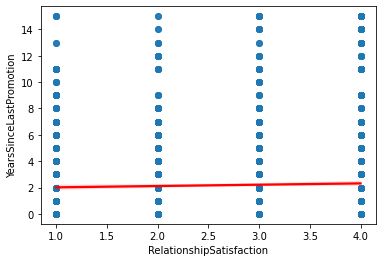

SpearmanrResult(correlation=0.03696299987028467, pvalue=0.045066668031356116)
**************************************************
240
RelationshipSatisfaction - YearsWithCurrManager


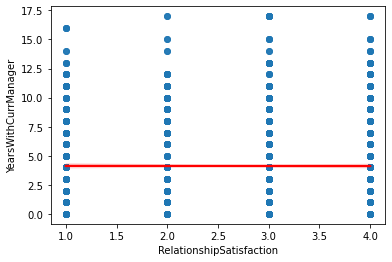

SpearmanrResult(correlation=0.00028004763837101144, pvalue=0.987889997011083)
**************************************************
241
StandardHours - StockOptionLevel


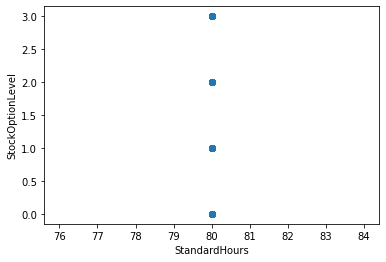

C:\Users\user\anaconda3\lib\site-packages\scipy\stats\stats.py:4484: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(SpearmanRConstantInputWarning())


SpearmanrResult(correlation=nan, pvalue=nan)
**************************************************
242
StandardHours - TotalWorkingYears


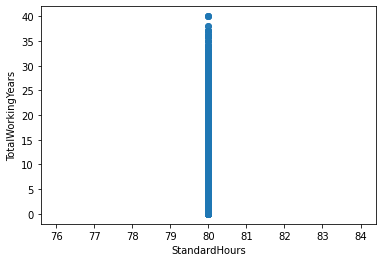

C:\Users\user\anaconda3\lib\site-packages\scipy\stats\stats.py:4484: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(SpearmanRConstantInputWarning())


SpearmanrResult(correlation=nan, pvalue=nan)
**************************************************
243
StandardHours - TrainingTimesLastYear


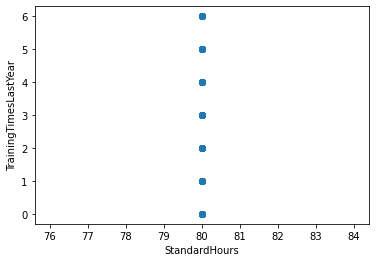

C:\Users\user\anaconda3\lib\site-packages\scipy\stats\stats.py:4484: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(SpearmanRConstantInputWarning())


SpearmanrResult(correlation=nan, pvalue=nan)
**************************************************
244
StandardHours - WorkLifeBalance


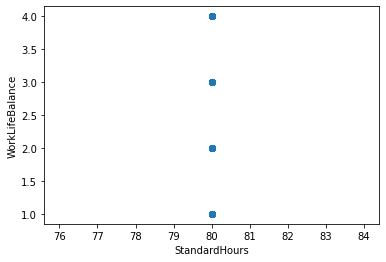

C:\Users\user\anaconda3\lib\site-packages\scipy\stats\stats.py:4484: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(SpearmanRConstantInputWarning())


SpearmanrResult(correlation=nan, pvalue=nan)
**************************************************
245
StandardHours - YearsAtCompany


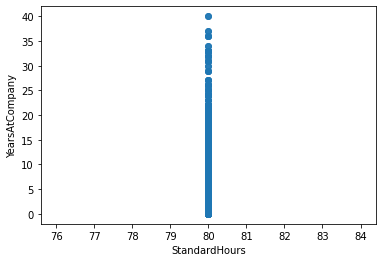

C:\Users\user\anaconda3\lib\site-packages\scipy\stats\stats.py:4484: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(SpearmanRConstantInputWarning())


SpearmanrResult(correlation=nan, pvalue=nan)
**************************************************
246
StandardHours - YearsInCurrentRole


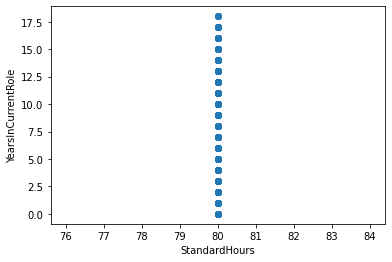

C:\Users\user\anaconda3\lib\site-packages\scipy\stats\stats.py:4484: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(SpearmanRConstantInputWarning())


SpearmanrResult(correlation=nan, pvalue=nan)
**************************************************
247
StandardHours - YearsSinceLastPromotion


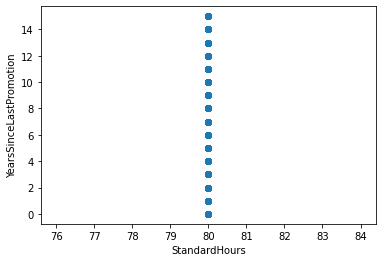

C:\Users\user\anaconda3\lib\site-packages\scipy\stats\stats.py:4484: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(SpearmanRConstantInputWarning())


SpearmanrResult(correlation=nan, pvalue=nan)
**************************************************
248
StandardHours - YearsWithCurrManager


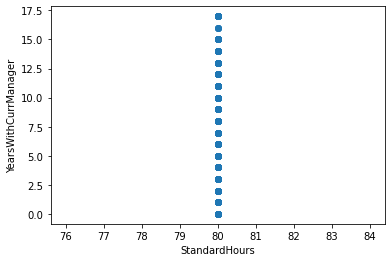

C:\Users\user\anaconda3\lib\site-packages\scipy\stats\stats.py:4484: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(SpearmanRConstantInputWarning())


SpearmanrResult(correlation=nan, pvalue=nan)
**************************************************
249
StockOptionLevel - TotalWorkingYears


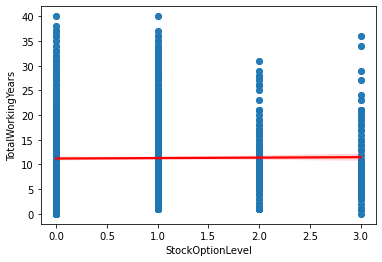

SpearmanrResult(correlation=0.05261828080374275, pvalue=0.004319701702719897)
**************************************************
250
StockOptionLevel - TrainingTimesLastYear


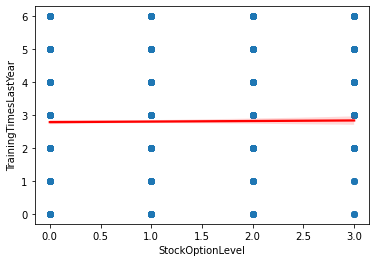

SpearmanrResult(correlation=0.0033884630610447855, pvalue=0.854287368884056)
**************************************************
251
StockOptionLevel - WorkLifeBalance


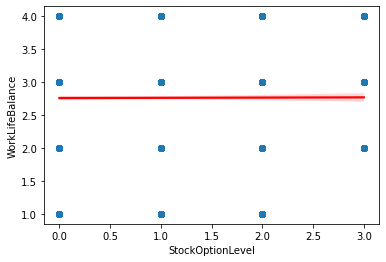

SpearmanrResult(correlation=-0.016567956327631576, pvalue=0.3691730347385045)
**************************************************
252
StockOptionLevel - YearsAtCompany


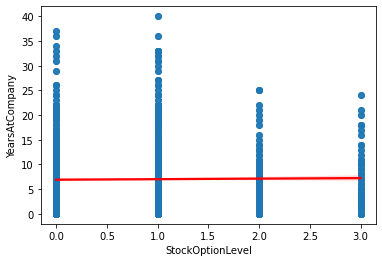

SpearmanrResult(correlation=0.064974118988158, pvalue=0.00042310147760549655)
**************************************************
253
StockOptionLevel - YearsInCurrentRole


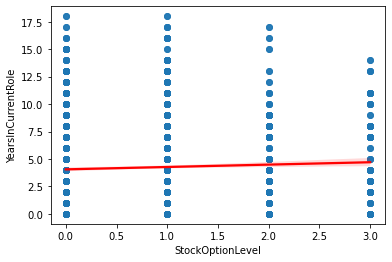

SpearmanrResult(correlation=0.0716269138419393, pvalue=0.00010145755186653339)
**************************************************
254
StockOptionLevel - YearsSinceLastPromotion


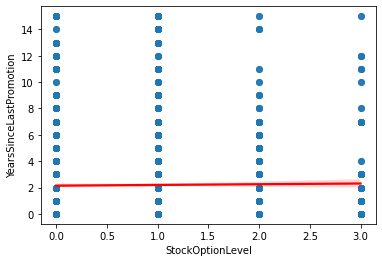

SpearmanrResult(correlation=0.02750239045426186, pvalue=0.13599404268890322)
**************************************************
255
StockOptionLevel - YearsWithCurrManager


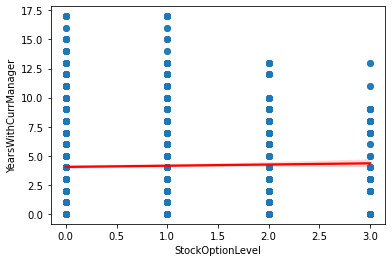

SpearmanrResult(correlation=0.05364618774775645, pvalue=0.003618344495066076)
**************************************************
256
TotalWorkingYears - TrainingTimesLastYear


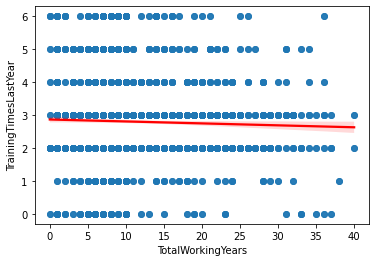

SpearmanrResult(correlation=-0.014150577504081238, pvalue=0.44309255738913433)
**************************************************
257
TotalWorkingYears - WorkLifeBalance


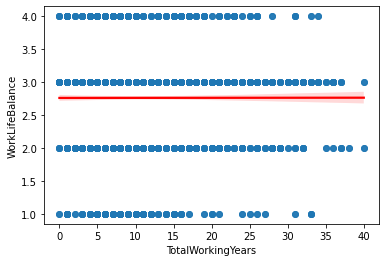

SpearmanrResult(correlation=0.003004073925814106, pvalue=0.8706622901757061)
**************************************************
258
TotalWorkingYears - YearsAtCompany


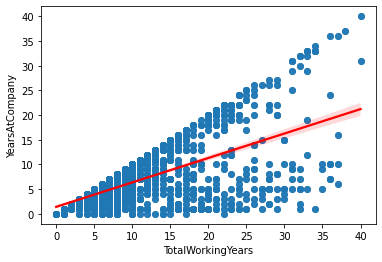

SpearmanrResult(correlation=0.5941932530497811, pvalue=3.5266088296286554e-280)
**************************************************
259
TotalWorkingYears - YearsInCurrentRole


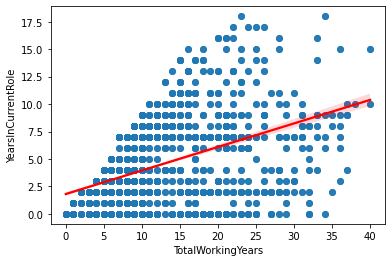

SpearmanrResult(correlation=0.4927213241597057, pvalue=1.1398452415999315e-179)
**************************************************
260
TotalWorkingYears - YearsSinceLastPromotion


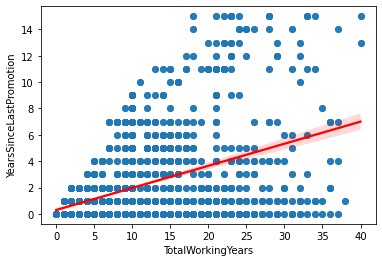

SpearmanrResult(correlation=0.33499564034684404, pvalue=5.020564464189116e-78)
**************************************************
261
TotalWorkingYears - YearsWithCurrManager


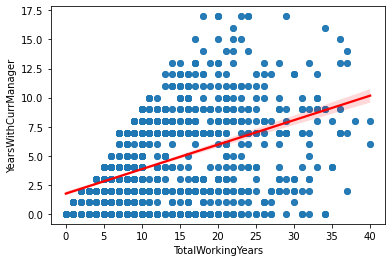

SpearmanrResult(correlation=0.4952541030022398, pvalue=8.767467032016229e-182)
**************************************************
262
TrainingTimesLastYear - WorkLifeBalance


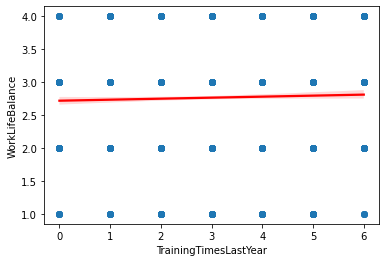

SpearmanrResult(correlation=0.023689557478749526, pvalue=0.19909870313513292)
**************************************************
263
TrainingTimesLastYear - YearsAtCompany


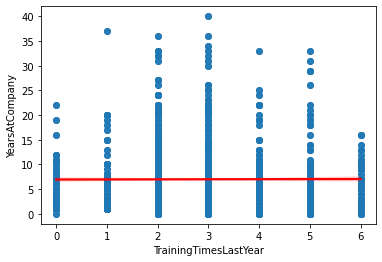

SpearmanrResult(correlation=0.0013893446989500773, pvalue=0.9399754445047762)
**************************************************
264
TrainingTimesLastYear - YearsInCurrentRole


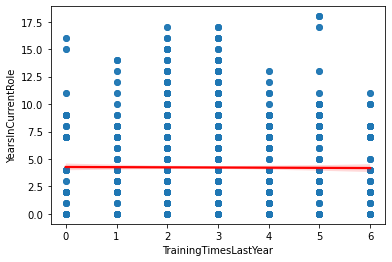

SpearmanrResult(correlation=0.004581056899978891, pvalue=0.8039110631518978)
**************************************************
265
TrainingTimesLastYear - YearsSinceLastPromotion


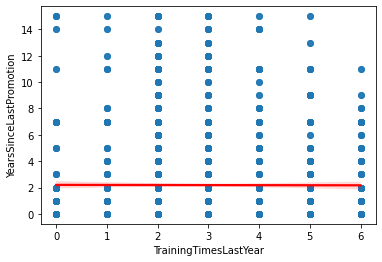

SpearmanrResult(correlation=0.010215434571595529, pvalue=0.5797993642457051)
**************************************************
266
TrainingTimesLastYear - YearsWithCurrManager


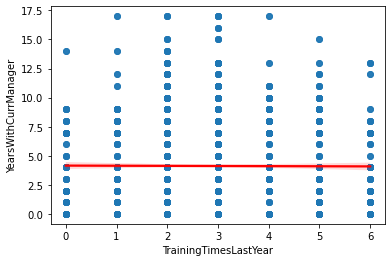

SpearmanrResult(correlation=-0.011627540754936615, pvalue=0.5285513105371829)
**************************************************
267
WorkLifeBalance - YearsAtCompany


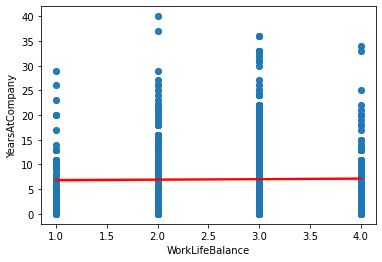

SpearmanrResult(correlation=0.004675134423995748, pvalue=0.7999686824425344)
**************************************************
268
WorkLifeBalance - YearsInCurrentRole


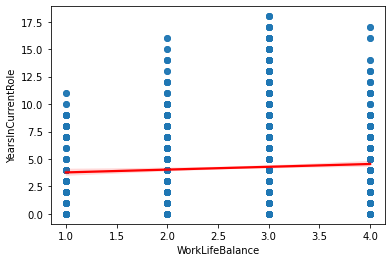

SpearmanrResult(correlation=0.02321426053163883, pvalue=0.2082642980325079)
**************************************************
269
WorkLifeBalance - YearsSinceLastPromotion


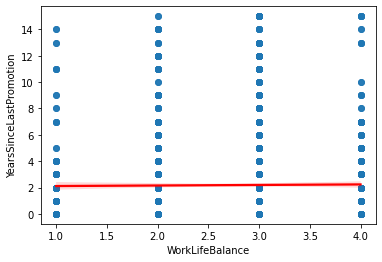

SpearmanrResult(correlation=0.002151110486416443, pvalue=0.9071869073761648)
**************************************************
270
WorkLifeBalance - YearsWithCurrManager


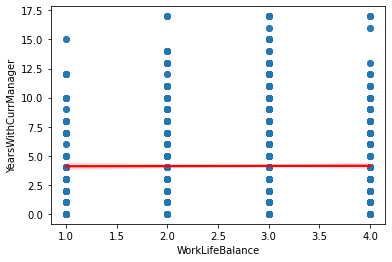

SpearmanrResult(correlation=-0.004590570131052262, pvalue=0.8035121764607134)
**************************************************
271
YearsAtCompany - YearsInCurrentRole


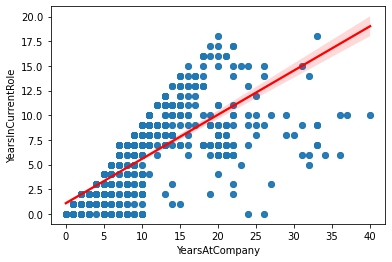

SpearmanrResult(correlation=0.8539995332892505, pvalue=0.0)
**************************************************
272
YearsAtCompany - YearsSinceLastPromotion


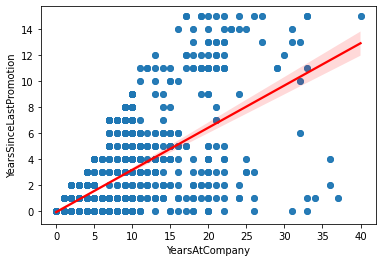

SpearmanrResult(correlation=0.5199664440864266, pvalue=2.2574937631789918e-203)
**************************************************
273
YearsAtCompany - YearsWithCurrManager


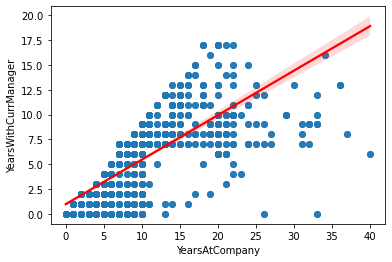

SpearmanrResult(correlation=0.8428033421828458, pvalue=0.0)
**************************************************
274
YearsInCurrentRole - YearsSinceLastPromotion


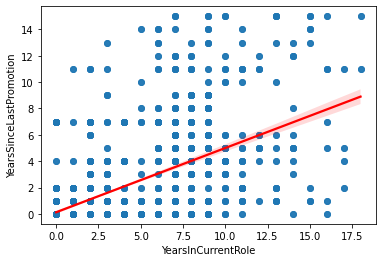

SpearmanrResult(correlation=0.5056565032149037, pvalue=1.1783936270957429e-190)
**************************************************
275
YearsInCurrentRole - YearsWithCurrManager


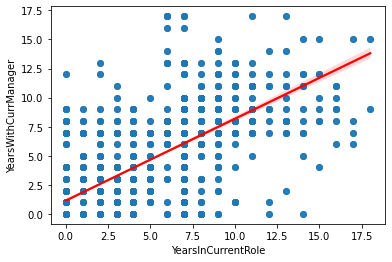

SpearmanrResult(correlation=0.7247542192761358, pvalue=0.0)
**************************************************
276
YearsSinceLastPromotion - YearsWithCurrManager


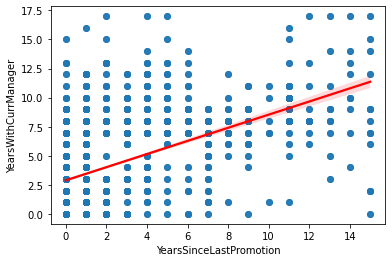

SpearmanrResult(correlation=0.4667127452145146, pvalue=5.823845014617715e-159)
**************************************************


In [10]:
start = time.time()
done = []
a = 1
for x in employee_num.columns:
    for y in employee_num.columns:
        if x != y:
            if [y,x] not in done:
                print(a)
                print('{} - {}'.format(x,y))
    
                sns.regplot(data= employee_num, x=x, y=y, line_kws = {'color':'red'})
                plt.show()
                
                stats, pvalue = normaltest(employee_num[x])
                stats2, pvalue2 = normaltest(employee_num[y])
                if pvalue > 0.05:
                    if pvalue2 > 0.05:
                        print(pearsonr(employee_num[x], employee_num[y]))
                else:
                    print(spearmanr(employee_num[x], employee_num[y]))
                    
                print('*' * 50)
                a += 1
                done.append([x,y])
end = time.time()

we can see plot about correlation between numeric column with normal test

now, we do an t-test, with argue:<br>
    a. confidence interval 95%<br>
    b. alpha = 5%<br>
    c. H(0): mean variabel numeric attrited group = mean variabel numeric non-attrited group;<br>
    d. H(1): mean variabel numeric attrited group ≠ mean variabel numeric non-attrited group.

In [11]:
employee[employee['Attrition'] =='No']

EmployeeNumber Attrition  Age     BusinessTravel  DailyRate  \
1                  2        No   49  Travel_Frequently        279   
3                  4        No   33  Travel_Frequently       1392   
4                  5        No   27      Travel_Rarely        591   
5                  6        No   32  Travel_Frequently       1005   
6                  7        No   59      Travel_Rarely       1324   
...              ...       ...  ...                ...        ...   
2935            2936        No   36  Travel_Frequently        884   
2936            2937        No   39      Travel_Rarely        613   
2937            2938        No   27      Travel_Rarely        155   
2938            2939        No   49  Travel_Frequently       1023   
2939            2940        No   34      Travel_Rarely        628   

                  Department  DistanceFromHome  Education EducationField  \
1     Research & Development                 8          1  Life Sciences   
3     Research & Development                 3          4  Life Sciences   
4     Research & Development                 2          1        Medical   
5     Research & Development                 2          2  Life Sciences   
6     Research & Development                 3          3        Medical   
...                      ...               ...        ...            ...   
2935  Research & Development                23          2        Medical   
2936  Research & Development                 6          1        Medical   
2937  Research & Development                 4          3  Life Sciences   
2938                   Sales                 2          3        Medical   
2939  Research & Development                 8          3        Medical   

      EnvironmentSatisfaction  Gender  HourlyRate  JobInvolvement  JobLevel  \
1                           3    Male          61               2         2   
3                           4  Female          56               3         1   
4                           1    Male          40               3         1   
5                           4    Male          79               3         1   
6                           3  Female          81               4         1   
...                       ...     ...         ...             ...       ...   
2935                        3    Male          41               4         2   
2936                        4    Male          42               2         3   
2937                        2    Male          87               4         2   
2938                        4    Male          63               2         2   
2939                        2    Male          82               4         2   

                        JobRole  JobSatisfaction MaritalStatus  MonthlyIncome  \
1            Research Scientist                2       Married           5130   
3            Research Scientist                3       Married           2909   
4         Laboratory Technician                2       Married           3468   
5         Laboratory Technician                4        Single           3068   
6         Laboratory Technician                1       Married           2670   
...                         ...              ...           ...            ...   
2935      Laboratory Technician                4       Married           2571   
2936  Healthcare Representative                1       Married           9991   
2937     Manufacturing Director                2       Married           6142   
2938            Sales Executive                2       Married           5390   
2939      Laboratory Technician                3       Married           4404   

      MonthlyRate  NumCompaniesWorked Over18 OverTime  PercentSalaryHike  \
1           24907                   1      Y       No                 23   
3           23159                   1      Y      Yes                 11   
4           16632                   9      Y       No                 12   
5           11864                   0 

In [12]:
n = len(employee[employee['Attrition'] =='No']) - 1
n

2465

1


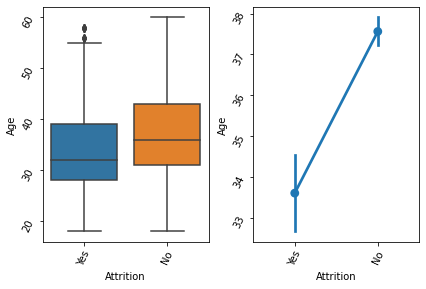

Confidence interval 95% untuk fitur Age pada karyawan yang meninggalkan perusahaan adalah (33.22451677718589, 33.99067309623184)
Confidence interval 95% untuk fitur Age pada karyawan yang tidak meninggalkan perusahaan adalah (37.21024946431787, 37.91221606690678)
Tolak H0
**************************************************
2


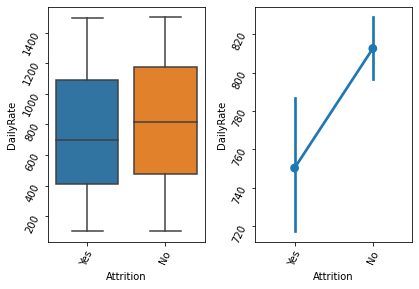

Confidence interval 95% untuk fitur DailyRate pada karyawan yang meninggalkan perusahaan adalah (734.4733688839761, 766.2523695126482)
Confidence interval 95% untuk fitur DailyRate pada karyawan yang tidak meninggalkan perusahaan adalah (796.5825799591622, 828.4263413709269)
Tolak H0
**************************************************
3


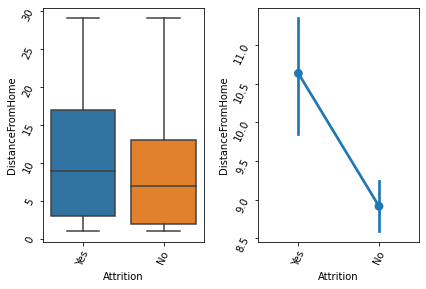

Confidence interval 95% untuk fitur DistanceFromHome pada karyawan yang meninggalkan perusahaan adalah (10.298732334092866, 10.96709045071726)
Confidence interval 95% untuk fitur DistanceFromHome pada karyawan yang tidak meninggalkan perusahaan adalah (8.59925024189839, 9.232055516414666)
Tolak H0
**************************************************
4


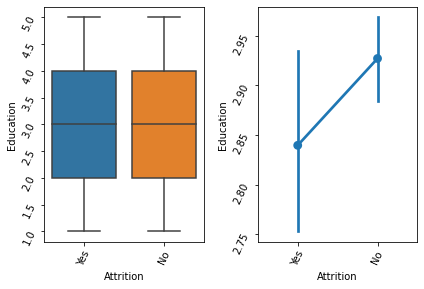

Confidence interval 95% untuk fitur Education pada karyawan yang meninggalkan perusahaan adalah (2.7998005130356223, 2.879524381479146)
Confidence interval 95% untuk fitur Education pada karyawan yang tidak meninggalkan perusahaan adalah (2.8864530825667134, 2.9675615159734323)
Gagal menolak H0
**************************************************
5


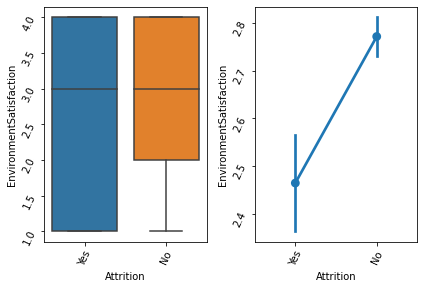

Confidence interval 95% untuk fitur EnvironmentSatisfaction pada karyawan yang meninggalkan perusahaan adalah (2.4178861503209643, 2.5103838918731287)
Confidence interval 95% untuk fitur EnvironmentSatisfaction pada karyawan yang tidak meninggalkan perusahaan adalah (2.72899269694996, 2.813586378475831)
Tolak H0
**************************************************
6


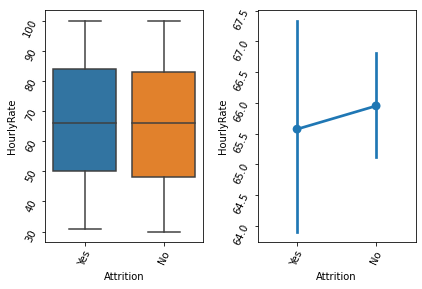

Confidence interval 95% untuk fitur HourlyRate pada karyawan yang meninggalkan perusahaan adalah (64.77916769274927, 66.36851163214524)
Confidence interval 95% untuk fitur HourlyRate pada karyawan yang tidak meninggalkan perusahaan adalah (65.14735460070932, 66.75694385833367)
Gagal menolak H0
**************************************************
7


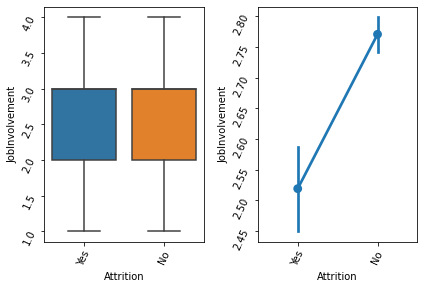

Confidence interval 95% untuk fitur JobInvolvement pada karyawan yang meninggalkan perusahaan adalah (2.488410009941586, 2.549564673602718)
Confidence interval 95% untuk fitur JobInvolvement pada karyawan yang tidak meninggalkan perusahaan adalah (2.7431508641641833, 2.797806151245387)
Tolak H0
**************************************************
8


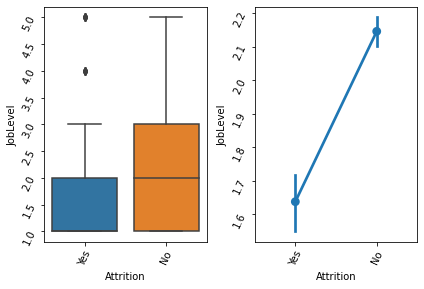

Confidence interval 95% untuk fitur JobLevel pada karyawan yang meninggalkan perusahaan adalah (1.5999434734029365, 1.6743181299725909)
Confidence interval 95% untuk fitur JobLevel pada karyawan yang tidak meninggalkan perusahaan adalah (2.1018404839862046, 2.190130318933503)
Tolak H0
**************************************************
9


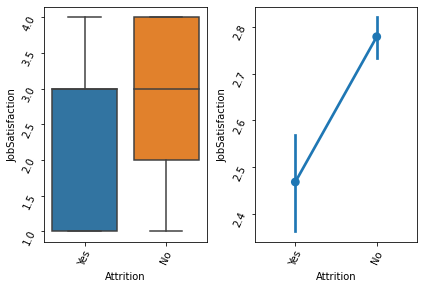

Confidence interval 95% untuk fitur JobSatisfaction pada karyawan yang meninggalkan perusahaan adalah (2.424150887715188, 2.5125579730443053)
Confidence interval 95% untuk fitur JobSatisfaction pada karyawan yang tidak meninggalkan perusahaan adalah (2.73541750169779, 2.821760113873986)
Tolak H0
**************************************************
10


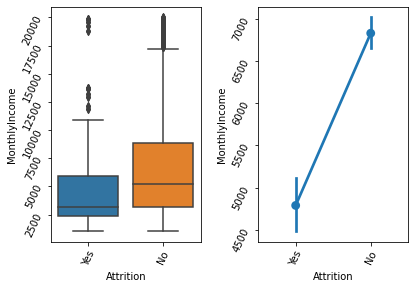

Confidence interval 95% untuk fitur MonthlyIncome pada karyawan yang meninggalkan perusahaan adalah (4643.1734616425065, 4931.012192365933)
Confidence interval 95% untuk fitur MonthlyIncome pada karyawan yang tidak meninggalkan perusahaan adalah (6642.478402432865, 7023.000916301929)
Tolak H0
**************************************************
11


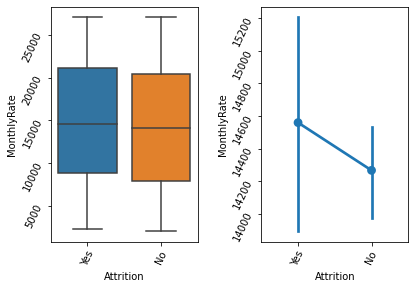

Confidence interval 95% untuk fitur MonthlyRate pada karyawan yang meninggalkan perusahaan adalah (14274.326453022404, 14844.289580732871)
Confidence interval 95% untuk fitur MonthlyRate pada karyawan yang tidak meninggalkan perusahaan adalah (13985.325534619382, 14546.233265056208)
Gagal menolak H0
**************************************************
12


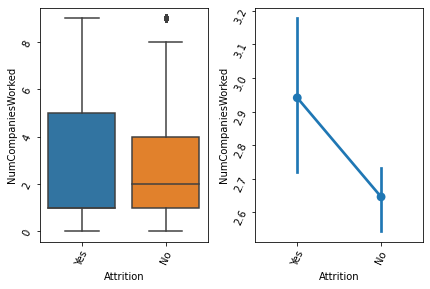

Confidence interval 95% untuk fitur NumCompaniesWorked pada karyawan yang meninggalkan perusahaan adalah (2.8350303528991043, 3.0468261871852835)
Confidence interval 95% untuk fitur NumCompaniesWorked pada karyawan yang tidak meninggalkan perusahaan adalah (2.548435913439608, 2.7427238594719894)
Tolak H0
**************************************************
13


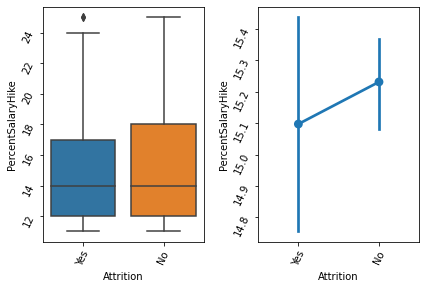

Confidence interval 95% untuk fitur PercentSalaryHike pada karyawan yang meninggalkan perusahaan adalah (14.947984053408742, 15.246108773595477)
Confidence interval 95% untuk fitur PercentSalaryHike pada karyawan yang tidak meninggalkan perusahaan adalah (15.087426637516698, 15.374860467106172)
Gagal menolak H0
**************************************************
14


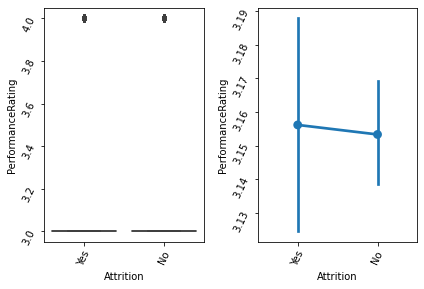

Confidence interval 95% untuk fitur PerformanceRating pada karyawan yang meninggalkan perusahaan adalah (3.141737496042554, 3.1704987908772773)
Confidence interval 95% untuk fitur PerformanceRating pada karyawan yang tidak meninggalkan perusahaan adalah (3.1390528962962554, 3.1675164467694383)
Gagal menolak H0
**************************************************
15


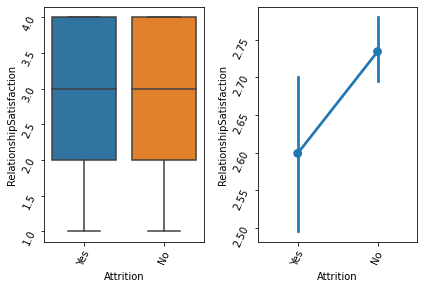

Confidence interval 95% untuk fitur RelationshipSatisfaction pada karyawan yang meninggalkan perusahaan adalah (2.554660820549564, 2.6436514157373554)
Confidence interval 95% untuk fitur RelationshipSatisfaction pada karyawan yang tidak meninggalkan perusahaan adalah (2.691666730775912, 2.7762975839037316)
Tolak H0
**************************************************
16


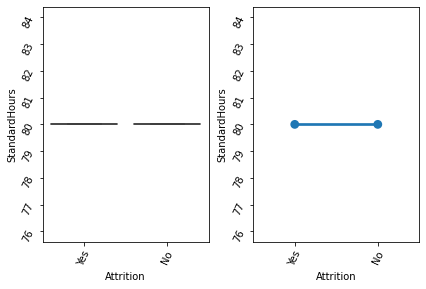

C:\Users\user\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:2128: RuntimeWarning: invalid value encountered in multiply
  lower_bound = _a * scale + loc
C:\Users\user\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:2129: RuntimeWarning: invalid value encountered in multiply
  upper_bound = _b * scale + loc


Confidence interval 95% untuk fitur StandardHours pada karyawan yang meninggalkan perusahaan adalah (nan, nan)
Confidence interval 95% untuk fitur StandardHours pada karyawan yang tidak meninggalkan perusahaan adalah (nan, nan)
Gagal menolak H0
**************************************************
17


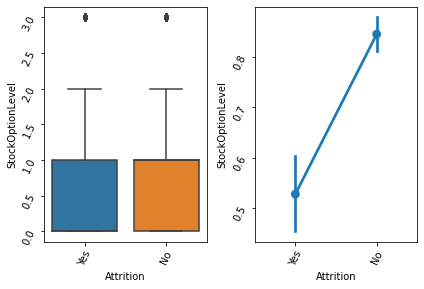

Confidence interval 95% untuk fitur StockOptionLevel pada karyawan yang meninggalkan perusahaan adalah (0.49356905544982066, 0.5612832652252848)
Confidence interval 95% untuk fitur StockOptionLevel pada karyawan yang tidak meninggalkan perusahaan adalah (0.8118449838913262, 0.8783415530105392)
Tolak H0
**************************************************
18


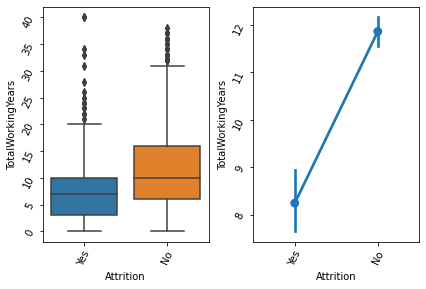

Confidence interval 95% untuk fitur TotalWorkingYears pada karyawan yang meninggalkan perusahaan adalah (7.961284081928851, 8.528167394864399)
Confidence interval 95% untuk fitur TotalWorkingYears pada karyawan yang tidak meninggalkan perusahaan adalah (11.556480873734934, 12.169390983523783)
Tolak H0
**************************************************
19


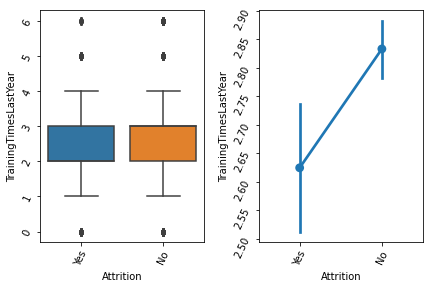

Confidence interval 95% untuk fitur TrainingTimesLastYear pada karyawan yang meninggalkan perusahaan adalah (2.5748634242288126, 2.674081723450512)
Confidence interval 95% untuk fitur TrainingTimesLastYear pada karyawan yang tidak meninggalkan perusahaan adalah (2.781846759716183, 2.8840088769423735)
Tolak H0
**************************************************
20


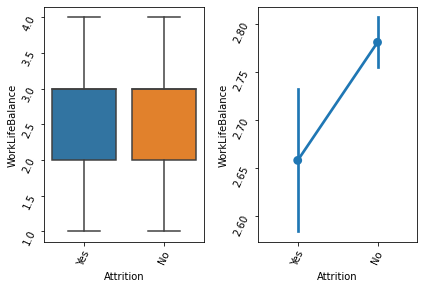

Confidence interval 95% untuk fitur WorkLifeBalance pada karyawan yang meninggalkan perusahaan adalah (2.6259485689074986, 2.690507127295033)
Confidence interval 95% untuk fitur WorkLifeBalance pada karyawan yang tidak meninggalkan perusahaan adalah (2.7540947878316753, 2.8079490077887628)
Tolak H0
**************************************************
21


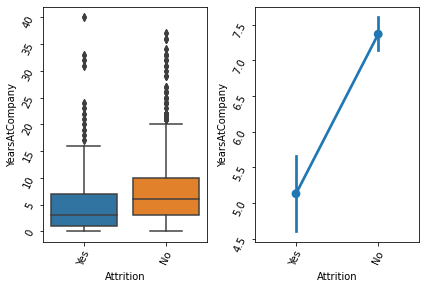

Confidence interval 95% untuk fitur YearsAtCompany pada karyawan yang meninggalkan perusahaan adalah (4.895563105638365, 5.366040269889062)
Confidence interval 95% untuk fitur YearsAtCompany pada karyawan yang tidak meninggalkan perusahaan adalah (7.12828821046065, 7.609749096919724)
Tolak H0
**************************************************
22


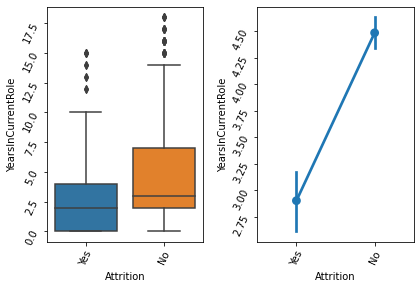

Confidence interval 95% untuk fitur YearsInCurrentRole pada karyawan yang meninggalkan perusahaan adalah (2.777433627355131, 3.0284735456406495)
Confidence interval 95% untuk fitur YearsInCurrentRole pada karyawan yang tidak meninggalkan perusahaan adalah (4.340077438066079, 4.628292391617619)
Tolak H0
**************************************************
23


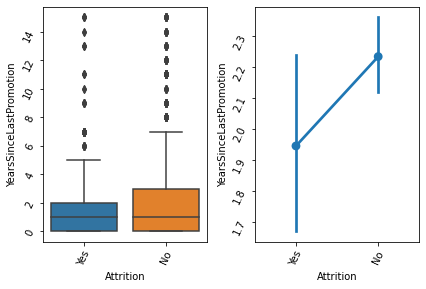

Confidence interval 95% untuk fitur YearsSinceLastPromotion pada karyawan yang meninggalkan perusahaan adalah (1.820487625139347, 2.069807733510442)
Confidence interval 95% untuk fitur YearsSinceLastPromotion pada karyawan yang tidak meninggalkan perusahaan adalah (2.1066534759618336, 2.3621218687259202)
Gagal menolak H0
**************************************************
24


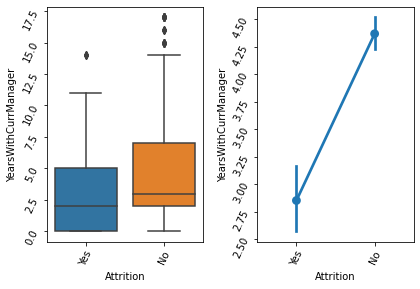

Confidence interval 95% untuk fitur YearsWithCurrManager pada karyawan yang meninggalkan perusahaan adalah (2.7280452354543274, 2.9765961147566427)
Confidence interval 95% untuk fitur YearsWithCurrManager pada karyawan yang tidak meninggalkan perusahaan adalah (4.225472245397509, 4.509320941950423)
Tolak H0
**************************************************


In [13]:
a = 1

for col in employee_num.columns:
    print(a)
    fig, ax = plt.subplots(1,2)
    
    sns.boxplot(data = employee, x='Attrition', y=col, ax=ax[0])
    sns.pointplot(data = employee, x='Attrition', y=col, ax=ax[1])
    plt.tight_layout()
    ax[0].tick_params(rotation=65)
    ax[1].tick_params(rotation=65)
    plt.show()

    ci1 = t.interval(alpha = 0.95,
                    df = len(employee[employee['Attrition'] =='Yes']) - 1,
                    loc = employee[employee['Attrition'] =='Yes'][col].mean(), 
                    scale = employee[employee['Attrition'] =='Yes'][col].std()/(n**(1/2)))
    print('Confidence interval 95% untuk fitur {} pada karyawan yang meninggalkan perusahaan adalah {}'.format(col, ci1))
    
    ci2 = t.interval(alpha = 0.95,
                    df = len(employee[employee['Attrition'] =='No']) - 1,
                    loc = employee[employee['Attrition'] =='No'][col].mean(), 
                    scale = employee[employee['Attrition'] =='No'][col].std()/(n**(1/2)))
    print('Confidence interval 95% untuk fitur {} pada karyawan yang tidak meninggalkan perusahaan adalah {}'.format(col, ci2))
    
    stat, pvalue = ttest_ind(employee[employee['Attrition'] =='Yes'][col],
                             employee[employee['Attrition'] =='No'][col])
    
    if pvalue < 0.05:
        print('Tolak H0')
    else:
        print('Gagal menolak H0')
    print('*'*50)
    a += 1

I want build a countplot

BusinessTravel


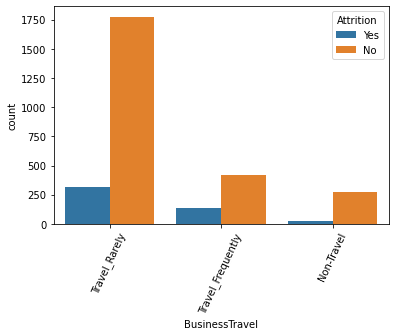

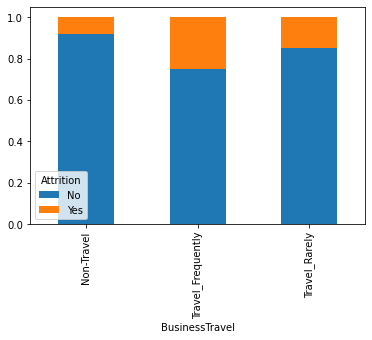

Department


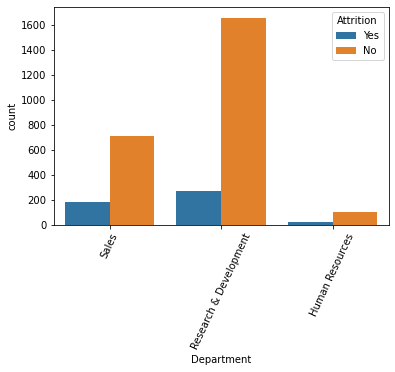

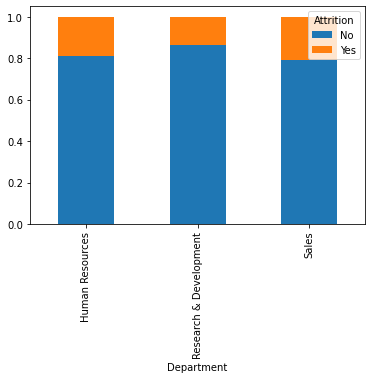

EducationField


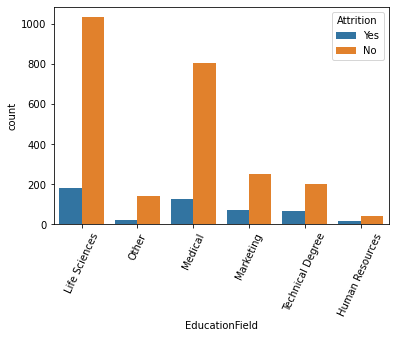

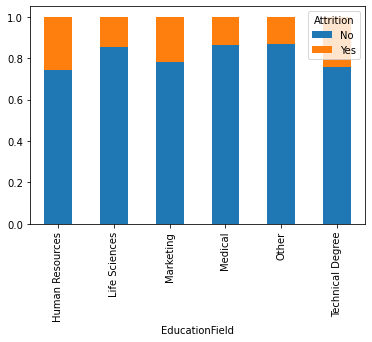

Gender


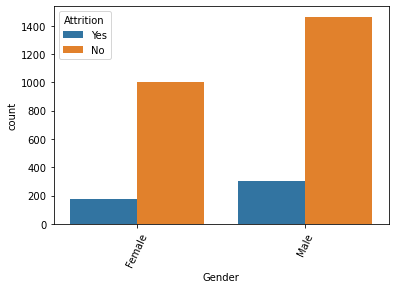

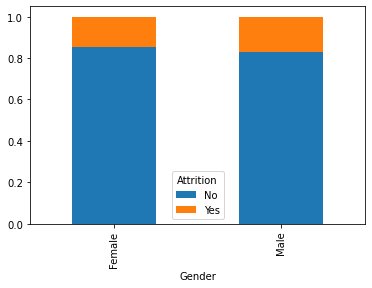

JobRole


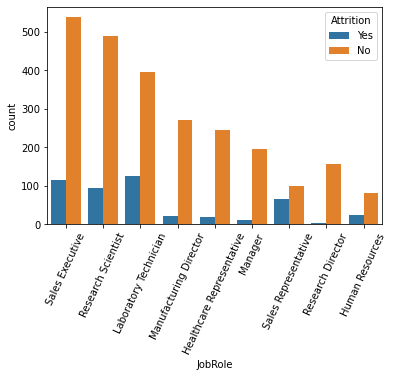

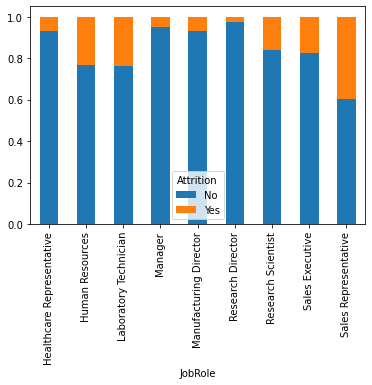

MaritalStatus


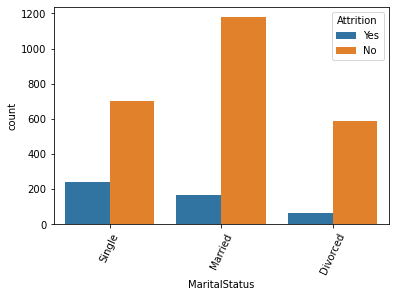

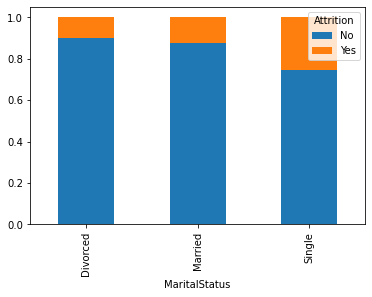

OverTime


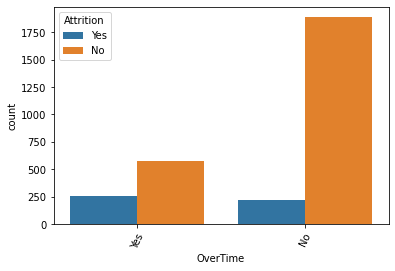

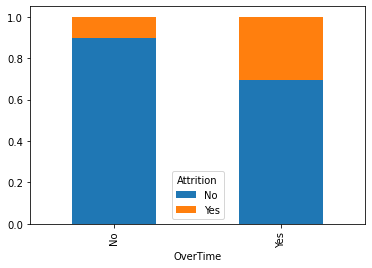

In [14]:
for col in employee_obj.columns:
    if col != 'Attrition':
        print(col)
        sns.countplot(data =employee, x=col, hue='Attrition')
        plt.xticks(rotation=65)
        plt.show()

        ct = pd.crosstab(index =employee[col], columns =employee['Attrition'], normalize='index')
        ct.plot(kind='bar', stacked=True)
        plt.show()

Now, I want build a FacetGrid which is:<p>
a. Pointplot (x: BusinessTravel, y: HourlyRate), row: attrition, col: gender <p>
b. Kdeplot (x: PercentSalaryHike, y: HourlyRate), row: attrition, col: EducationField 

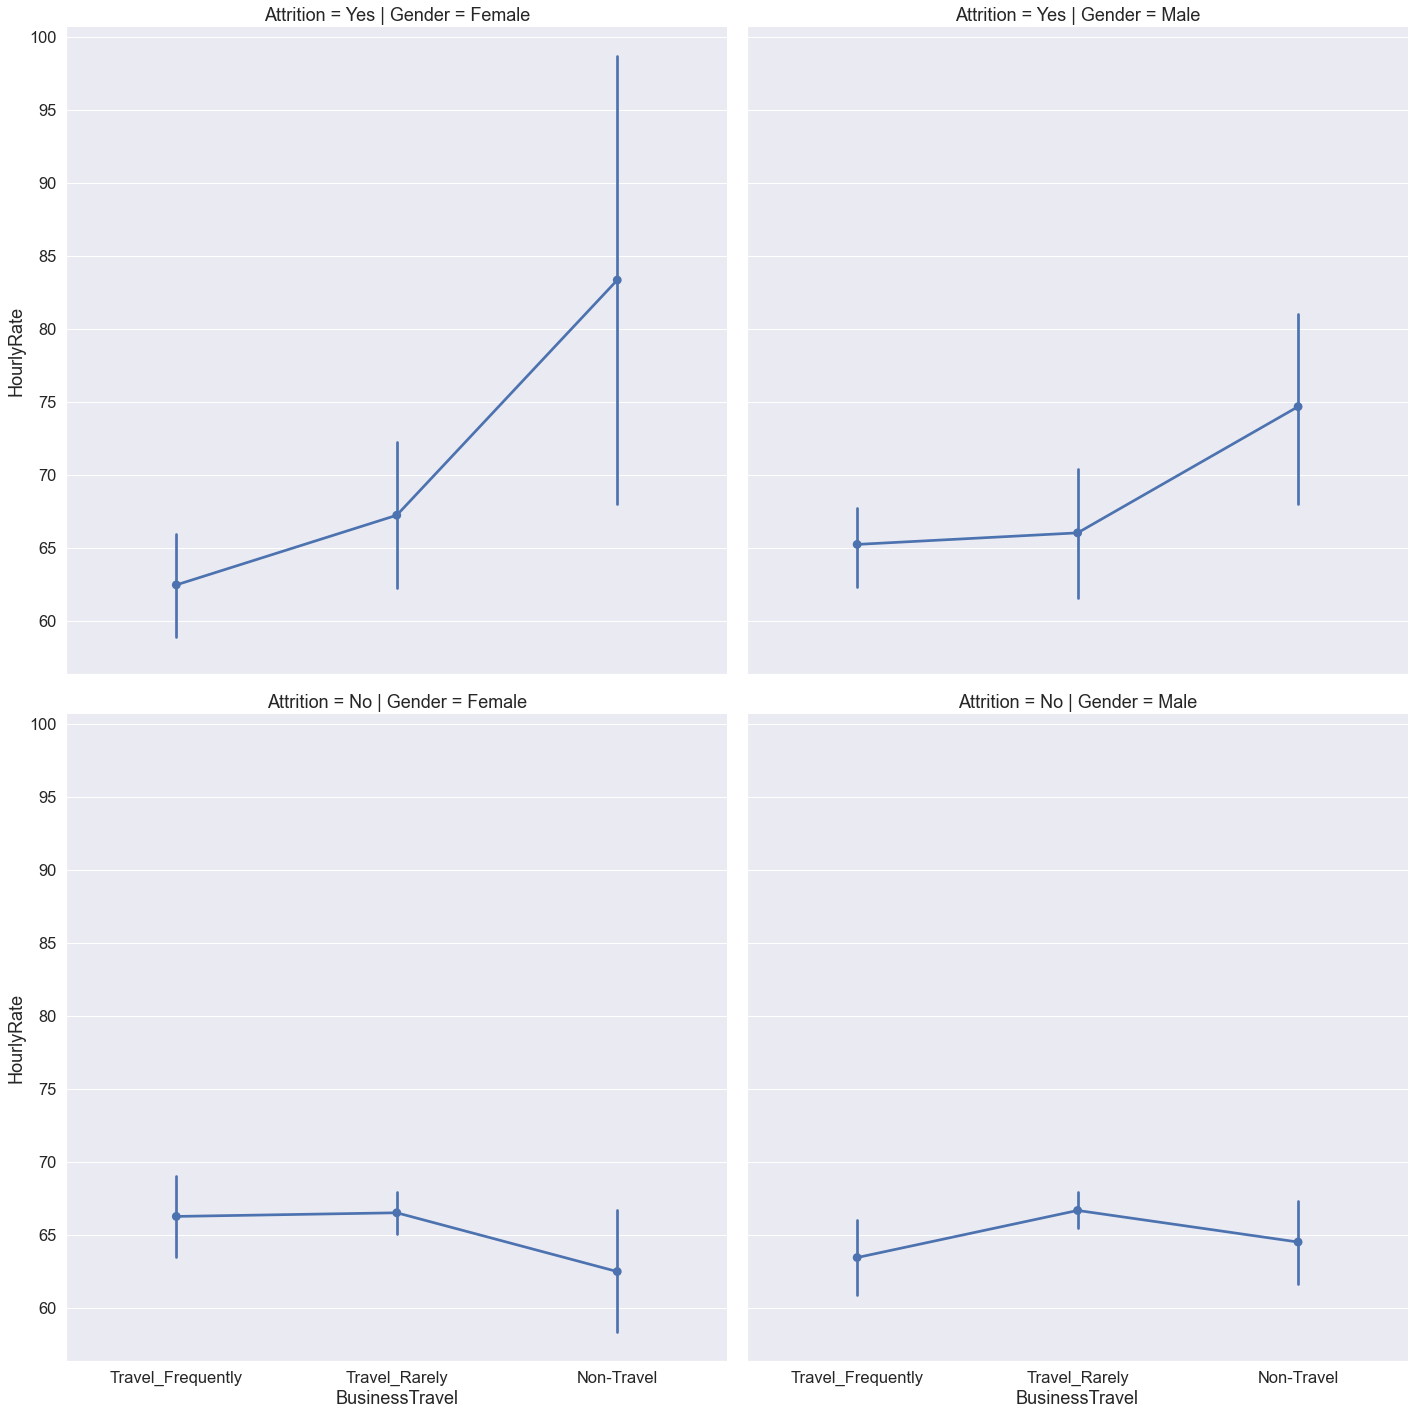

In [15]:
sns.set(font_scale=1.5)
h = sns.FacetGrid(data = employee, row='Attrition', col='Gender', height=10, aspect=1)
h.map_dataframe(sns.pointplot, x='BusinessTravel', y='HourlyRate')
plt.show()

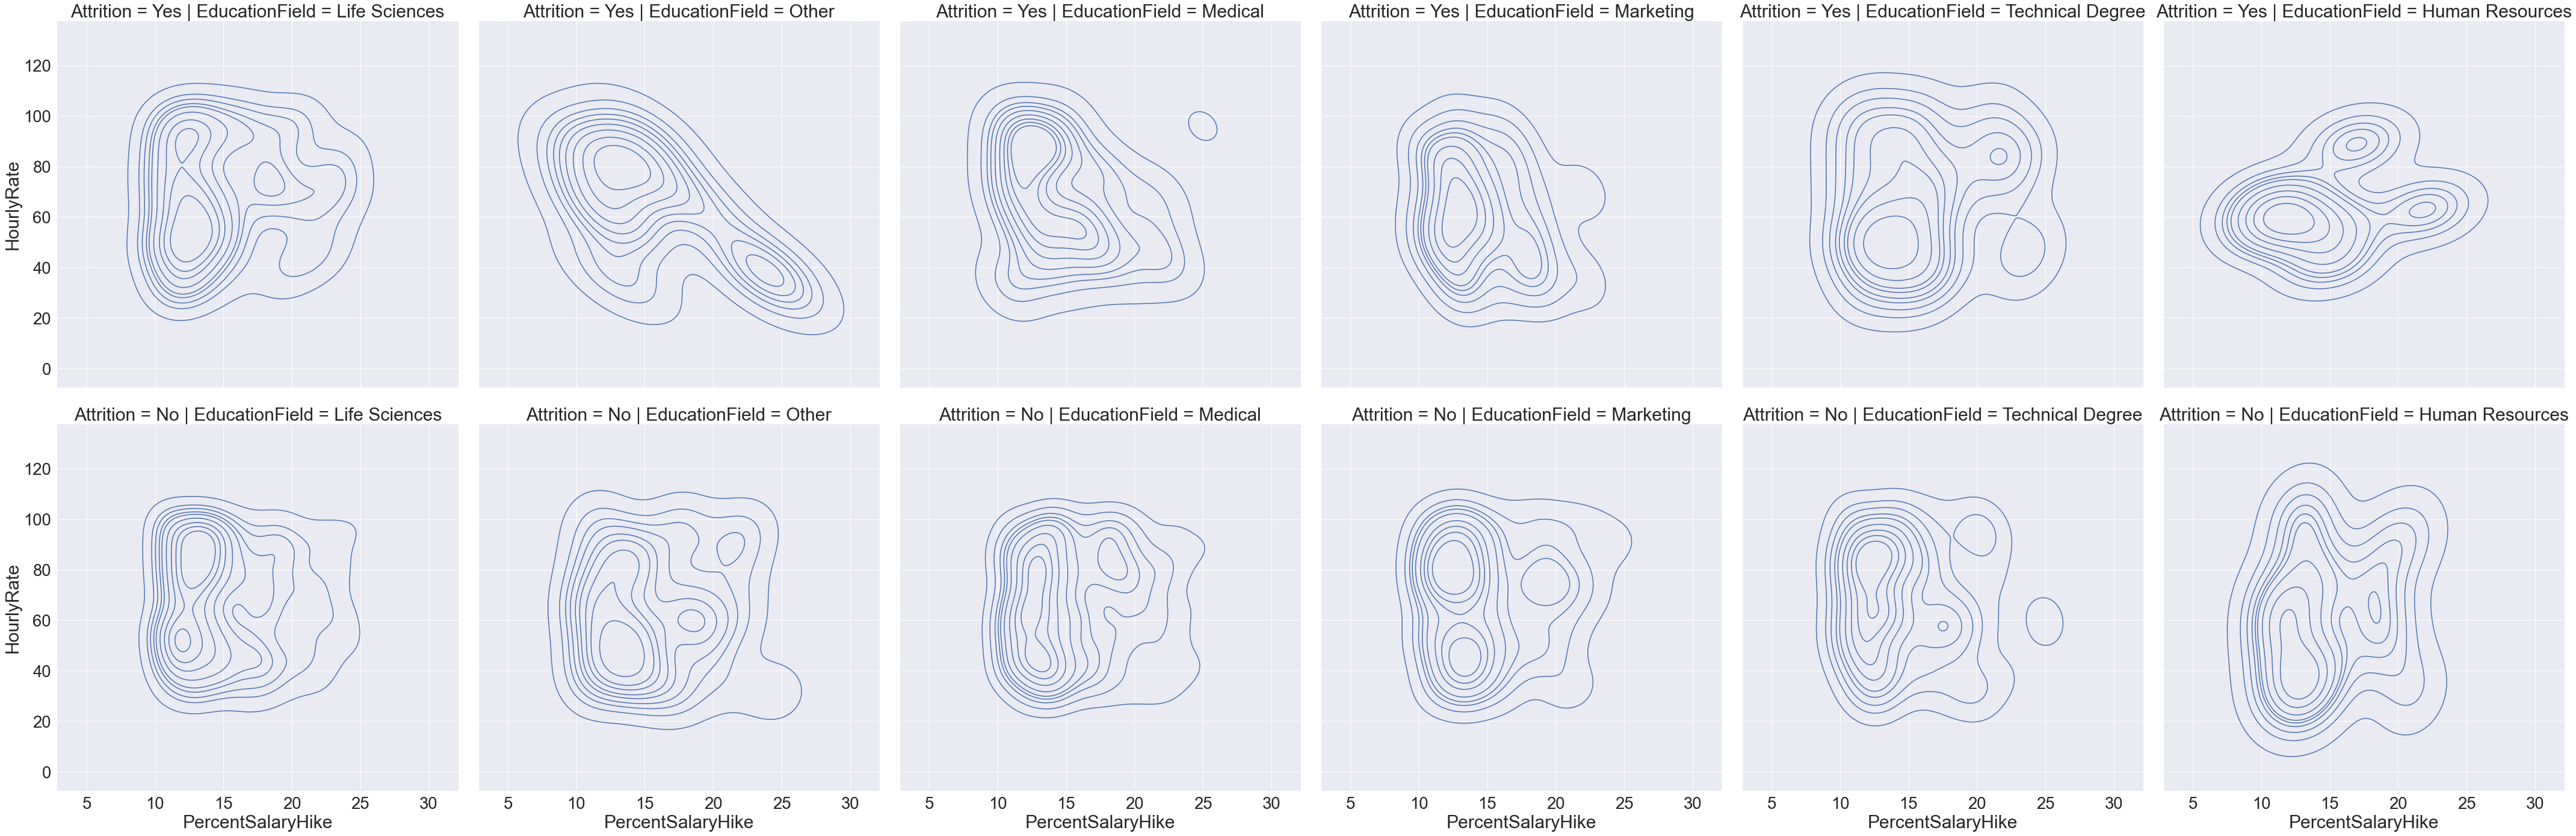

In [16]:
sns.set(font_scale=2.5)
h = sns.FacetGrid(data =employee, row='Attrition', col='EducationField', height=10, aspect=1)
h.map_dataframe(sns.kdeplot, x='PercentSalaryHike', y='HourlyRate')
plt.show()

# Insight

1. the average age of employees is 37 years with male employees (1764) more than female employees (1176).
2. The three most regular areas of employee education are life sciences (41%), medical (31%), and marketing (11%).
3. There are 474 employees who leave the company or about 16% of all employees, with an average age of being younger than the average employee who does not leave the company.
4. Most of the employees who leave the company are employees who are farther away from the office than employees who do not leave the company.
5. for female employees who leave the company, most of them are employees with high hourly rates but no business trips.
6. Employees who leave the company with their education field are Human Resources, most of them are employees who have a higher hourly rate and percent salary hike.

Of course there are still many interesting things that we can take from the data analyze above in accordance with the wishes requested by the company, I only provide some insights for examples that can be applied to human resources. Thankyou